The steps of this script are as follows

0. Split every frame from a video into an individual image 
Note: This step is performed in jpg_from_avi.py
1. Apply a top of frame crop, and a left / right crop on the top half as well
2. Apply a binary mask that exposes vasculature for the top, left, and right cropped images
3. Save new masked images into their respective folders
4. Recombined new folder of masked images into a gif similar to the original video

In [10]:
import sys
print(sys.path)
sys.path.remove('/opt/ros/kinetic/lib/python2.7/dist-packages')

['/home/andrew/Github/neuralink-bot/Image_Segmentation', '', '/home/andrew/anaconda3/lib/python37.zip', '/home/andrew/anaconda3/lib/python3.7', '/home/andrew/anaconda3/lib/python3.7/lib-dynload', '/home/andrew/anaconda3/lib/python3.7/site-packages', '/home/andrew/anaconda3/lib/python3.7/site-packages/IPython/extensions', '/home/andrew/.ipython']


ValueError: list.remove(x): x not in list

In [9]:
import cv2
import argparse
import numpy as np
from fastai.vision import *
import matplotlib.pyplot as plt
%matplotlib inline

import os 
import glob
import imageio

In [11]:
def order_files_by_date(path_to_folder, file_type):
    files = glob.glob("%s*%s" % (path_to_folder, file_type))
    files.sort(key=os.path.getmtime)
    return files

In [4]:
IMAGE_MANIPULATION_ROOT = "/home/andrew/Github/neuralink-bot/Image_Segmentation/"

# 1.) Apply Crops

In [65]:
crop_path = "/home/andrew/Github/neuralink-bot/image_manipulation/cropped_jpgs/"

In [4]:
jpg_extractions = order_files_by_date(
    f"{IMAGE_MANIPULATION_ROOT}jpg_extraction/", 
    ".jpg")
jpg_extractions

['/home/andrew/Github/neuralink-bot/image_manipulation/jpg_extraction/frame0.jpg',
 '/home/andrew/Github/neuralink-bot/image_manipulation/jpg_extraction/frame1.jpg',
 '/home/andrew/Github/neuralink-bot/image_manipulation/jpg_extraction/frame2.jpg',
 '/home/andrew/Github/neuralink-bot/image_manipulation/jpg_extraction/frame3.jpg',
 '/home/andrew/Github/neuralink-bot/image_manipulation/jpg_extraction/frame4.jpg',
 '/home/andrew/Github/neuralink-bot/image_manipulation/jpg_extraction/frame5.jpg',
 '/home/andrew/Github/neuralink-bot/image_manipulation/jpg_extraction/frame6.jpg',
 '/home/andrew/Github/neuralink-bot/image_manipulation/jpg_extraction/frame7.jpg',
 '/home/andrew/Github/neuralink-bot/image_manipulation/jpg_extraction/frame8.jpg',
 '/home/andrew/Github/neuralink-bot/image_manipulation/jpg_extraction/frame9.jpg',
 '/home/andrew/Github/neuralink-bot/image_manipulation/jpg_extraction/frame10.jpg',
 '/home/andrew/Github/neuralink-bot/image_manipulation/jpg_extraction/frame11.jpg',
 '

In [57]:
def crop_lower_half(fnames):
    for i, file in enumerate(fnames):
        cropped_image = crop(open_image(jpg_extractions[i]), 1910, 1.29995, 0)
        print(i)
        print(file)
        cropped_image.save("/home/andrew/Github/neuralink-bot/image_manipulation/cropped_jpgs/top_crop/top_crop_%s.jpg" % (str(i)))

In [58]:
crop_lower_half(jpg_extractions)

0
/home/andrew/Github/neuralink-bot/image_manipulation/jpg_extraction/frame0.jpg
1
/home/andrew/Github/neuralink-bot/image_manipulation/jpg_extraction/frame1.jpg
2
/home/andrew/Github/neuralink-bot/image_manipulation/jpg_extraction/frame2.jpg
3
/home/andrew/Github/neuralink-bot/image_manipulation/jpg_extraction/frame3.jpg
4
/home/andrew/Github/neuralink-bot/image_manipulation/jpg_extraction/frame4.jpg
5
/home/andrew/Github/neuralink-bot/image_manipulation/jpg_extraction/frame5.jpg
6
/home/andrew/Github/neuralink-bot/image_manipulation/jpg_extraction/frame6.jpg
7
/home/andrew/Github/neuralink-bot/image_manipulation/jpg_extraction/frame7.jpg
8
/home/andrew/Github/neuralink-bot/image_manipulation/jpg_extraction/frame8.jpg
9
/home/andrew/Github/neuralink-bot/image_manipulation/jpg_extraction/frame9.jpg
10
/home/andrew/Github/neuralink-bot/image_manipulation/jpg_extraction/frame10.jpg
11
/home/andrew/Github/neuralink-bot/image_manipulation/jpg_extraction/frame11.jpg
12
/home/andrew/Github/n

103
/home/andrew/Github/neuralink-bot/image_manipulation/jpg_extraction/frame103.jpg
104
/home/andrew/Github/neuralink-bot/image_manipulation/jpg_extraction/frame104.jpg
105
/home/andrew/Github/neuralink-bot/image_manipulation/jpg_extraction/frame105.jpg
106
/home/andrew/Github/neuralink-bot/image_manipulation/jpg_extraction/frame106.jpg
107
/home/andrew/Github/neuralink-bot/image_manipulation/jpg_extraction/frame107.jpg
108
/home/andrew/Github/neuralink-bot/image_manipulation/jpg_extraction/frame108.jpg
109
/home/andrew/Github/neuralink-bot/image_manipulation/jpg_extraction/frame109.jpg
110
/home/andrew/Github/neuralink-bot/image_manipulation/jpg_extraction/frame110.jpg
111
/home/andrew/Github/neuralink-bot/image_manipulation/jpg_extraction/frame111.jpg
112
/home/andrew/Github/neuralink-bot/image_manipulation/jpg_extraction/frame112.jpg
113
/home/andrew/Github/neuralink-bot/image_manipulation/jpg_extraction/frame113.jpg
114
/home/andrew/Github/neuralink-bot/image_manipulation/jpg_extr

203
/home/andrew/Github/neuralink-bot/image_manipulation/jpg_extraction/frame203.jpg
204
/home/andrew/Github/neuralink-bot/image_manipulation/jpg_extraction/frame204.jpg
205
/home/andrew/Github/neuralink-bot/image_manipulation/jpg_extraction/frame205.jpg
206
/home/andrew/Github/neuralink-bot/image_manipulation/jpg_extraction/frame206.jpg
207
/home/andrew/Github/neuralink-bot/image_manipulation/jpg_extraction/frame207.jpg
208
/home/andrew/Github/neuralink-bot/image_manipulation/jpg_extraction/frame208.jpg
209
/home/andrew/Github/neuralink-bot/image_manipulation/jpg_extraction/frame209.jpg
210
/home/andrew/Github/neuralink-bot/image_manipulation/jpg_extraction/frame210.jpg
211
/home/andrew/Github/neuralink-bot/image_manipulation/jpg_extraction/frame211.jpg
212
/home/andrew/Github/neuralink-bot/image_manipulation/jpg_extraction/frame212.jpg
213
/home/andrew/Github/neuralink-bot/image_manipulation/jpg_extraction/frame213.jpg
214
/home/andrew/Github/neuralink-bot/image_manipulation/jpg_extr

306
/home/andrew/Github/neuralink-bot/image_manipulation/jpg_extraction/frame306.jpg
307
/home/andrew/Github/neuralink-bot/image_manipulation/jpg_extraction/frame307.jpg
308
/home/andrew/Github/neuralink-bot/image_manipulation/jpg_extraction/frame308.jpg
309
/home/andrew/Github/neuralink-bot/image_manipulation/jpg_extraction/frame309.jpg
310
/home/andrew/Github/neuralink-bot/image_manipulation/jpg_extraction/frame310.jpg
311
/home/andrew/Github/neuralink-bot/image_manipulation/jpg_extraction/frame311.jpg
312
/home/andrew/Github/neuralink-bot/image_manipulation/jpg_extraction/frame312.jpg
313
/home/andrew/Github/neuralink-bot/image_manipulation/jpg_extraction/frame313.jpg
314
/home/andrew/Github/neuralink-bot/image_manipulation/jpg_extraction/frame314.jpg
315
/home/andrew/Github/neuralink-bot/image_manipulation/jpg_extraction/frame315.jpg
316
/home/andrew/Github/neuralink-bot/image_manipulation/jpg_extraction/frame316.jpg
317
/home/andrew/Github/neuralink-bot/image_manipulation/jpg_extr

404
/home/andrew/Github/neuralink-bot/image_manipulation/jpg_extraction/frame404.jpg
405
/home/andrew/Github/neuralink-bot/image_manipulation/jpg_extraction/frame405.jpg
406
/home/andrew/Github/neuralink-bot/image_manipulation/jpg_extraction/frame406.jpg
407
/home/andrew/Github/neuralink-bot/image_manipulation/jpg_extraction/frame407.jpg
408
/home/andrew/Github/neuralink-bot/image_manipulation/jpg_extraction/frame408.jpg
409
/home/andrew/Github/neuralink-bot/image_manipulation/jpg_extraction/frame409.jpg
410
/home/andrew/Github/neuralink-bot/image_manipulation/jpg_extraction/frame410.jpg
411
/home/andrew/Github/neuralink-bot/image_manipulation/jpg_extraction/frame411.jpg
412
/home/andrew/Github/neuralink-bot/image_manipulation/jpg_extraction/frame412.jpg
413
/home/andrew/Github/neuralink-bot/image_manipulation/jpg_extraction/frame413.jpg
414
/home/andrew/Github/neuralink-bot/image_manipulation/jpg_extraction/frame414.jpg
415
/home/andrew/Github/neuralink-bot/image_manipulation/jpg_extr

In [59]:
top_crops = order_files_by_date(
    "/home/andrew/Github/neuralink-bot/image_manipulation/cropped_jpgs/top_crop/", 
    ".jpg")
top_crops

['/home/andrew/Github/neuralink-bot/image_manipulation/cropped_jpgs/top_crop/top_crop_0.jpg',
 '/home/andrew/Github/neuralink-bot/image_manipulation/cropped_jpgs/top_crop/top_crop_1.jpg',
 '/home/andrew/Github/neuralink-bot/image_manipulation/cropped_jpgs/top_crop/top_crop_2.jpg',
 '/home/andrew/Github/neuralink-bot/image_manipulation/cropped_jpgs/top_crop/top_crop_3.jpg',
 '/home/andrew/Github/neuralink-bot/image_manipulation/cropped_jpgs/top_crop/top_crop_4.jpg',
 '/home/andrew/Github/neuralink-bot/image_manipulation/cropped_jpgs/top_crop/top_crop_5.jpg',
 '/home/andrew/Github/neuralink-bot/image_manipulation/cropped_jpgs/top_crop/top_crop_6.jpg',
 '/home/andrew/Github/neuralink-bot/image_manipulation/cropped_jpgs/top_crop/top_crop_7.jpg',
 '/home/andrew/Github/neuralink-bot/image_manipulation/cropped_jpgs/top_crop/top_crop_8.jpg',
 '/home/andrew/Github/neuralink-bot/image_manipulation/cropped_jpgs/top_crop/top_crop_9.jpg',
 '/home/andrew/Github/neuralink-bot/image_manipulation/cropp

In [60]:
def left_crop(fnames):
    for i, file in enumerate(fnames):
        left_image = crop(open_image(file), 640, 1, 0)
        left_image.save("/home/andrew/Github/neuralink-bot/image_manipulation/cropped_jpgs/left_crop/left_crop_%s.jpg" % (str(i)))

In [61]:
left_crop(top_crops)

In [91]:
def right_crop(fnames):
    for i, file in enumerate(fnames):
        right_image = crop(open_image(file), 640, 1, 1)
        right_image.save("/home/andrew/Github/neuralink-bot/image_manipulation/cropped_jpgs/right_crop/right_crop_%s.jpg" % (str(i)))

In [92]:
right_crop(top_crops)

# 2.) Define Binary Masks

In [12]:
top_crops = order_files_by_date(
    "/home/andrew/Github/neuralink-bot/Image_Segmentation/cropped_jpgs/top_crop/", 
    ".jpg")

left_crops = order_files_by_date(
    "/home/andrew/Github/neuralink-bot/Image_Segmentation/cropped_jpgs/left_crop/", 
    ".jpg")

right_crops = order_files_by_date(
    "/home/andrew/Github/neuralink-bot/Image_Segmentation/cropped_jpgs/right_crop/", 
    ".jpg")

In [38]:
def make_image(data, outputname, size=(5, 5), dpi=100):
    fig = plt.figure()
    fig.set_size_inches(size)
    ax = plt.Axes(fig, [0., 0., 1., 1.])
    ax.set_axis_off()
    fig.add_axes(ax)
    plt.set_cmap('hot')
    ax.imshow(data, aspect='equal')
    plt.savefig(outputname, dpi=dpi)

In [39]:
def threshold_vessels(image_files, full_directory, name_prefix):
    for i, file in enumerate(image_files):
        cap = cv2.imread(str(image_files[i]))
        hsv = cv2.cvtColor(cap, cv2.COLOR_BGR2HSV)
        # Lower and upper bounds for masks.
        # I know I should really fine tune these filters
        # but this is the best I can do for now.
        lower_blue = np.array([0,0,100])
        upper_blue = np.array([255,255,255])

        mask = cv2.inRange(hsv, lower_blue, upper_blue)
        result = cv2.bitwise_not(cap, cap, mask = mask)
        
        output_name = f"{full_directory}_{name_prefix}{i}.jpg"
        make_image(mask, output_name)

# 3.) Save masked images into their respective folders

/home/andrew/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


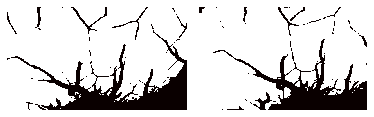

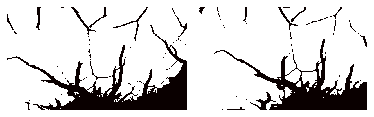

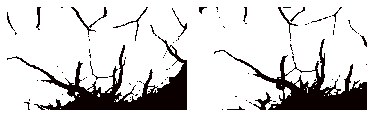

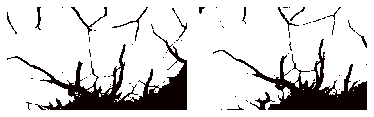

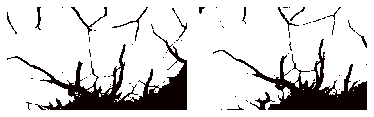

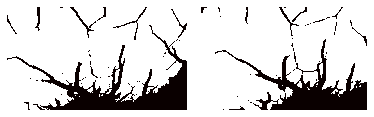

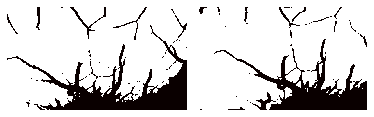

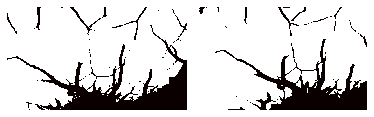

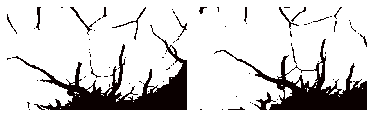

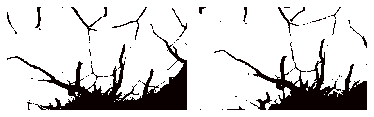

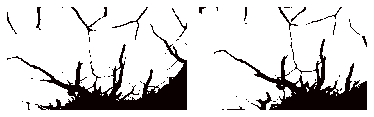

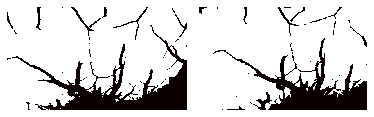

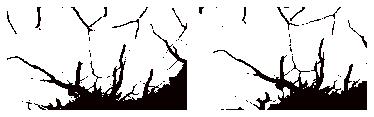

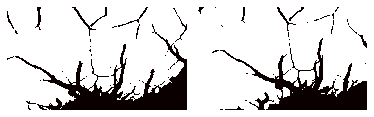

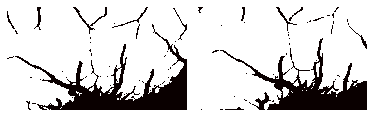

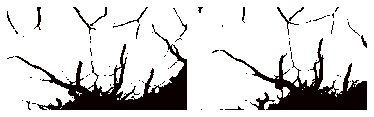

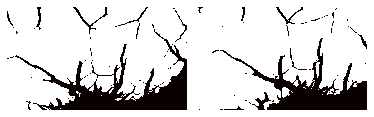

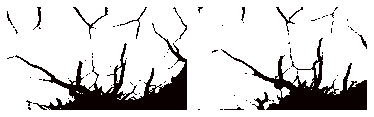

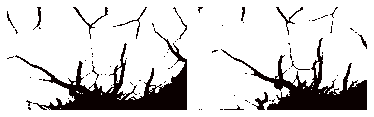

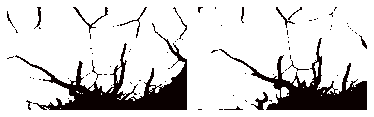

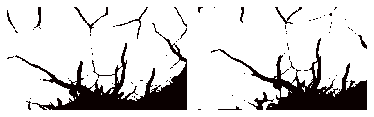

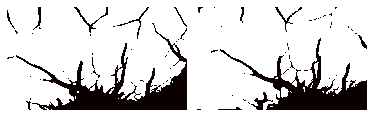

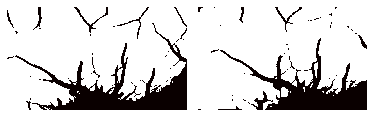

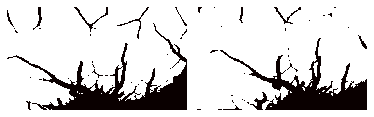

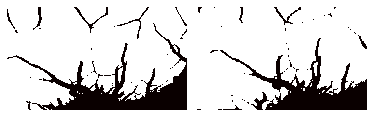

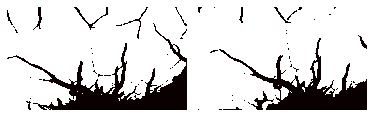

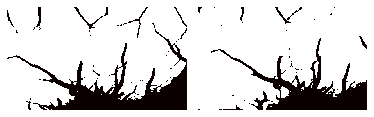

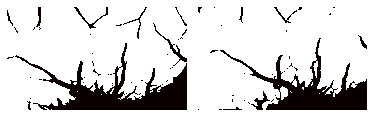

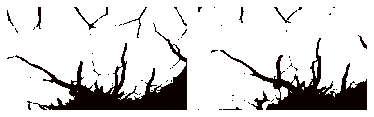

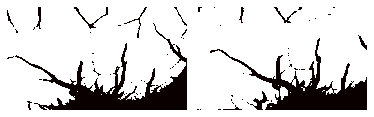

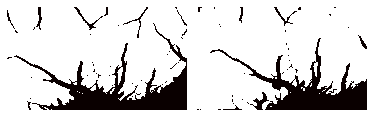

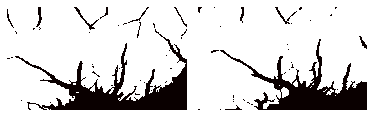

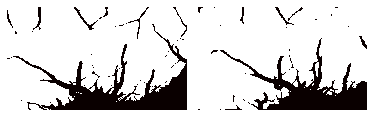

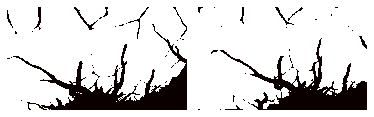

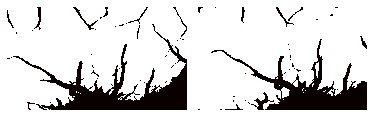

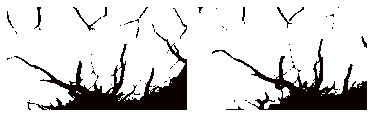

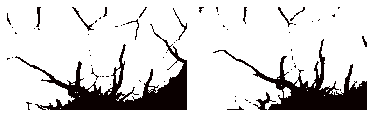

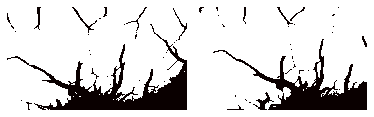

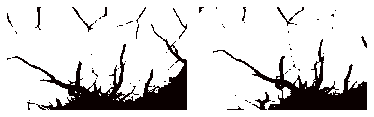

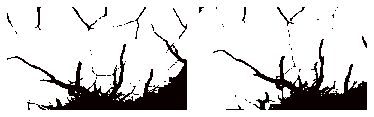

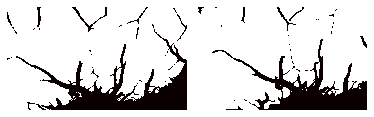

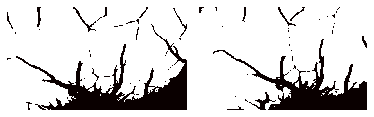

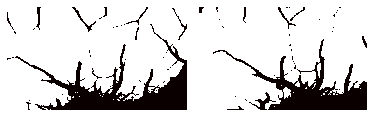

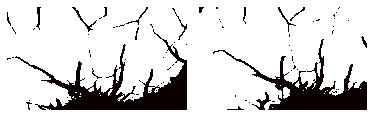

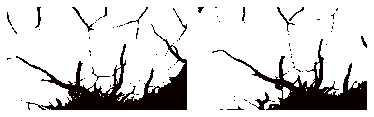

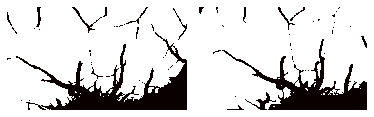

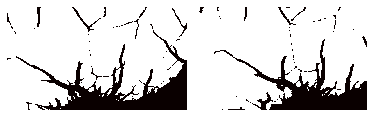

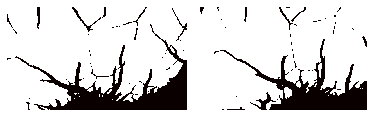

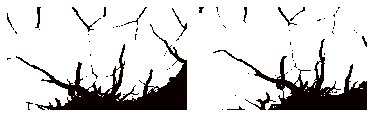

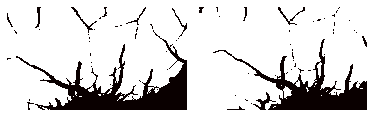

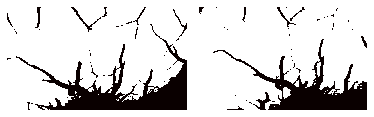

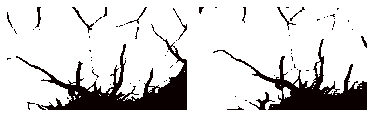

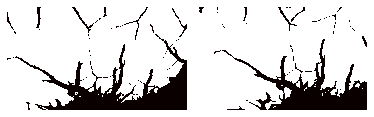

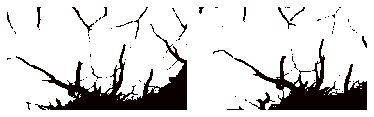

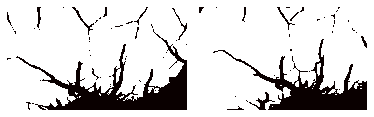

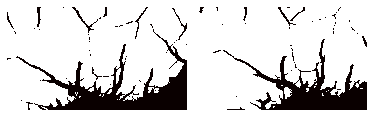

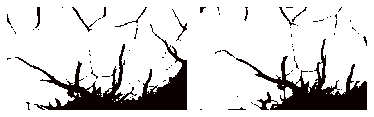

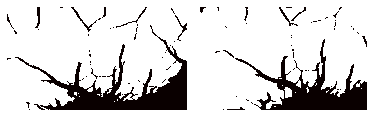

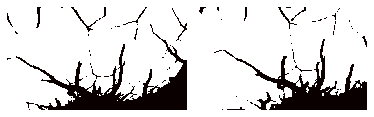

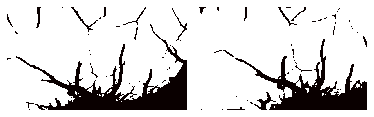

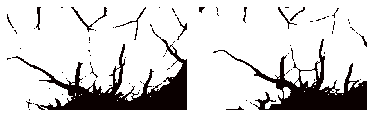

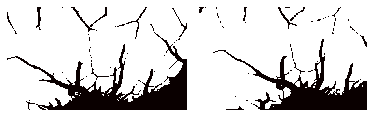

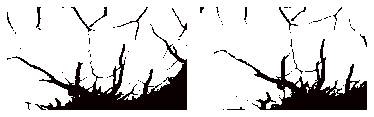

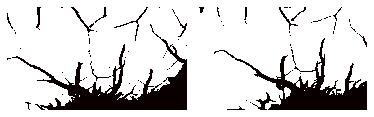

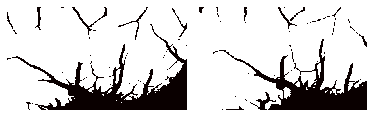

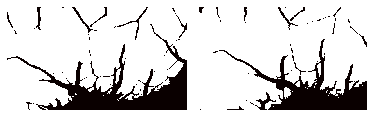

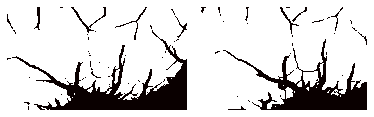

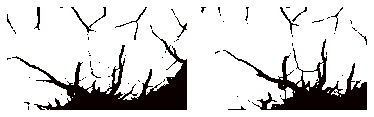

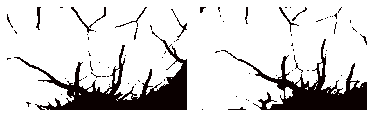

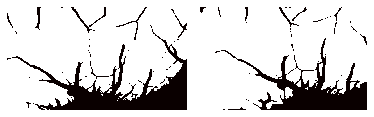

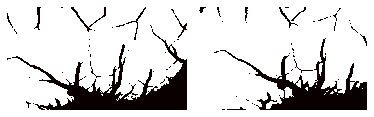

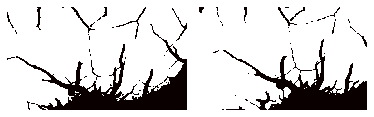

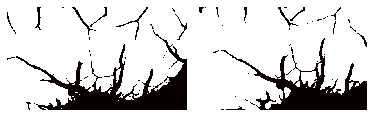

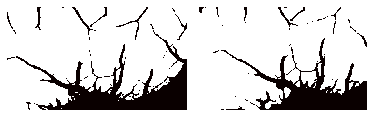

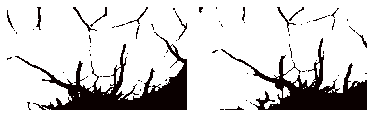

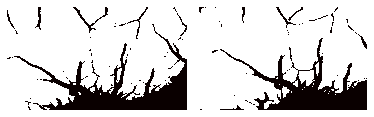

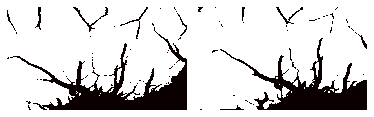

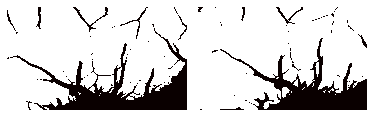

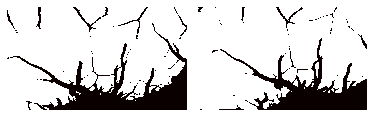

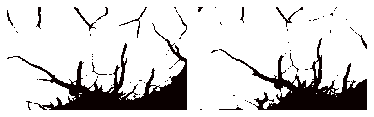

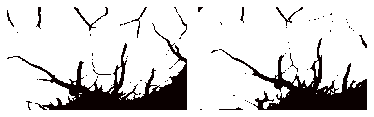

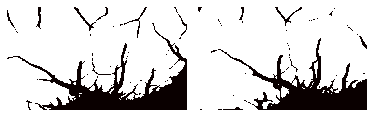

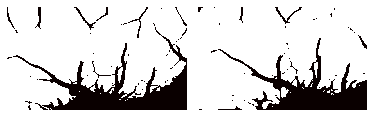

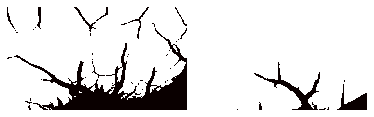

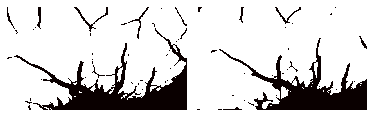

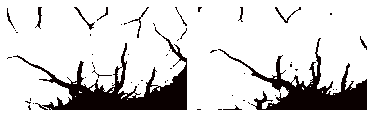

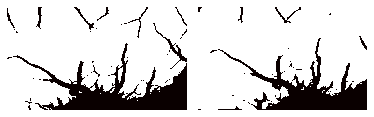

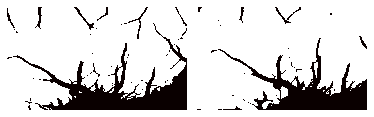

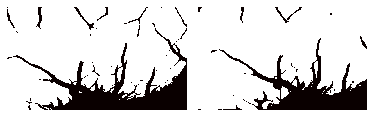

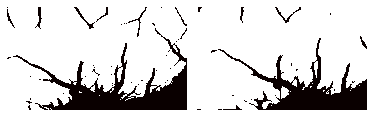

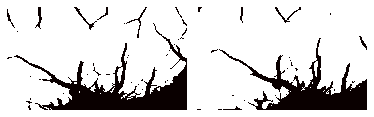

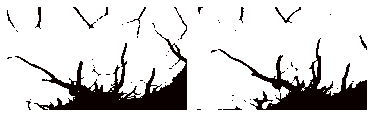

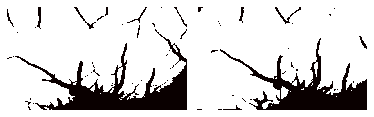

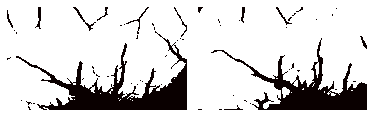

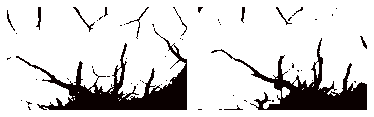

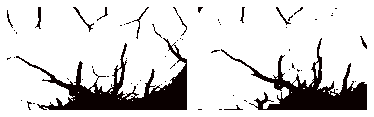

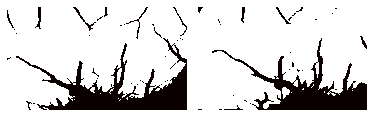

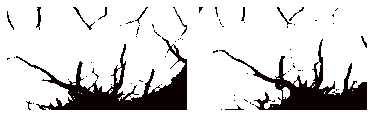

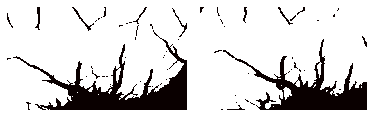

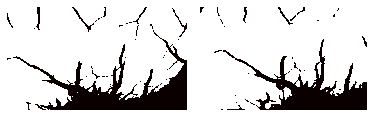

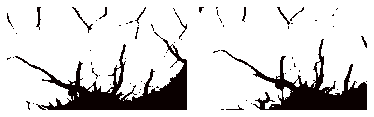

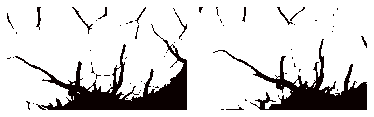

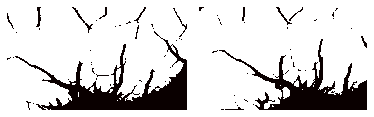

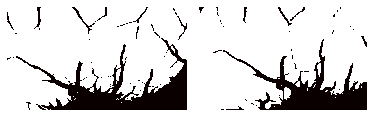

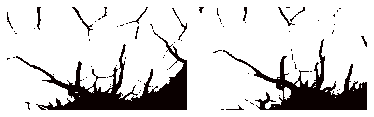

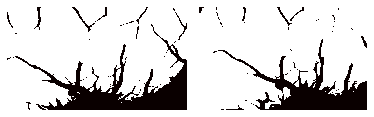

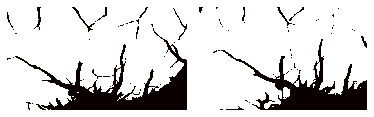

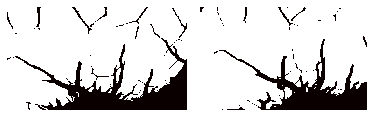

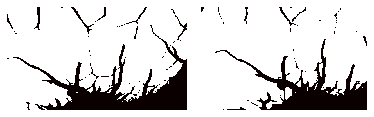

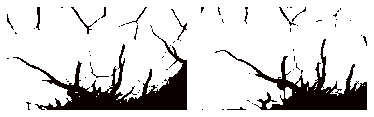

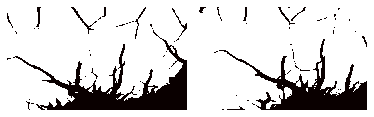

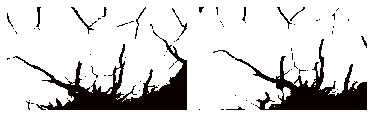

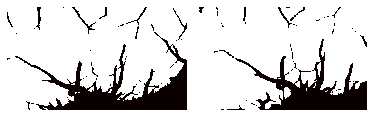

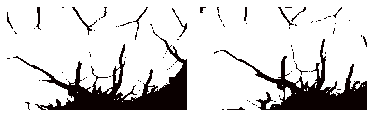

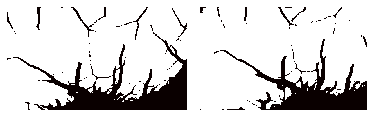

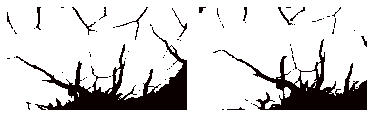

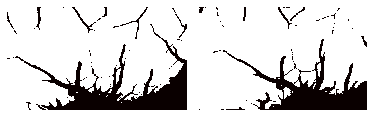

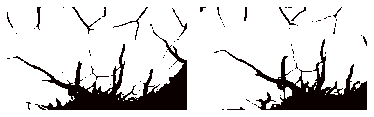

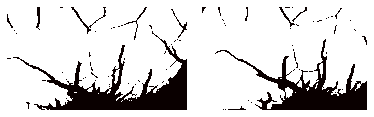

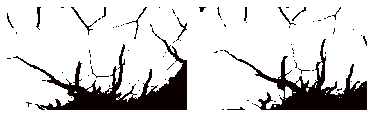

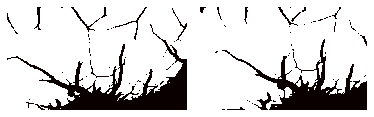

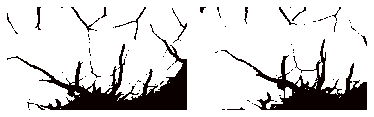

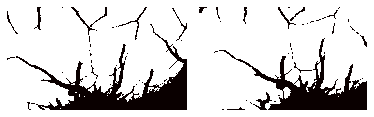

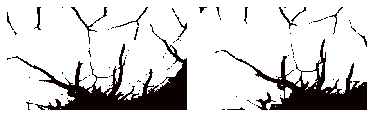

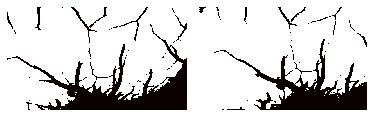

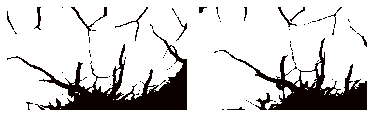

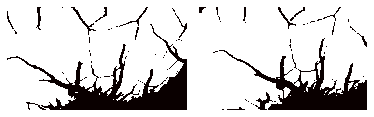

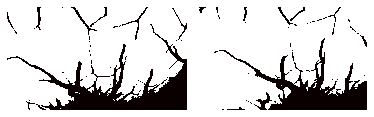

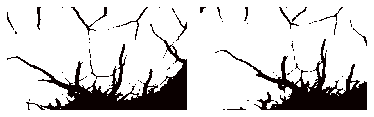

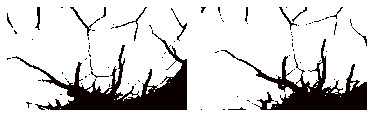

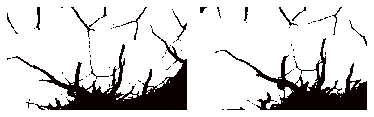

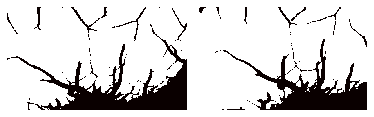

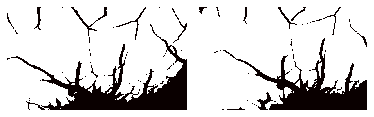

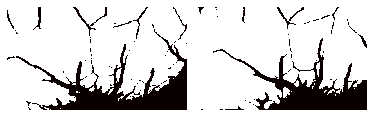

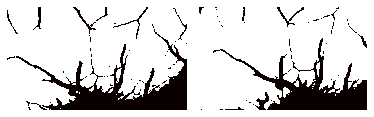

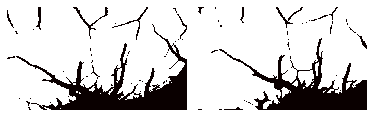

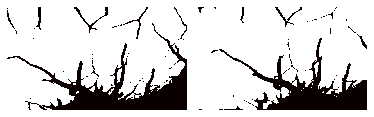

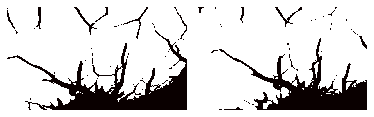

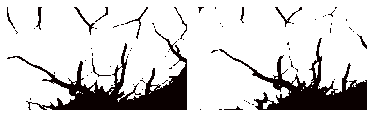

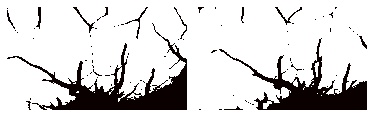

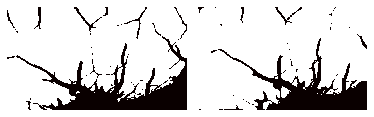

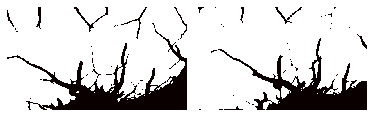

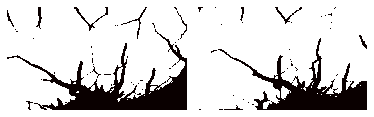

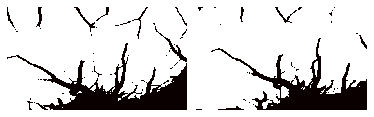

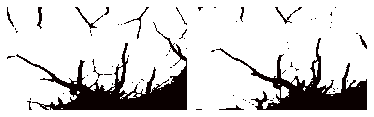

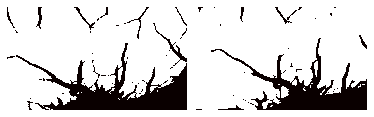

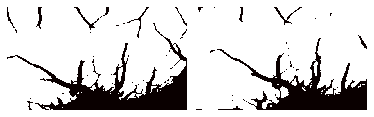

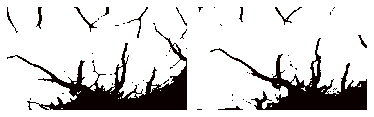

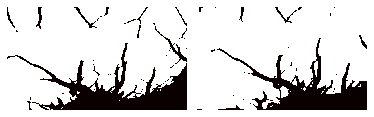

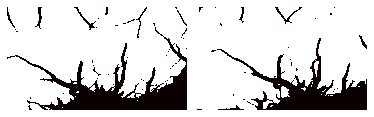

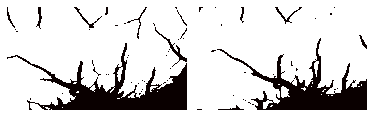

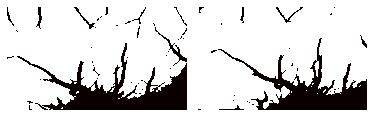

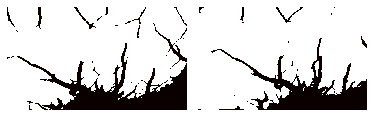

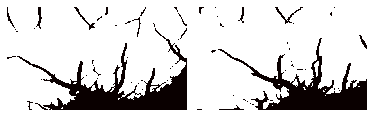

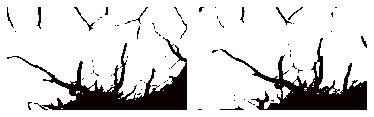

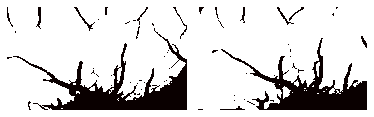

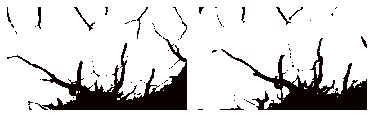

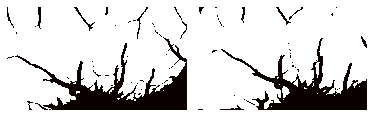

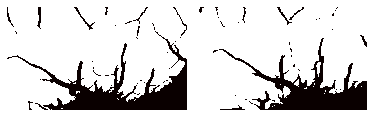

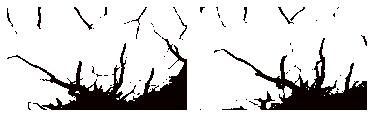

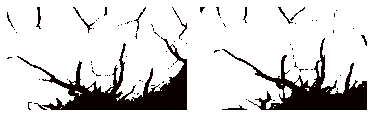

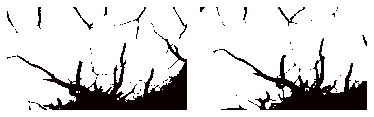

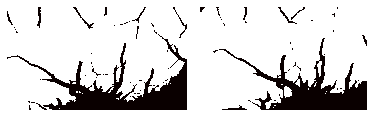

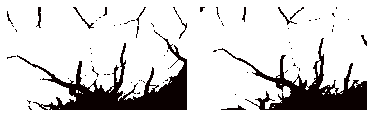

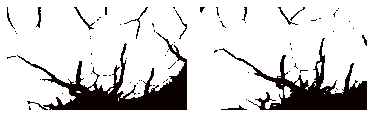

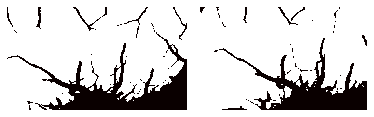

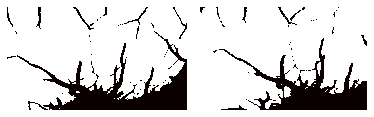

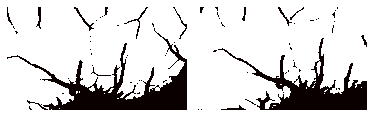

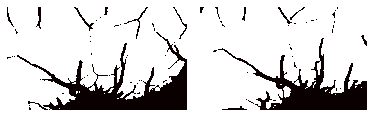

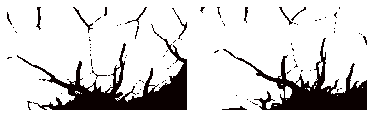

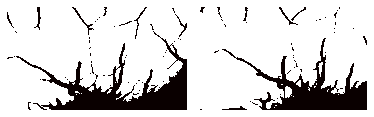

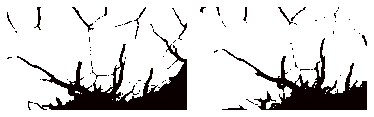

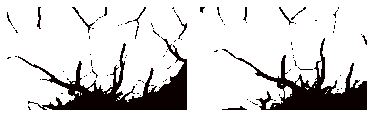

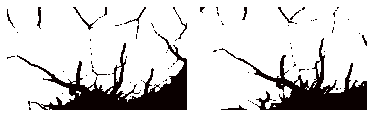

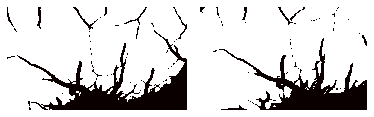

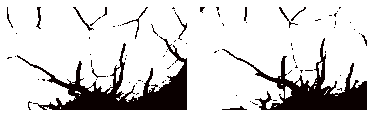

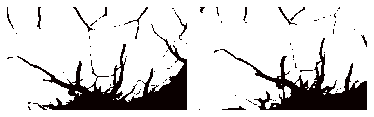

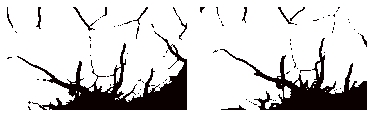

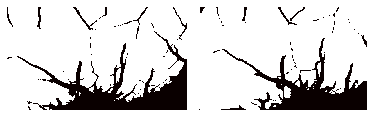

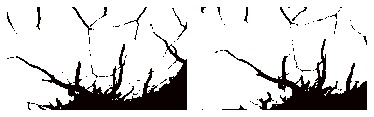

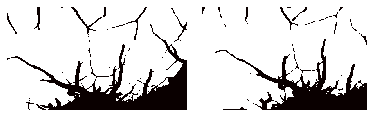

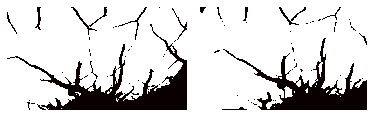

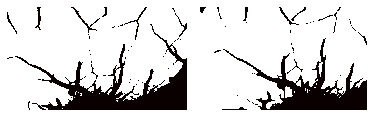

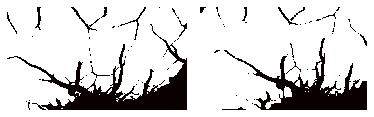

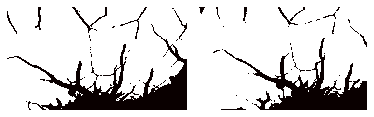

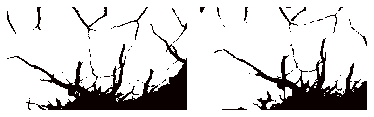

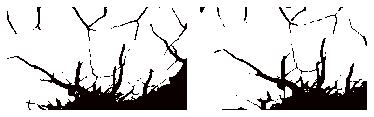

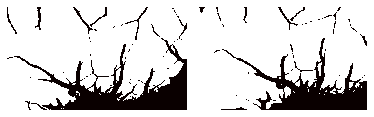

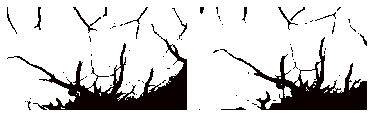

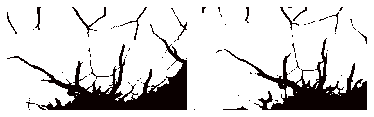

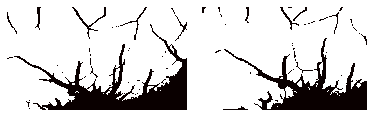

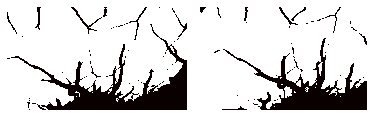

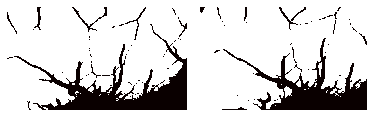

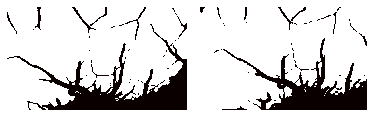

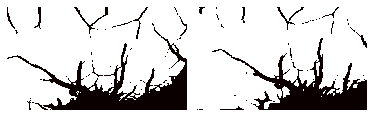

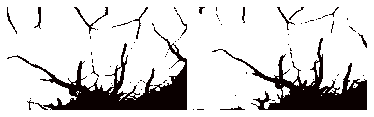

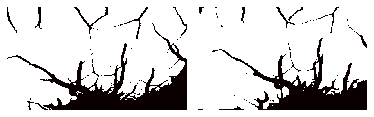

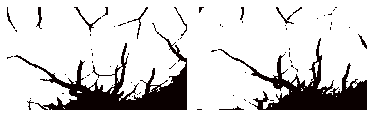

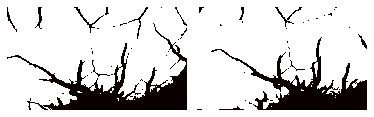

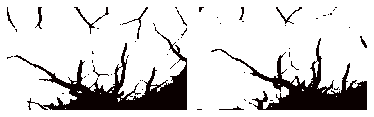

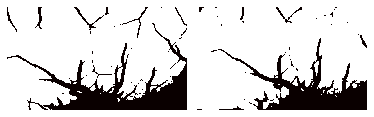

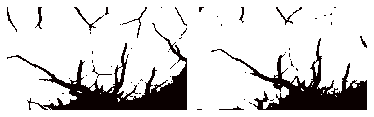

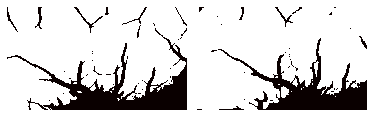

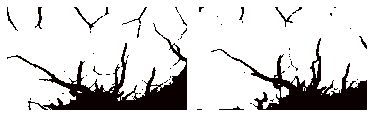

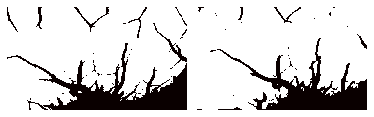

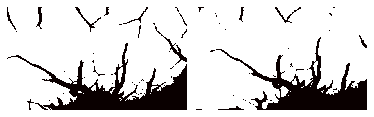

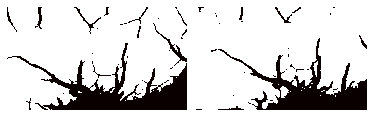

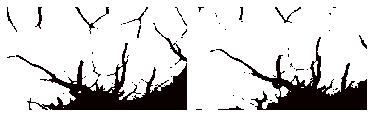

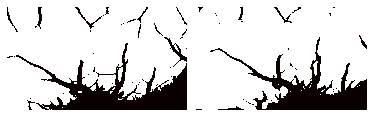

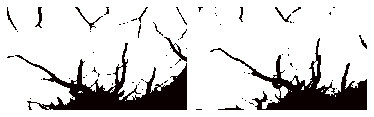

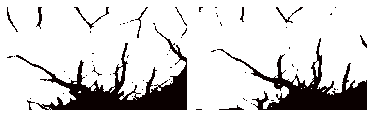

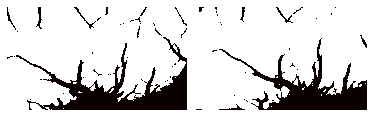

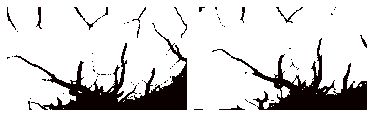

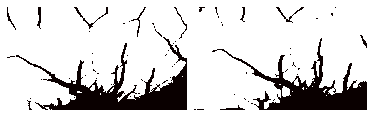

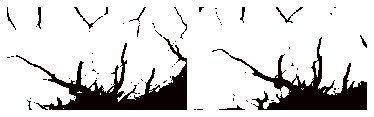

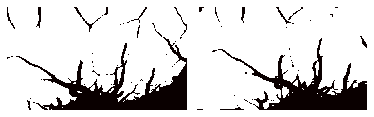

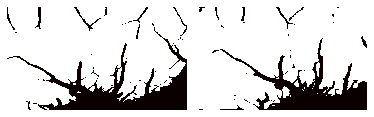

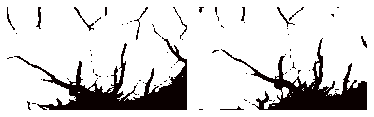

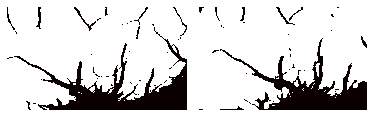

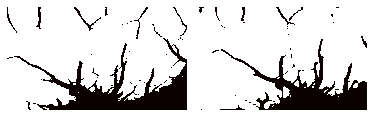

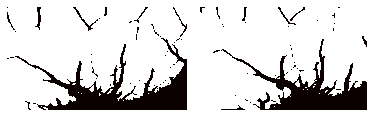

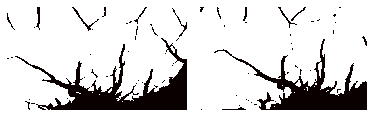

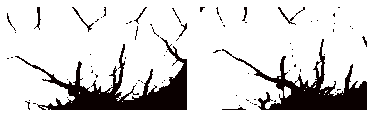

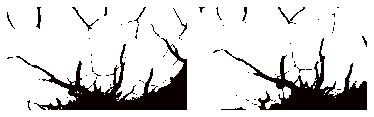

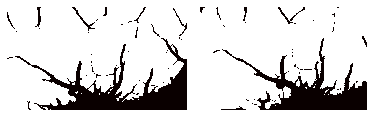

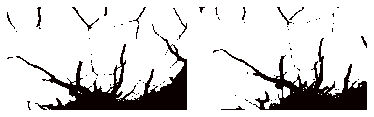

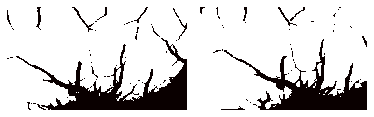

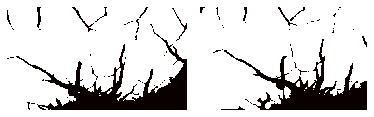

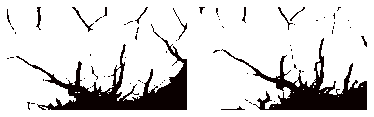

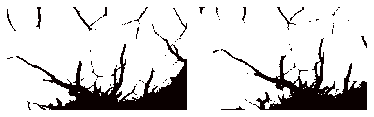

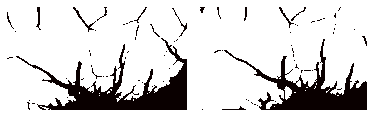

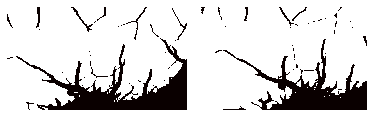

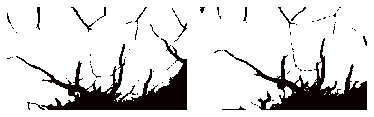

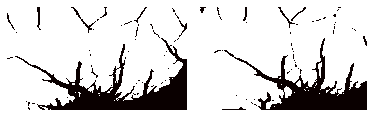

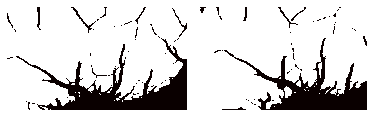

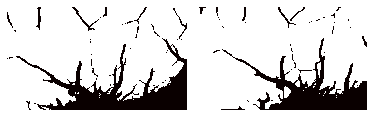

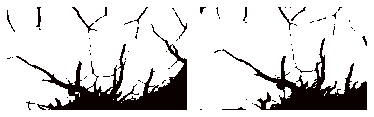

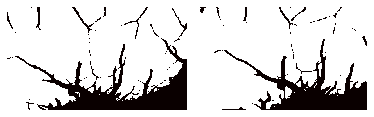

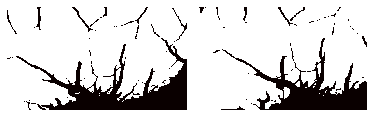

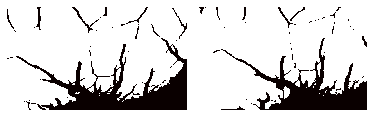

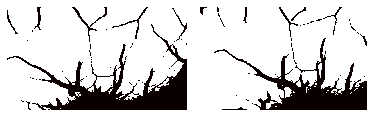

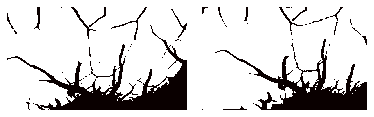

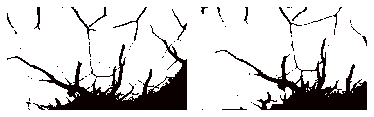

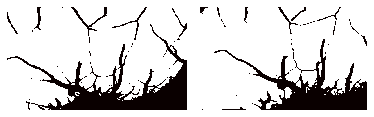

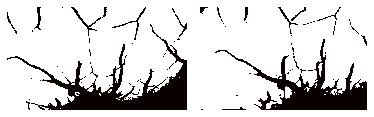

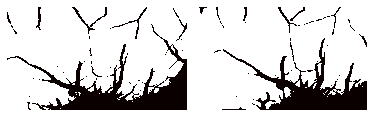

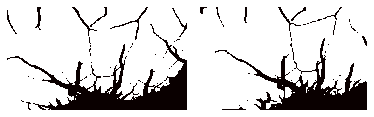

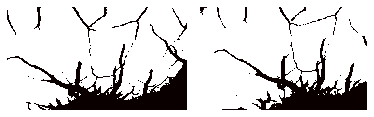

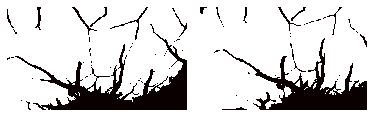

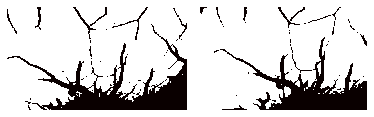

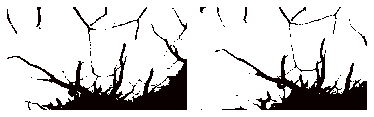

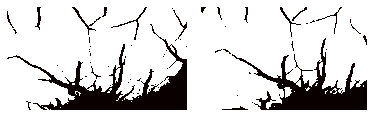

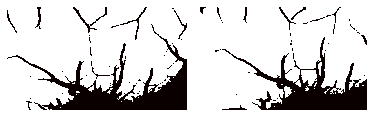

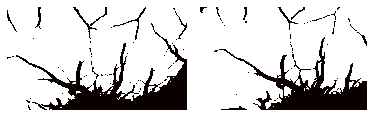

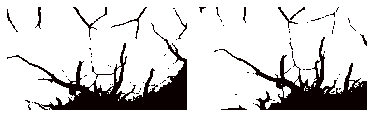

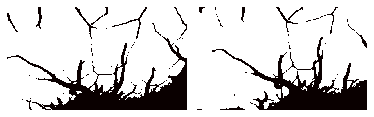

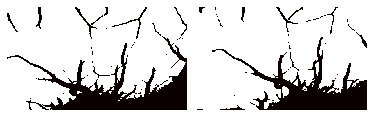

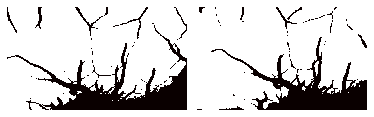

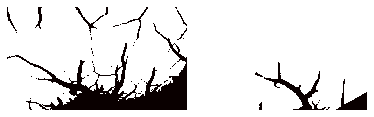

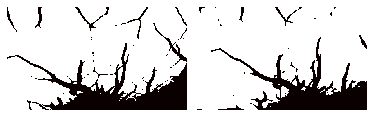

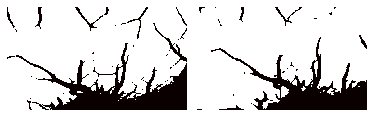

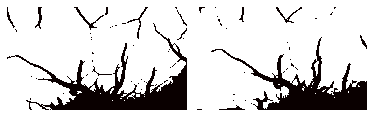

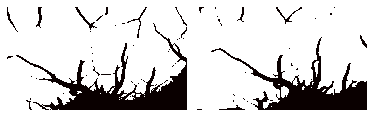

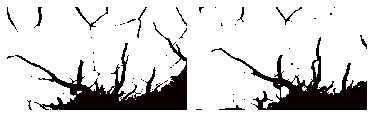

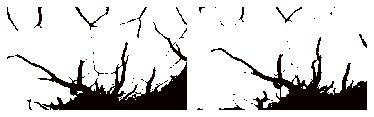

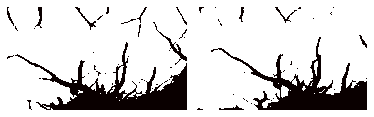

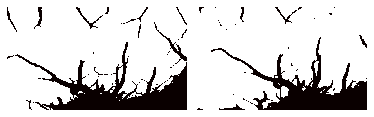

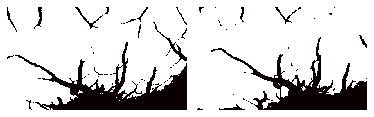

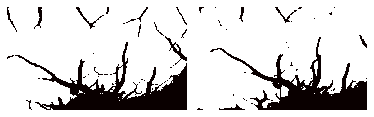

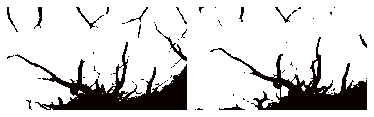

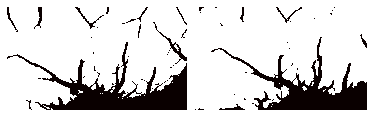

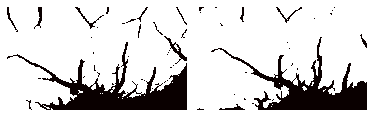

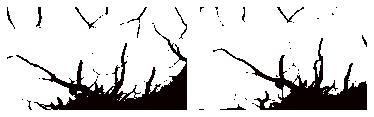

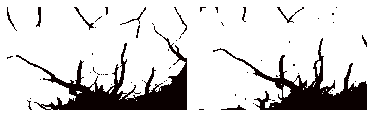

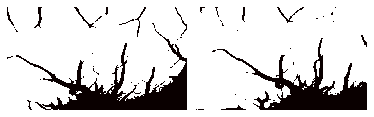

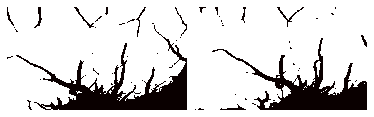

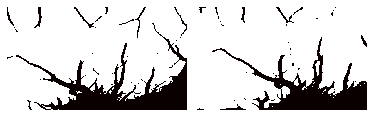

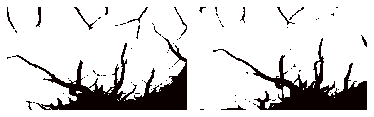

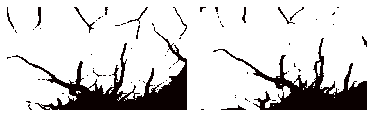

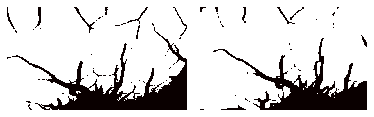

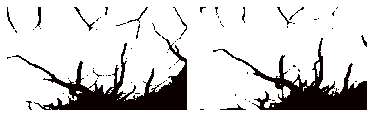

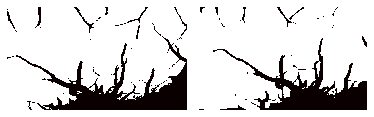

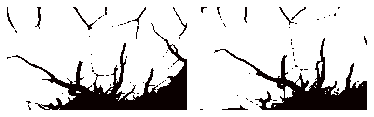

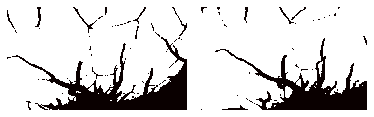

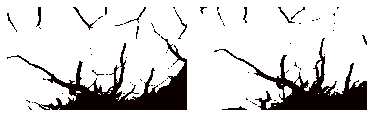

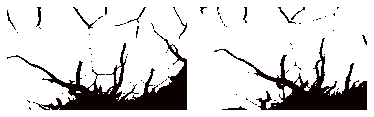

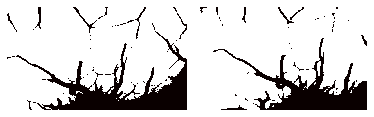

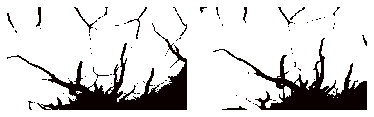

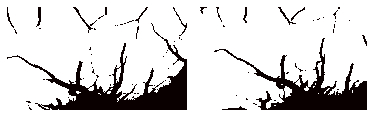

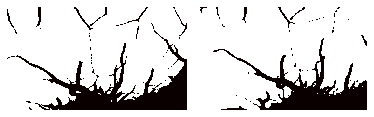

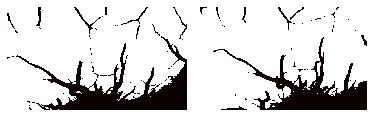

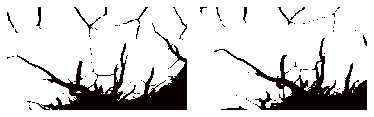

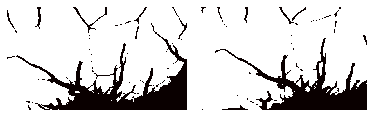

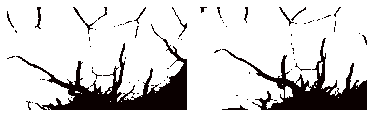

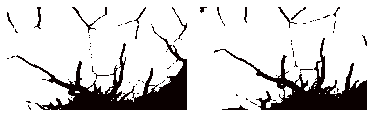

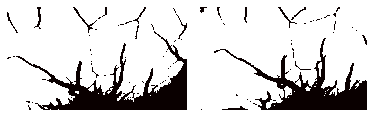

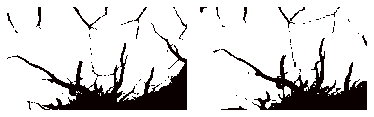

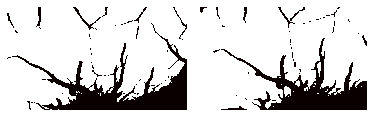

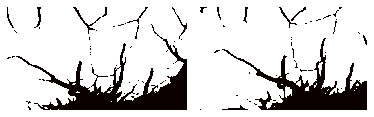

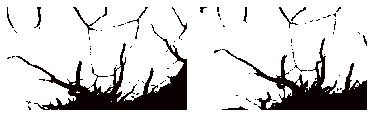

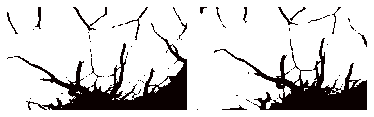

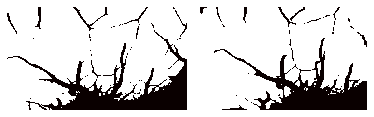

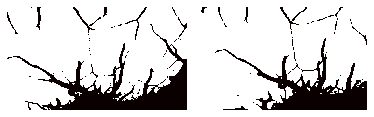

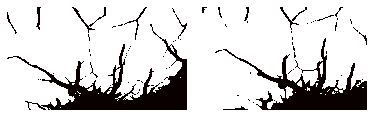

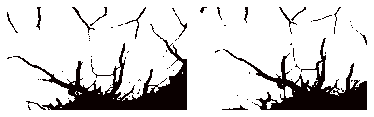

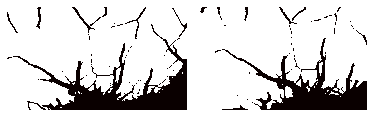

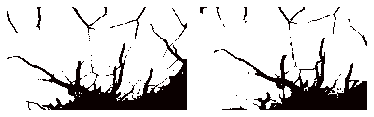

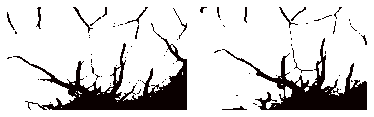

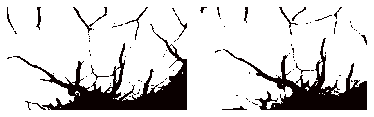

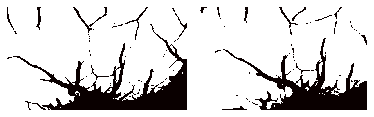

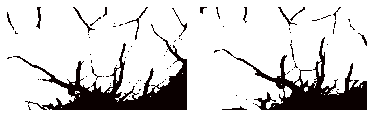

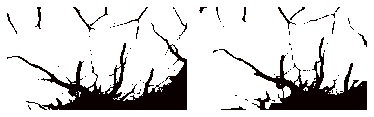

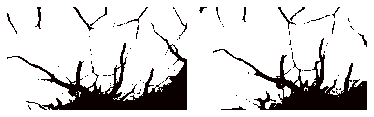

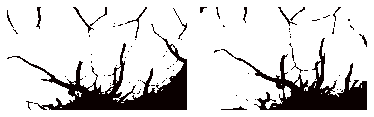

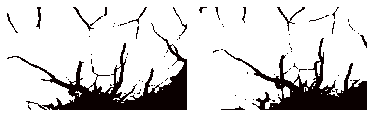

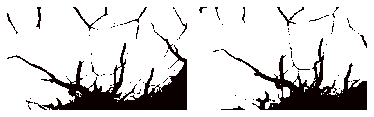

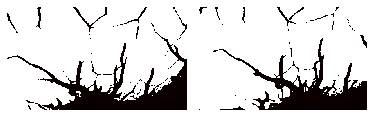

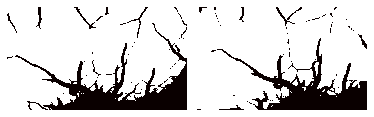

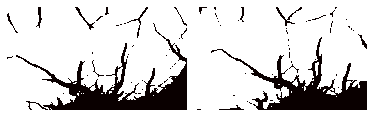

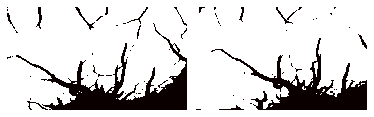

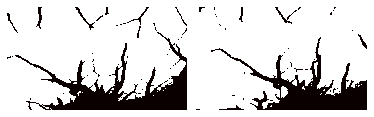

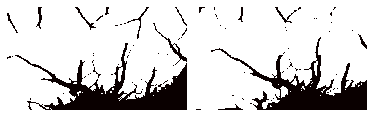

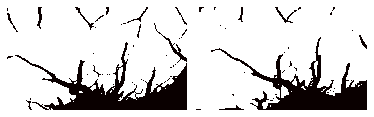

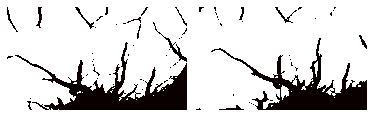

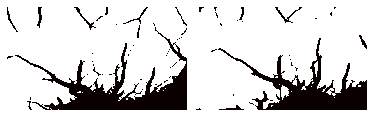

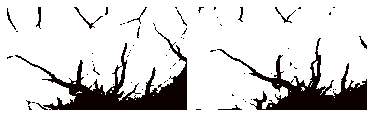

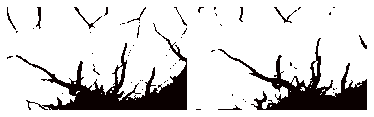

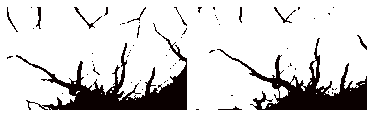

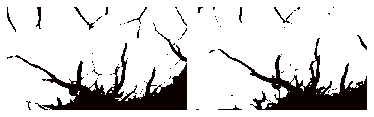

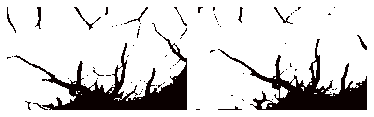

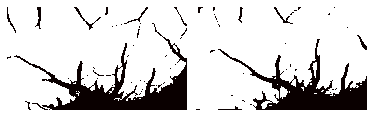

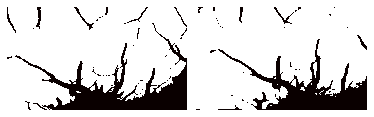

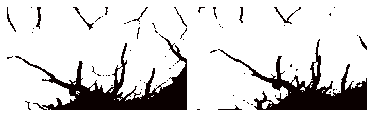

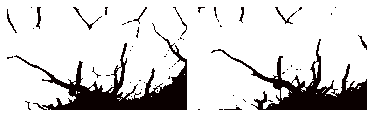

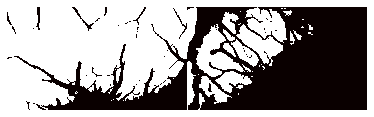

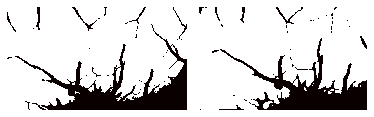

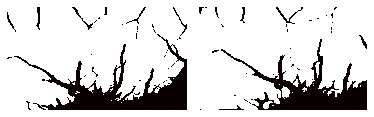

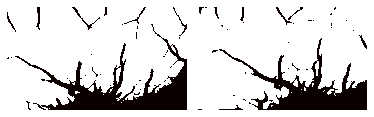

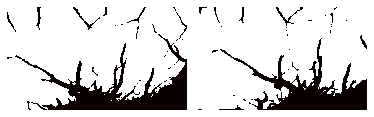

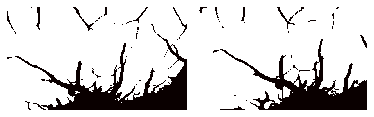

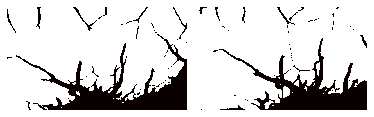

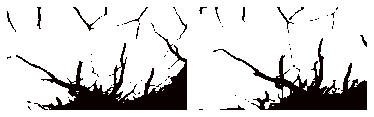

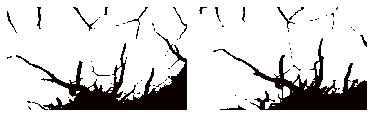

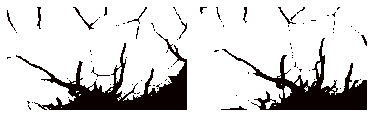

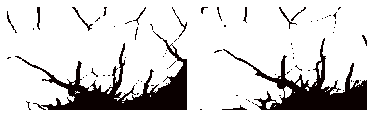

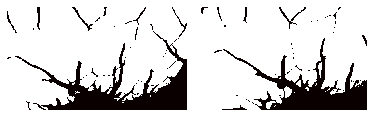

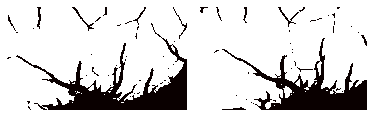

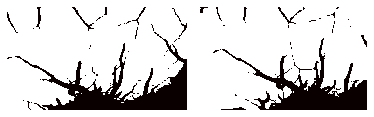

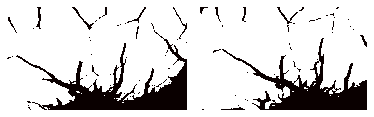

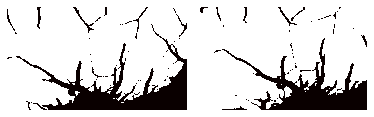

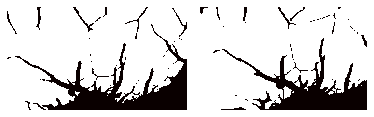

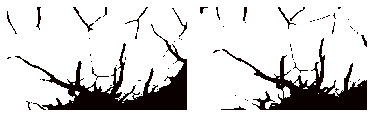

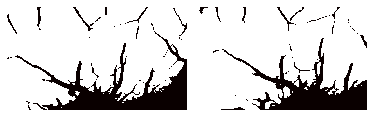

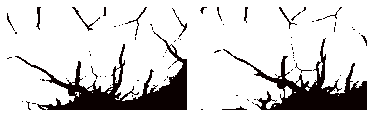

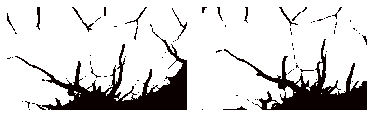

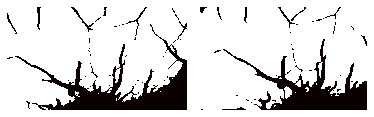

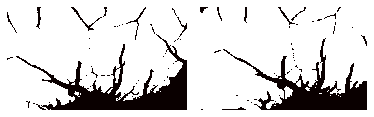

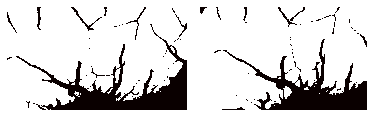

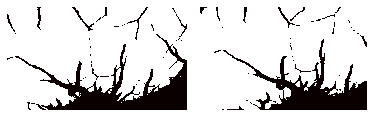

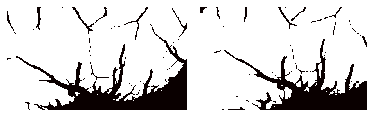

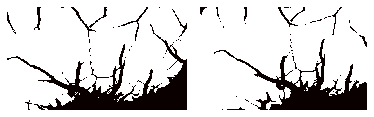

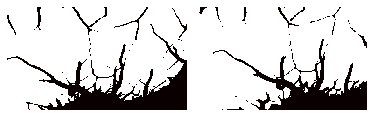

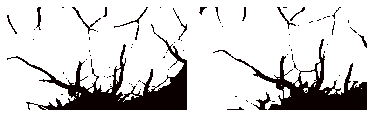

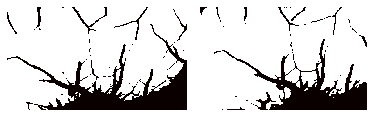

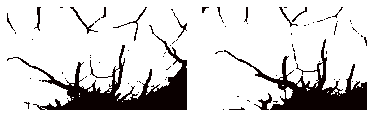

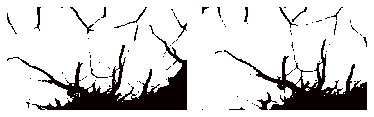

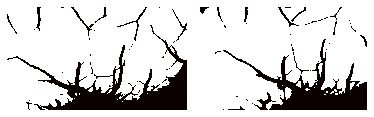

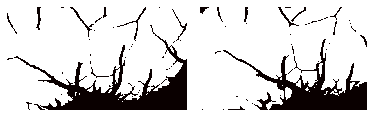

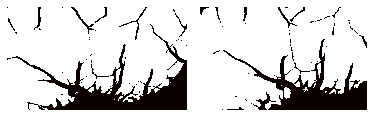

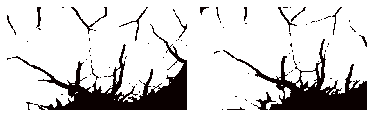

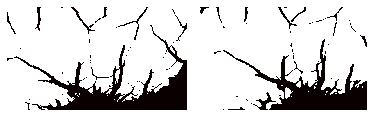

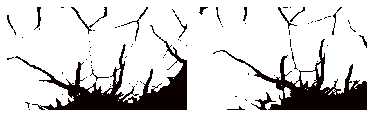

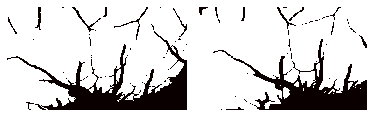

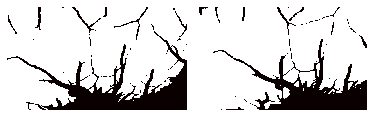

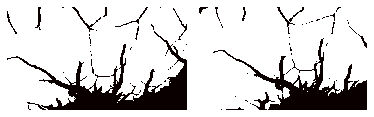

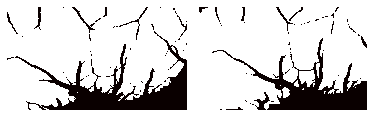

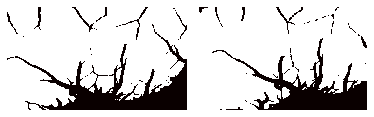

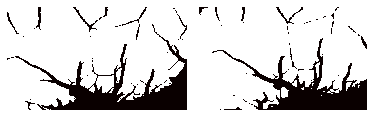

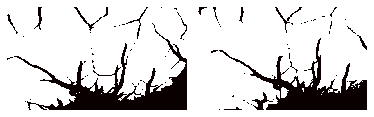

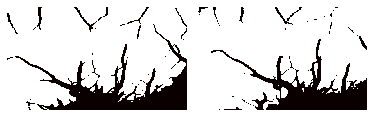

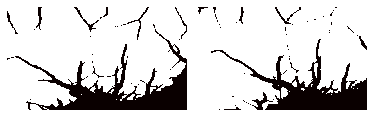

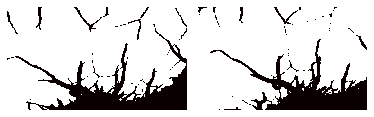

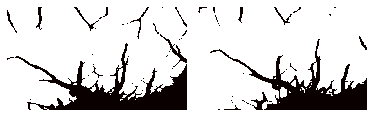

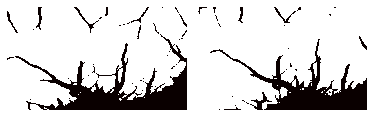

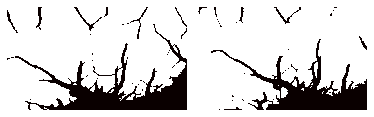

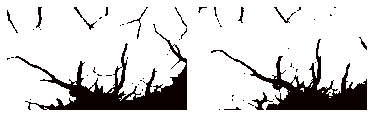

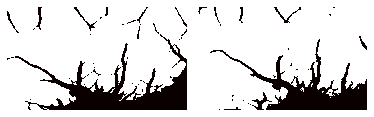

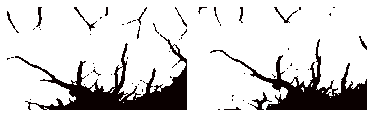

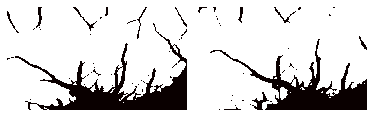

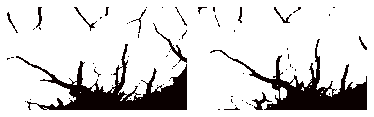

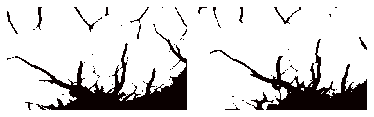

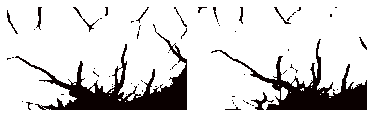

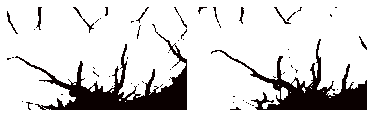

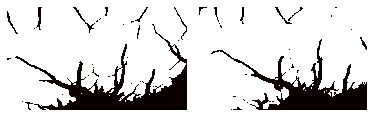

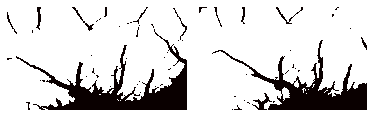

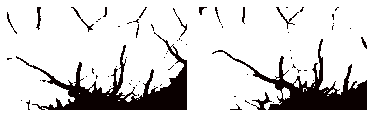

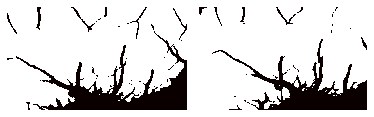

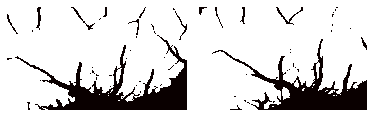

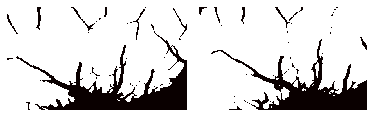

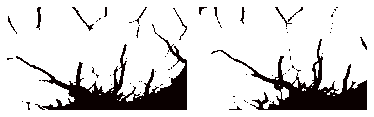

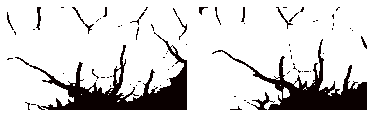

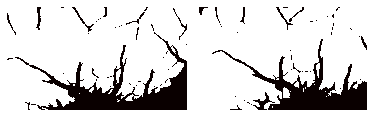

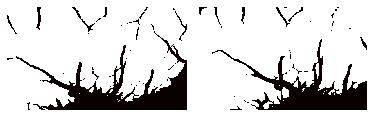

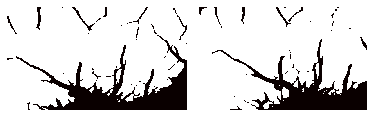

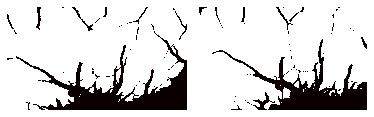

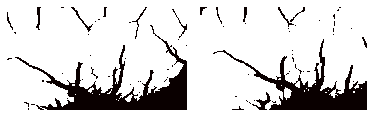

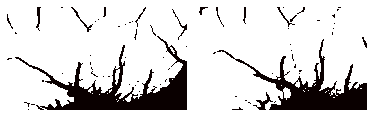

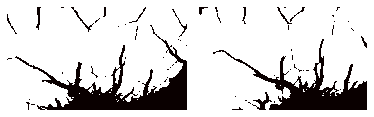

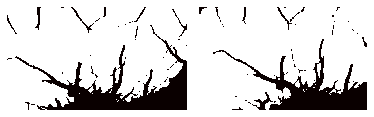

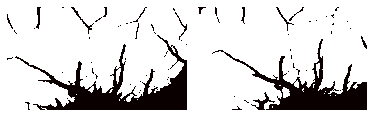

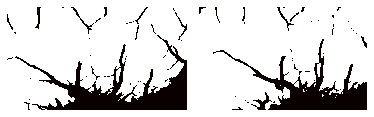

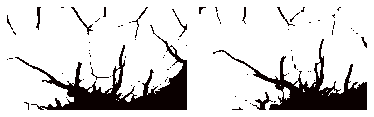

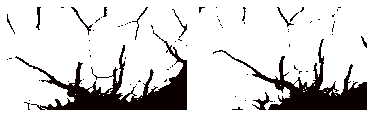

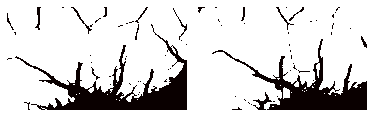

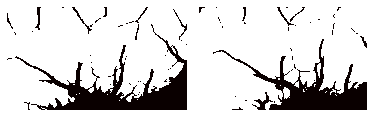

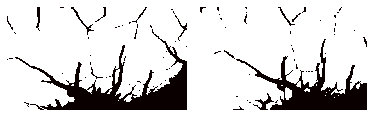

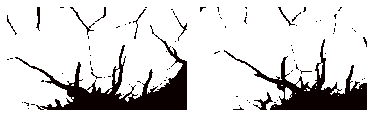

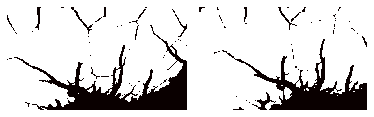

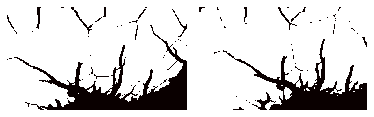

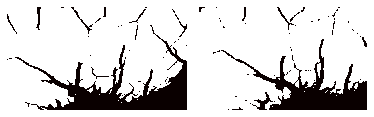

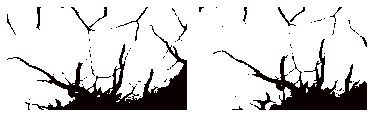

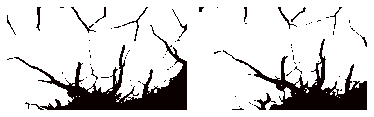

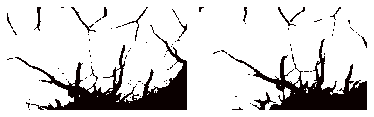

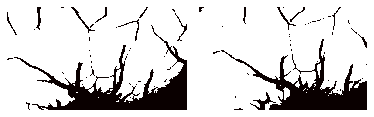

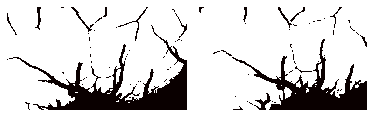

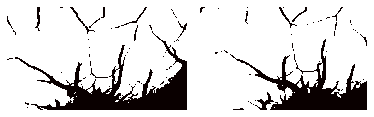

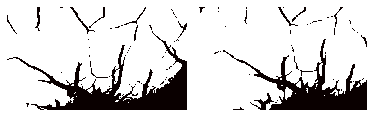

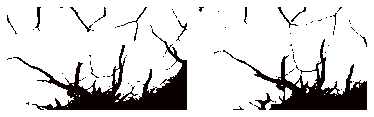

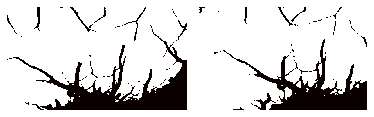

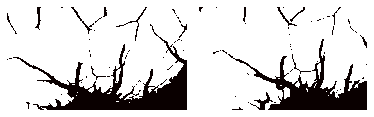

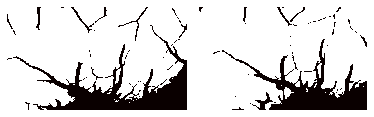

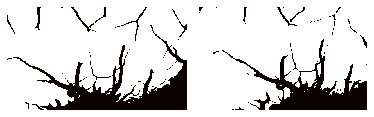

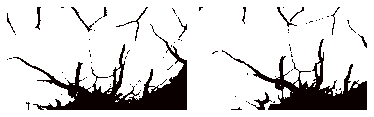

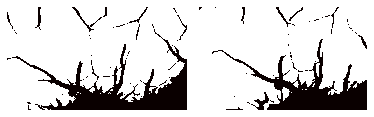

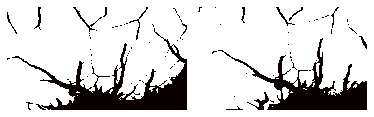

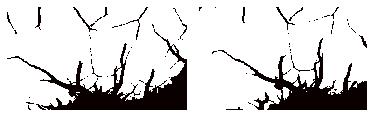

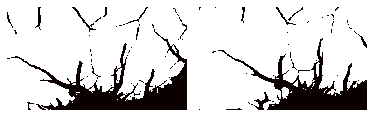

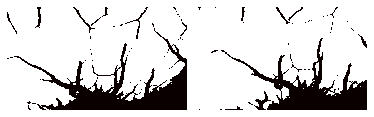

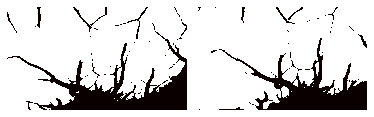

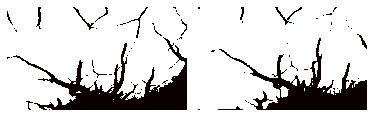

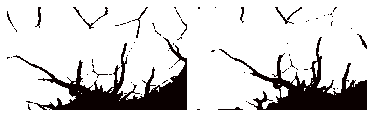

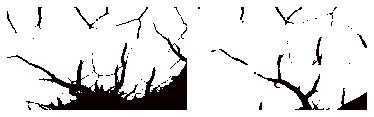

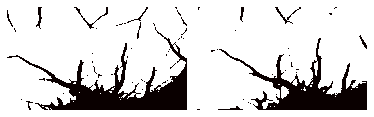

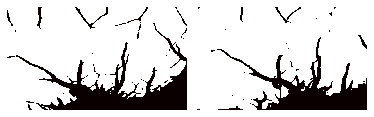

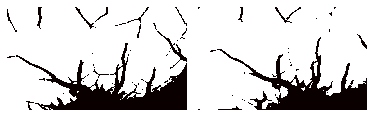

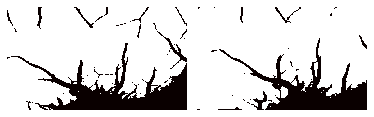

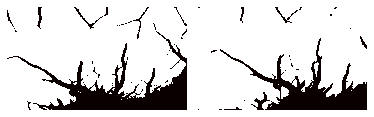

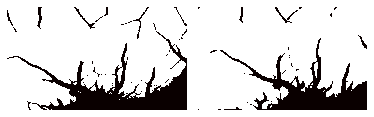

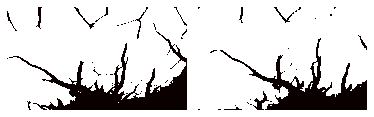

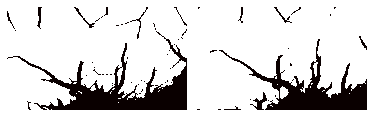

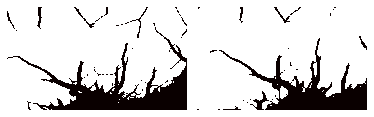

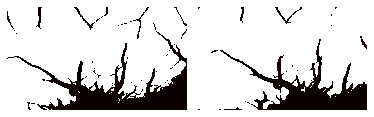

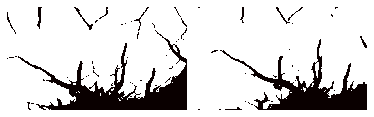

In [40]:
threshold_vessels(top_crops, 
                 "/home/andrew/Github/neuralink-bot/Image_Segmentation/segmented_images/top_crop/", 
                 "top_crop")

/home/andrew/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


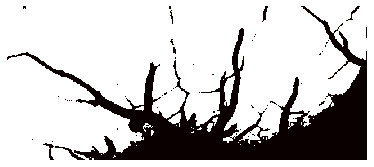

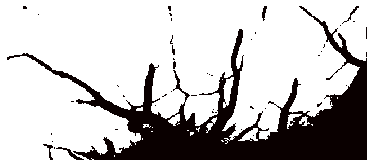

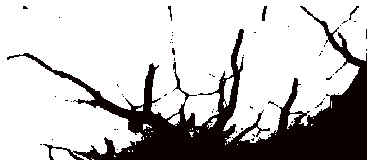

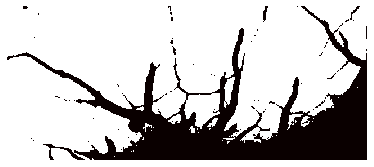

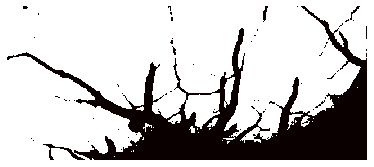

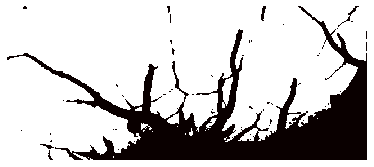

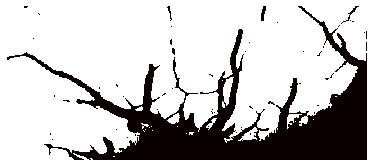

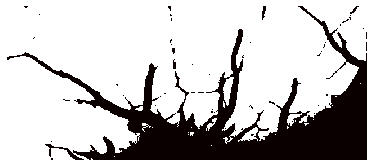

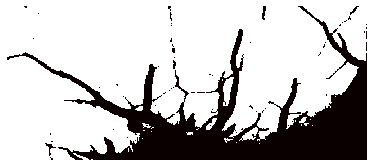

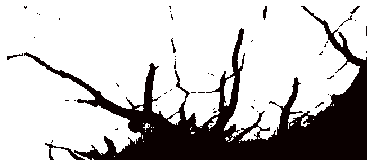

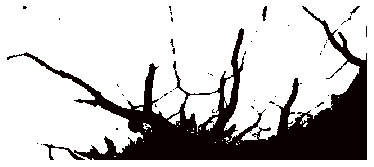

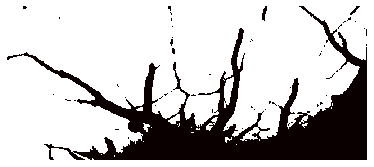

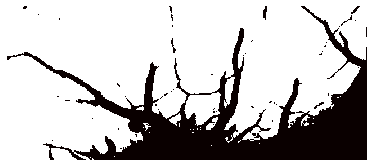

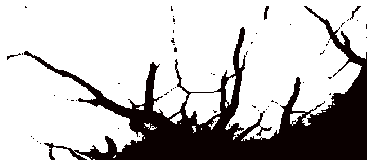

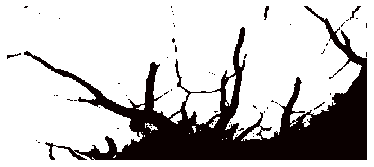

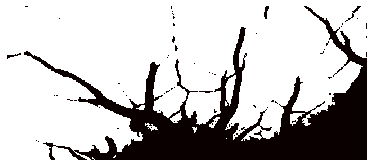

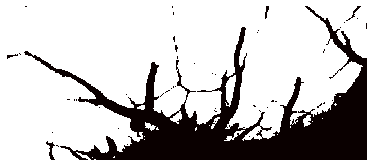

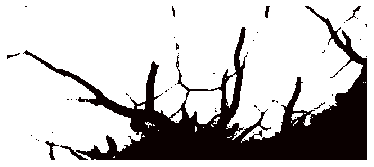

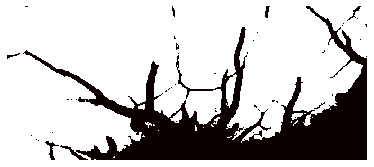

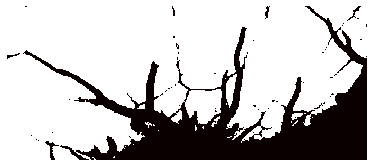

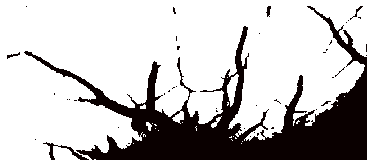

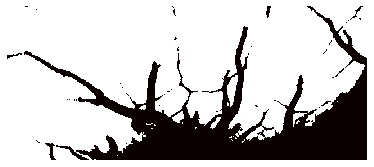

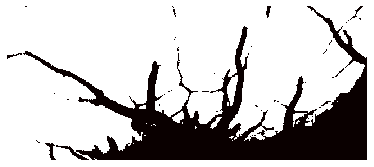

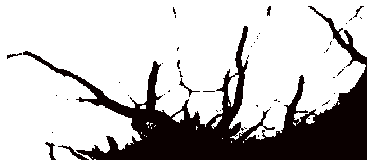

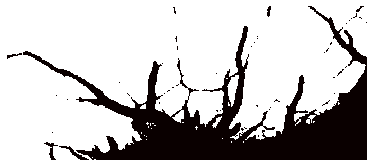

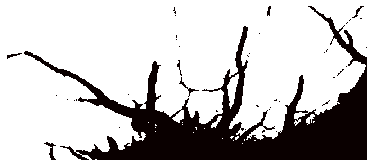

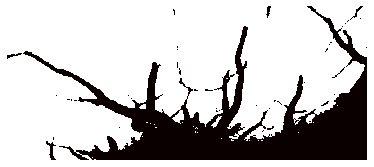

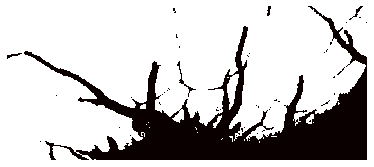

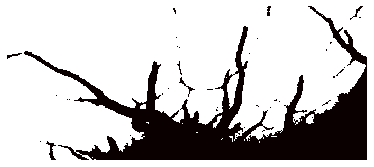

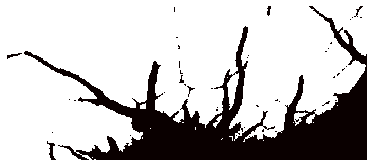

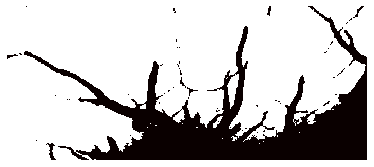

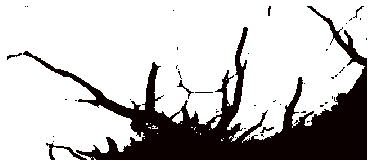

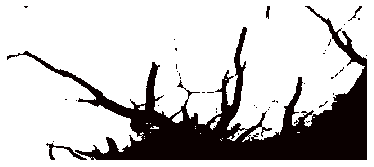

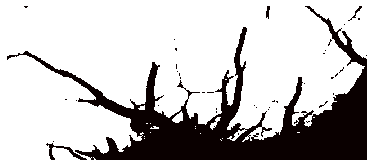

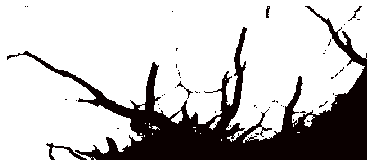

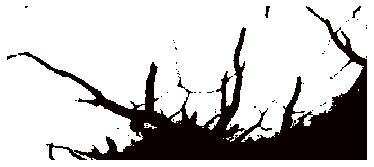

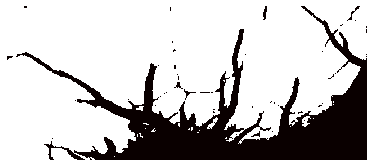

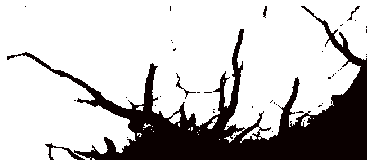

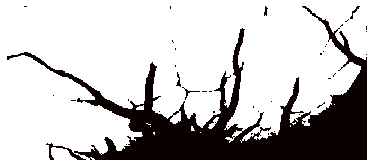

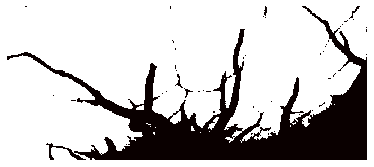

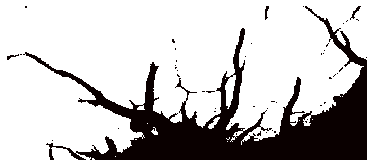

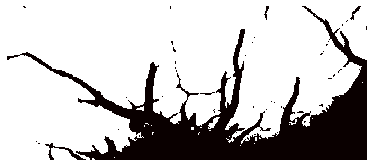

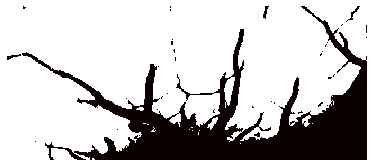

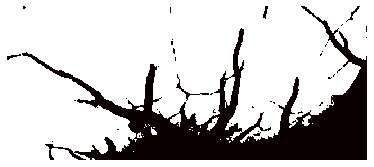

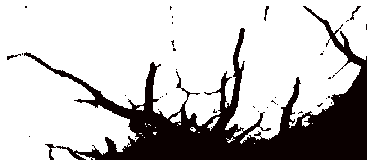

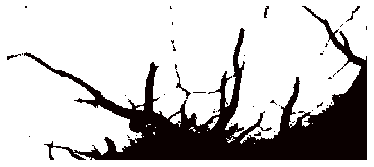

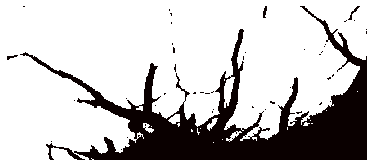

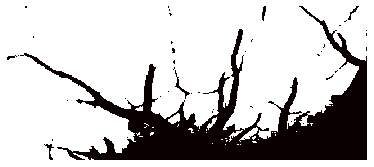

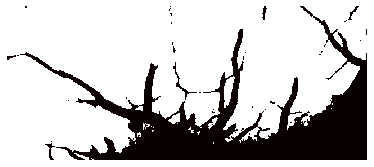

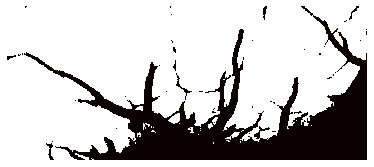

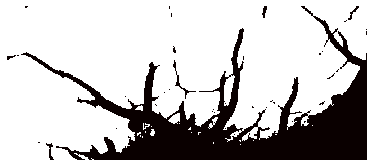

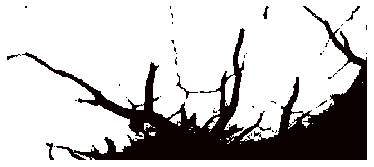

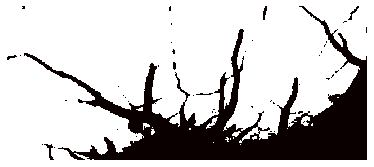

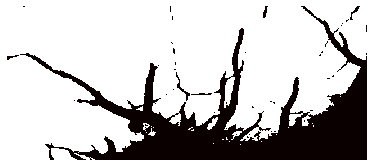

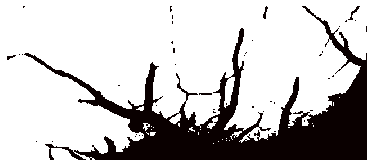

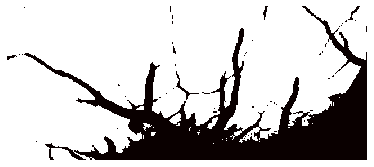

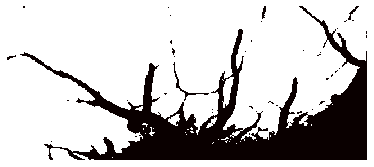

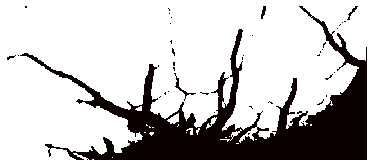

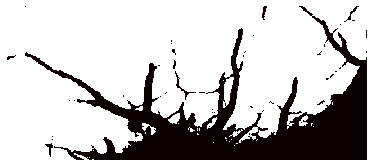

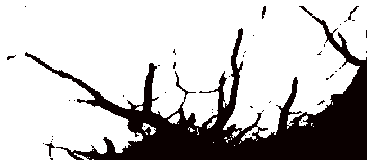

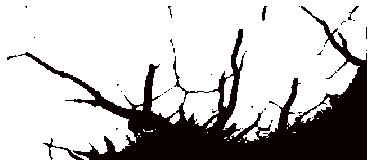

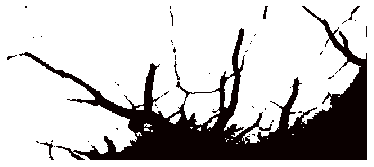

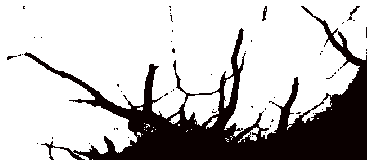

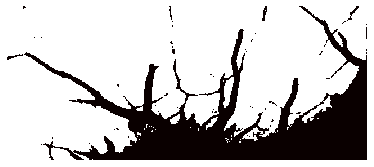

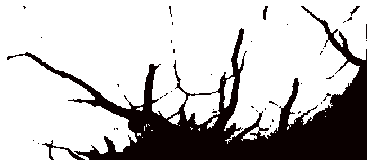

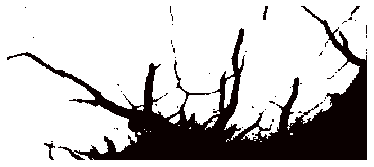

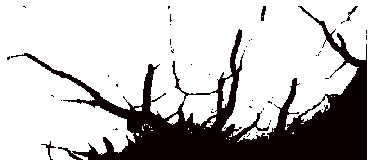

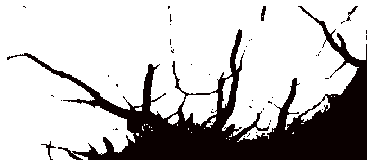

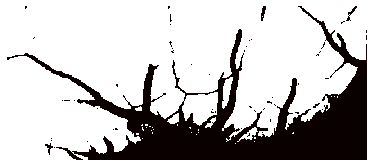

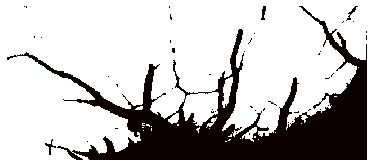

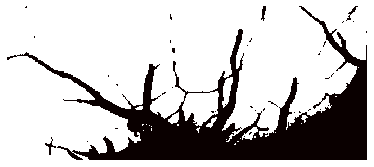

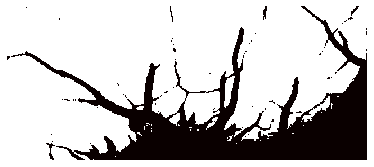

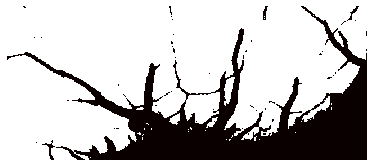

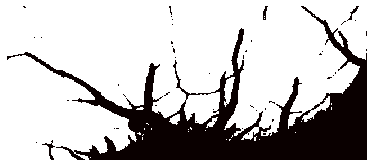

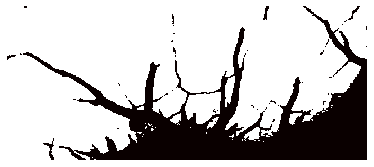

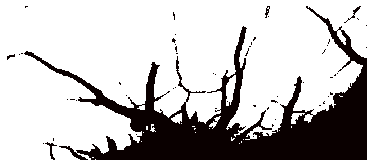

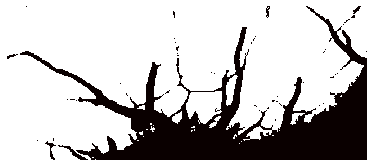

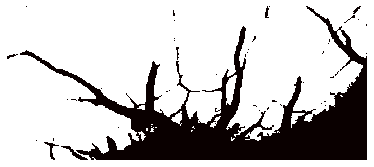

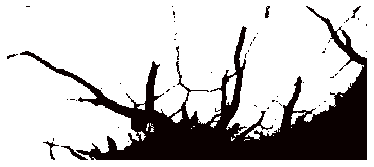

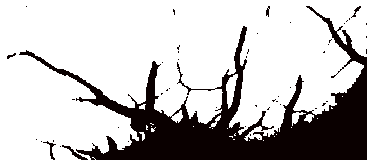

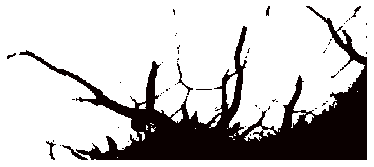

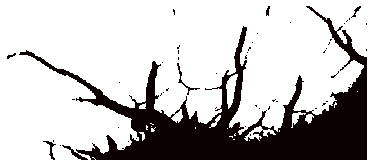

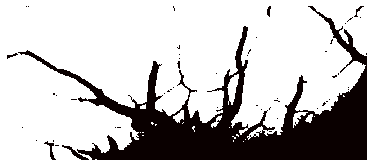

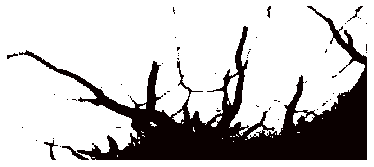

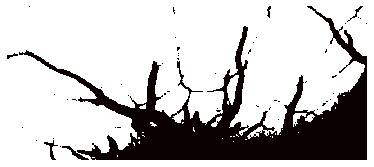

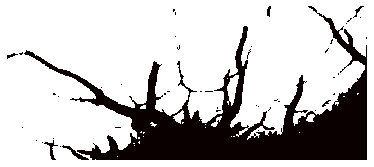

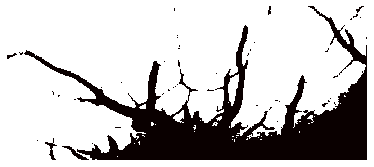

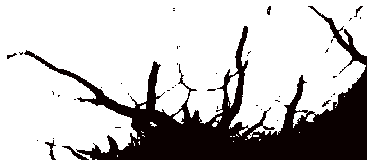

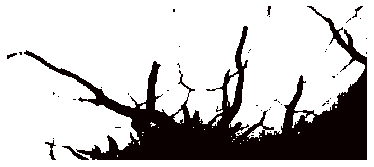

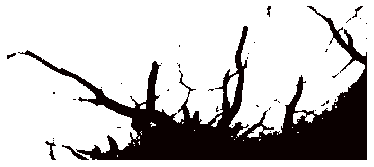

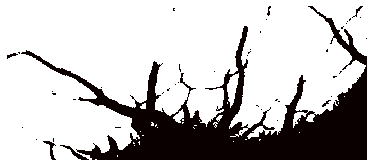

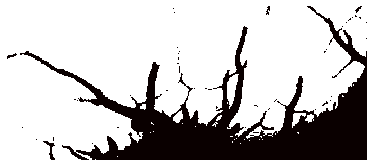

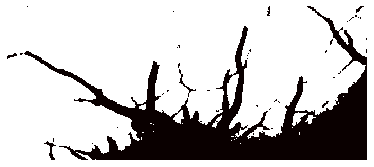

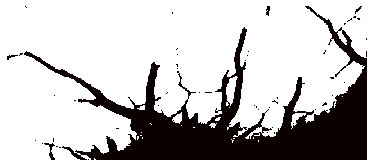

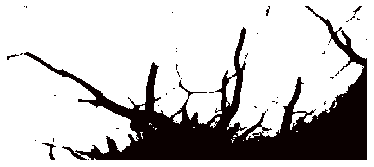

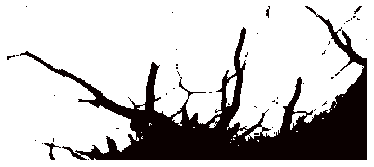

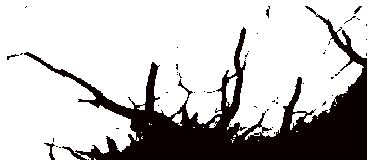

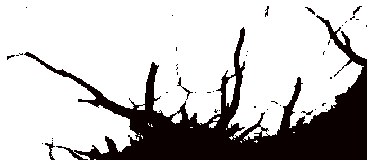

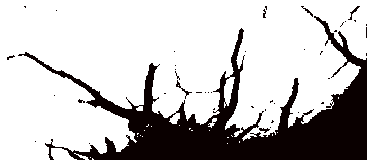

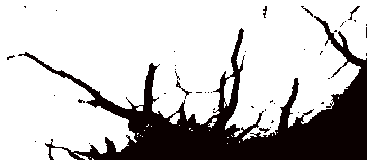

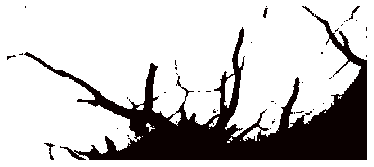

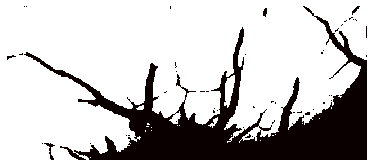

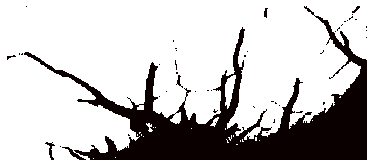

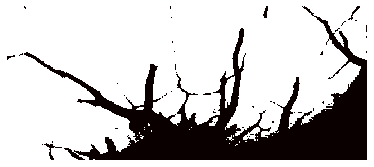

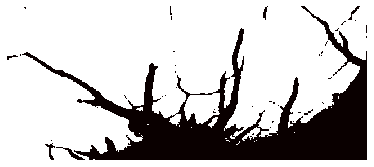

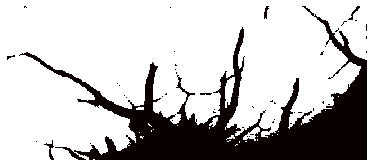

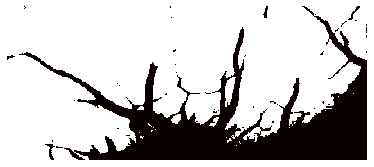

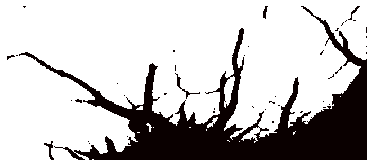

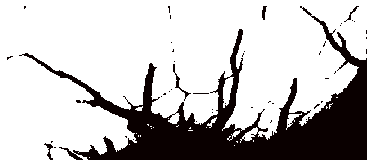

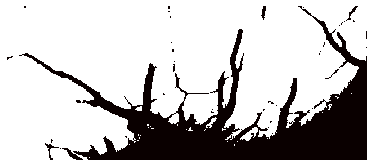

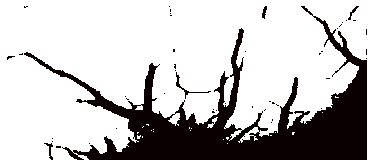

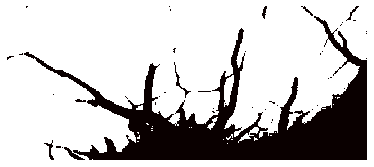

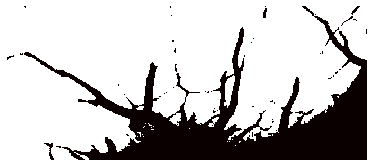

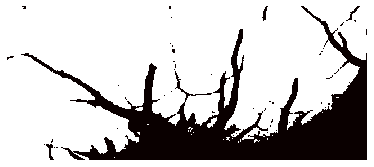

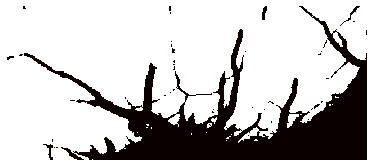

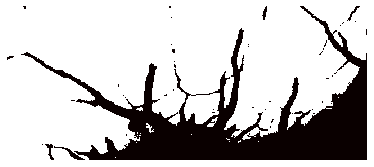

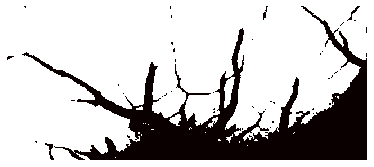

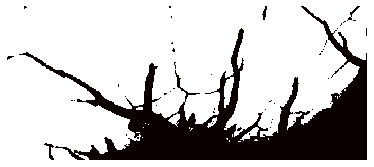

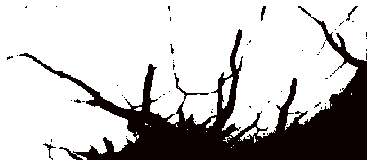

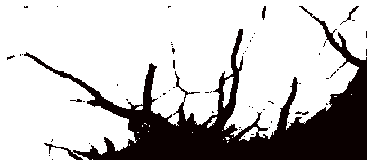

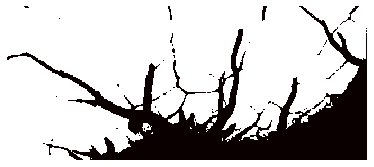

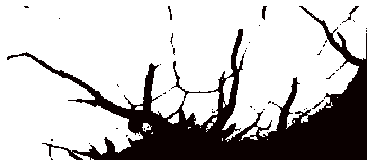

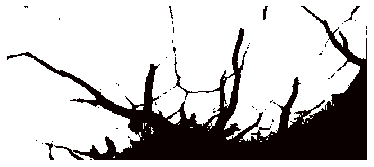

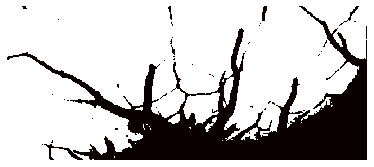

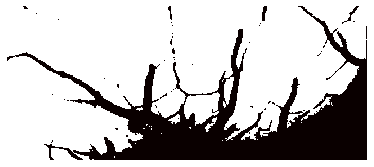

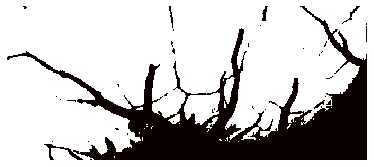

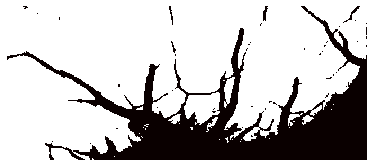

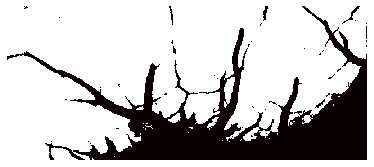

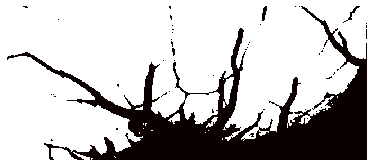

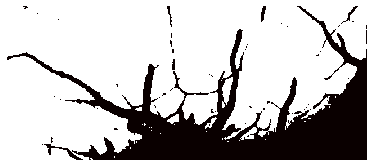

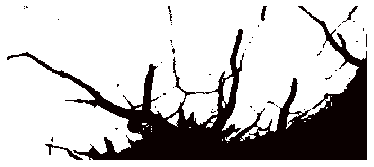

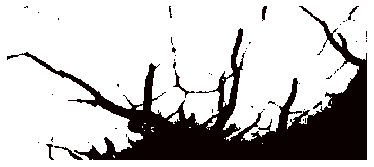

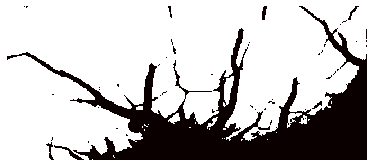

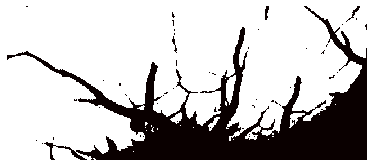

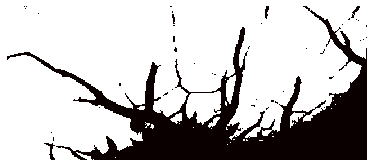

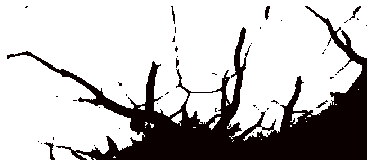

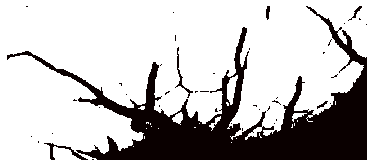

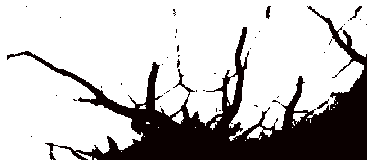

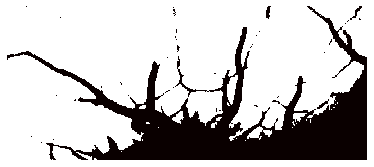

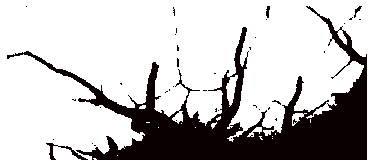

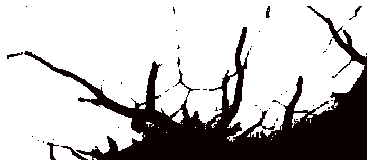

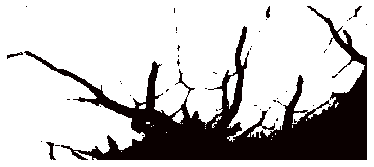

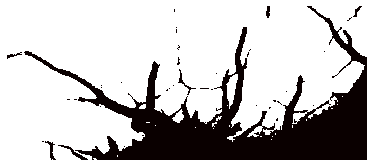

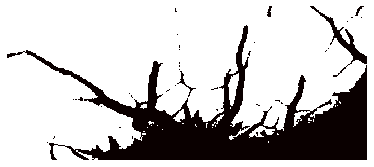

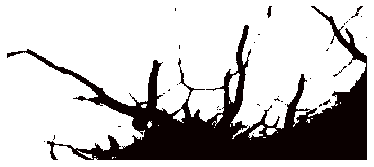

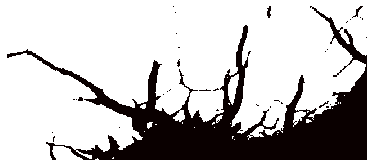

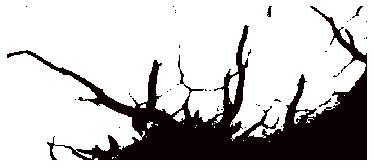

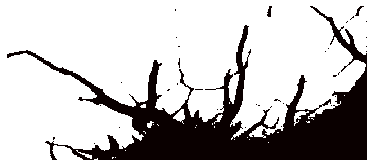

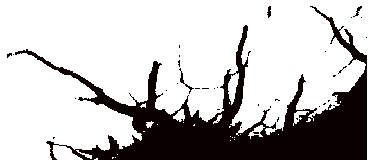

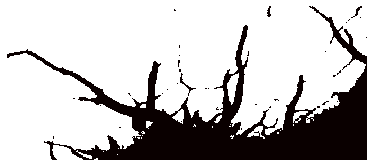

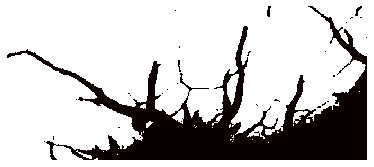

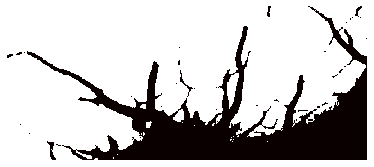

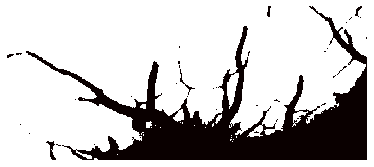

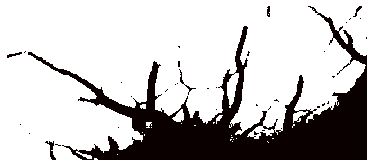

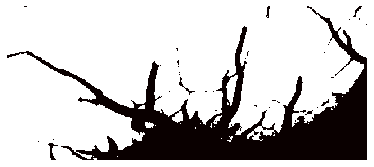

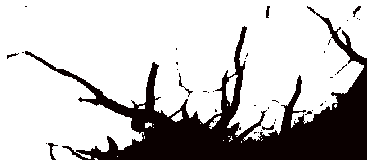

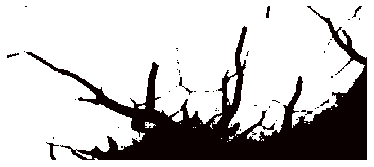

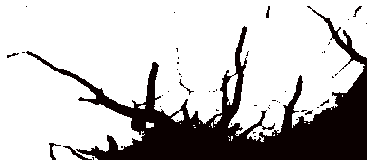

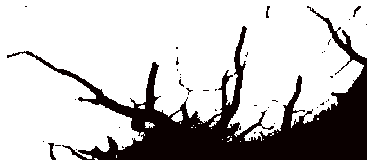

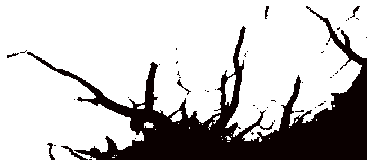

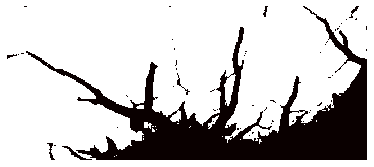

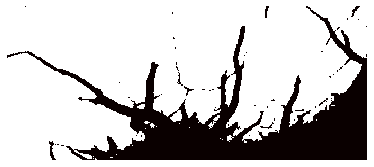

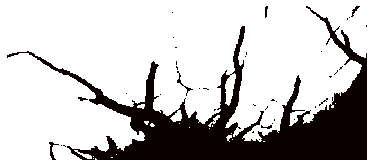

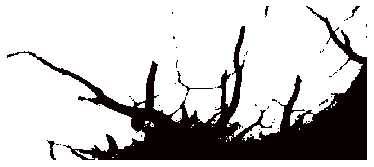

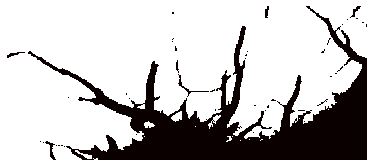

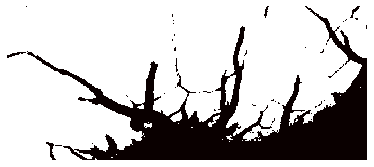

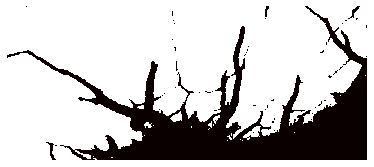

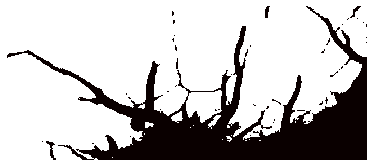

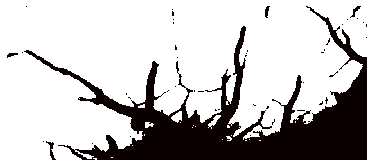

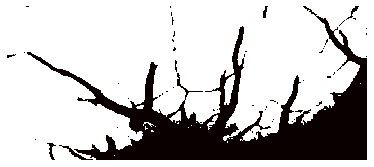

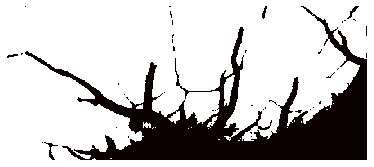

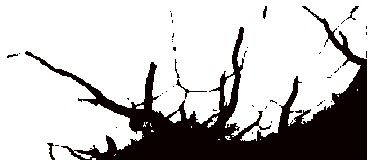

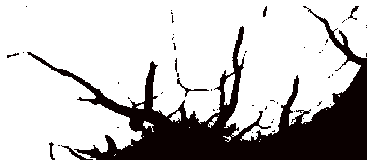

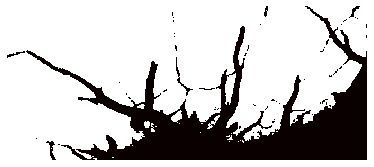

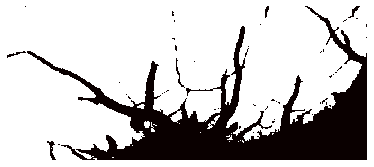

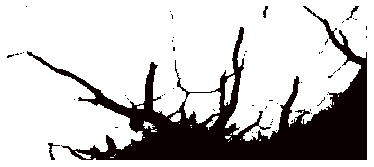

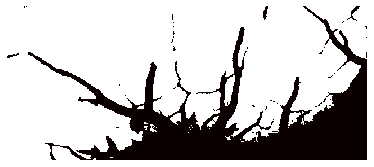

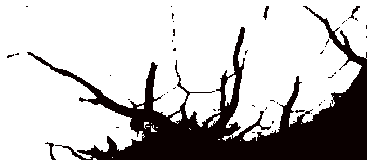

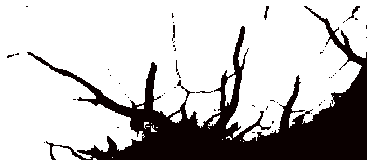

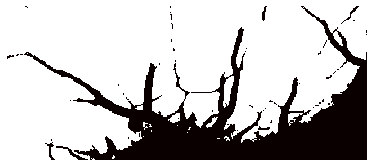

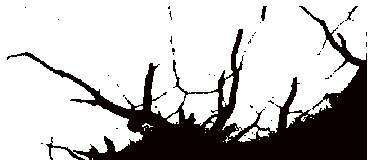

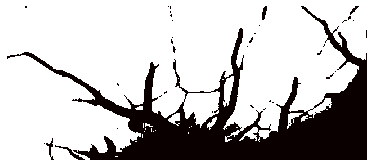

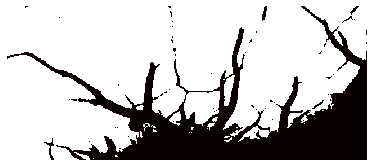

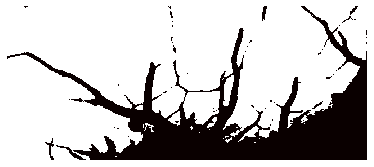

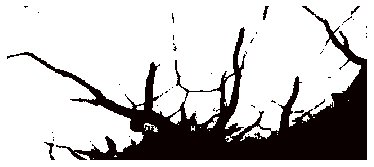

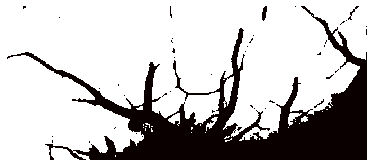

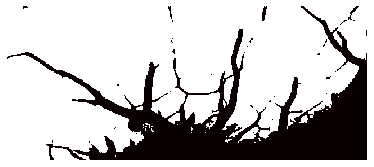

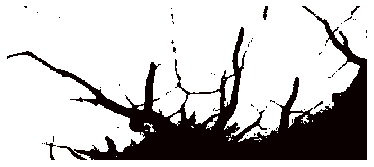

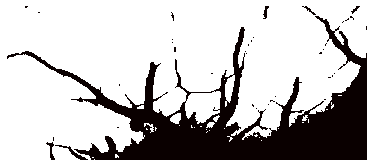

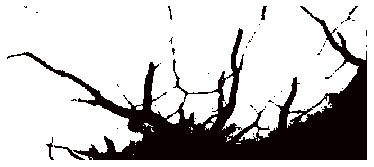

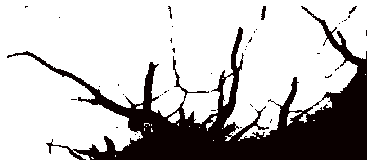

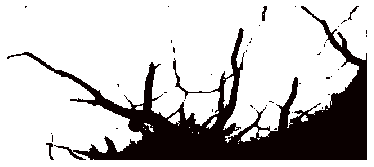

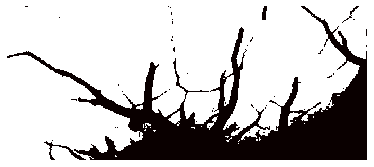

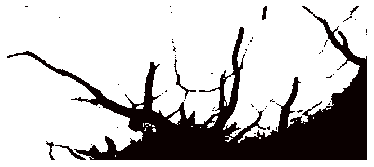

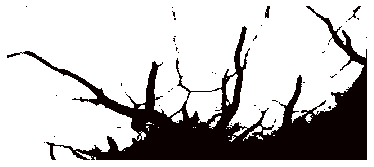

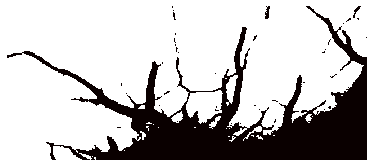

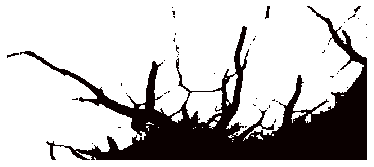

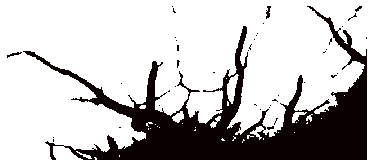

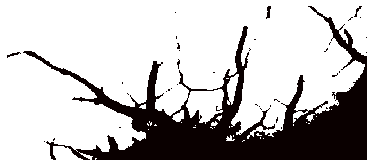

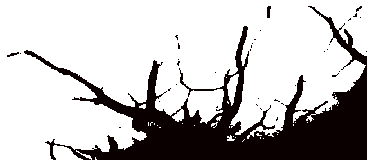

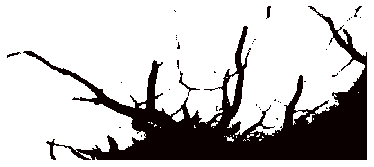

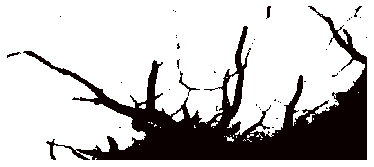

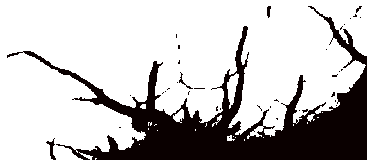

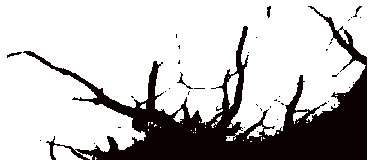

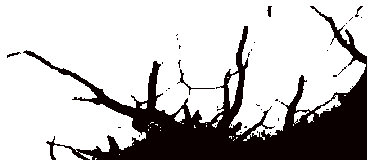

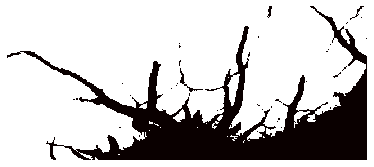

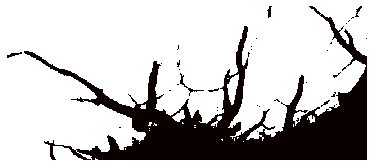

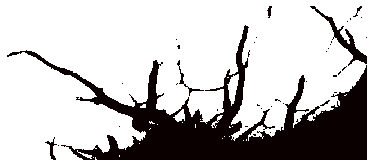

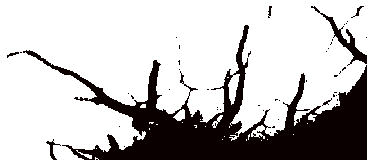

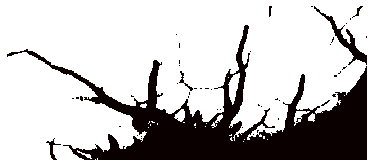

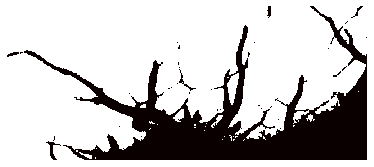

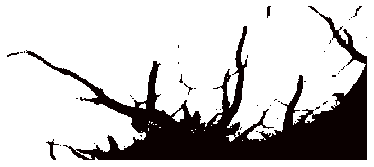

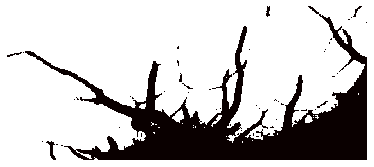

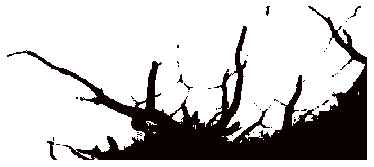

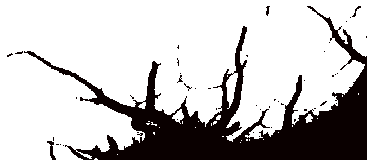

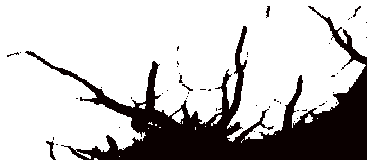

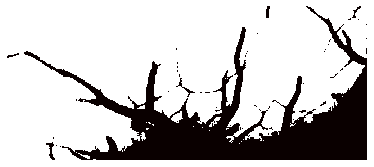

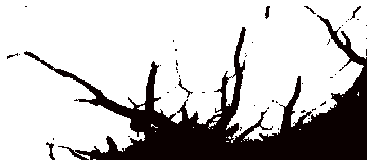

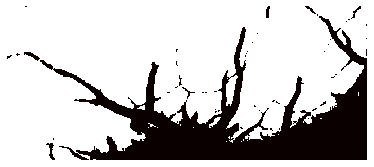

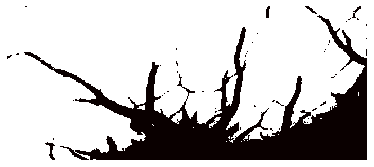

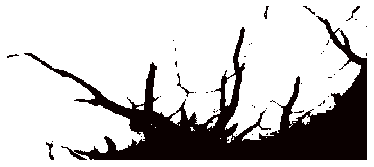

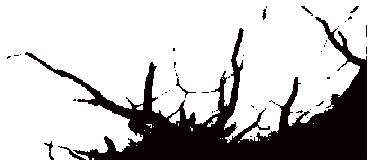

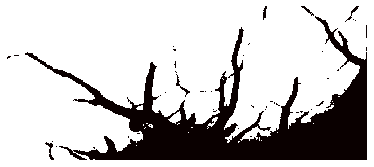

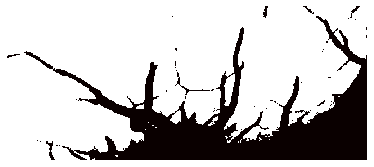

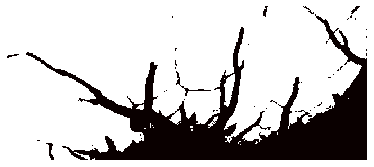

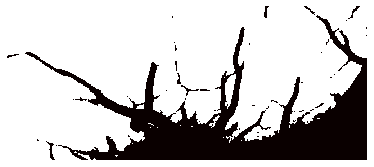

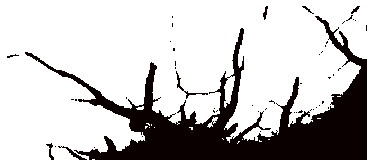

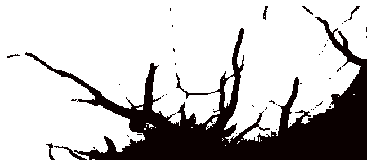

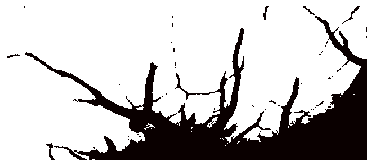

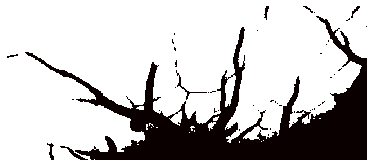

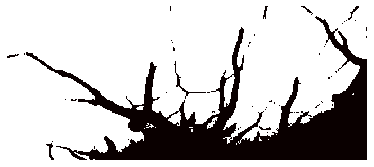

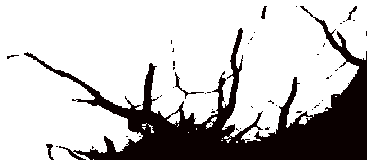

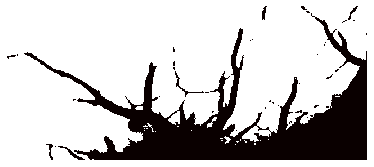

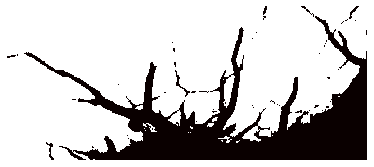

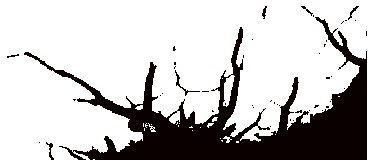

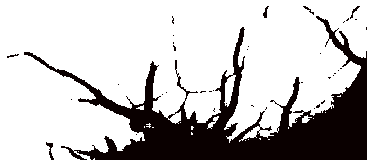

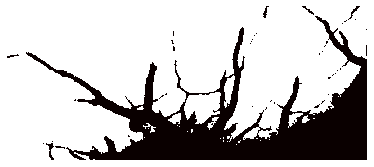

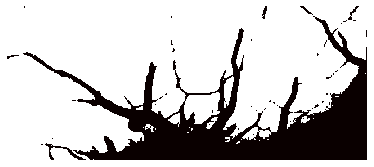

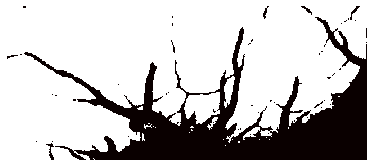

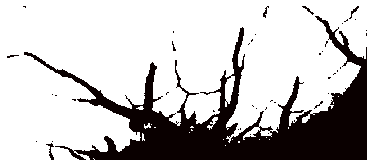

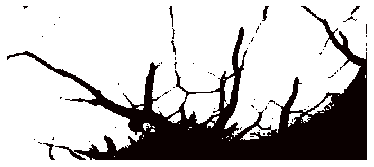

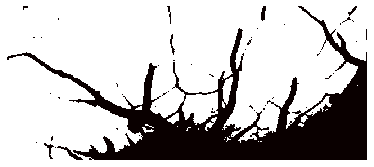

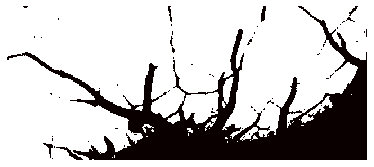

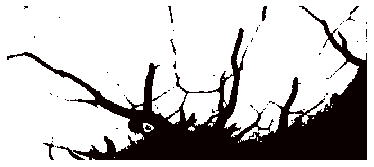

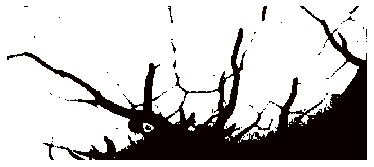

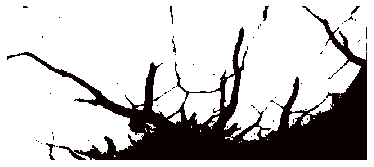

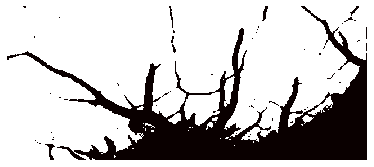

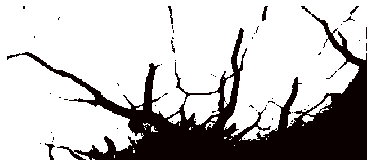

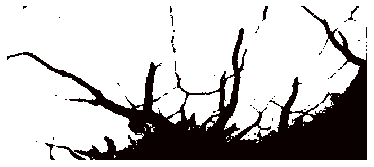

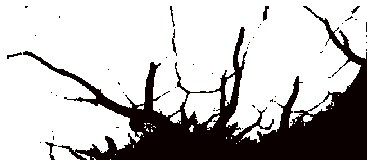

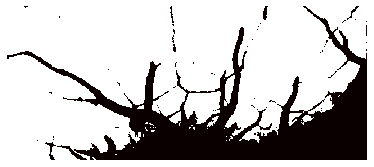

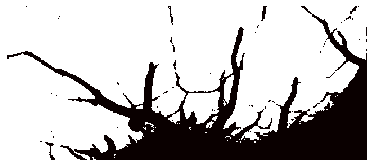

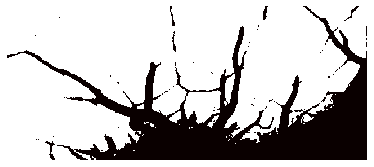

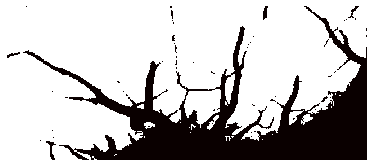

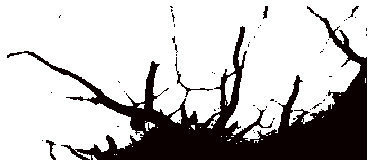

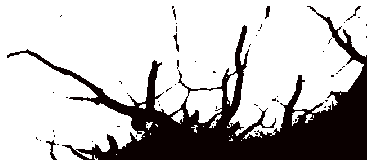

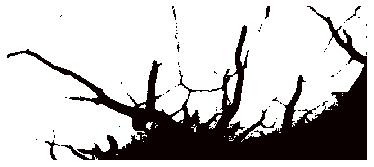

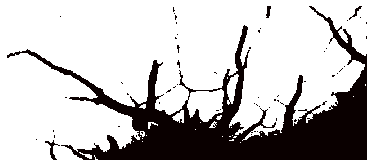

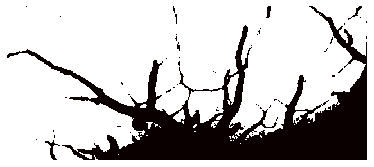

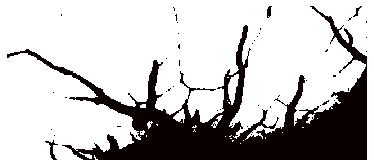

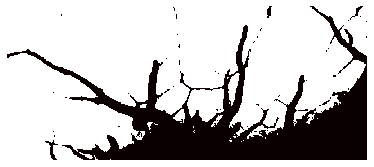

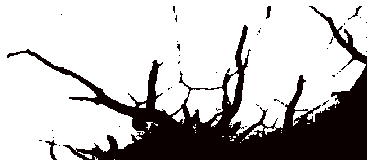

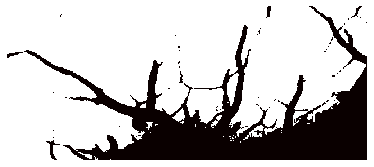

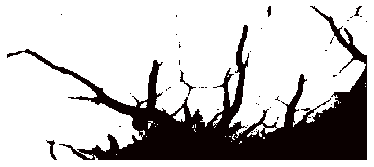

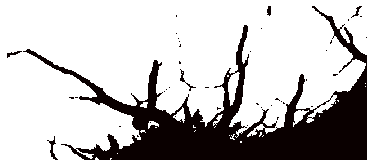

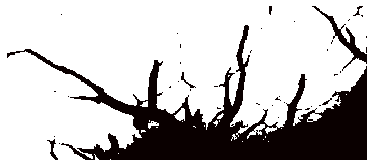

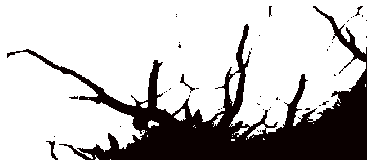

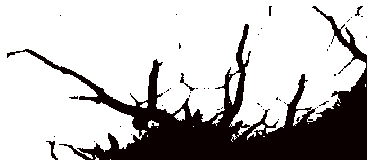

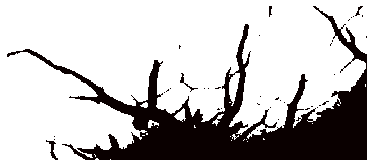

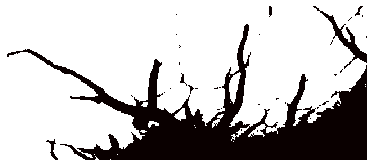

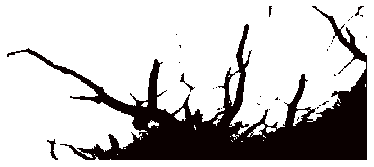

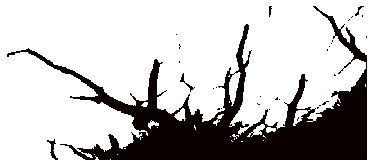

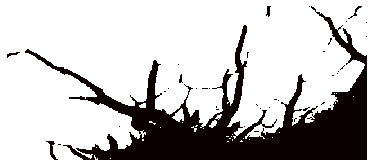

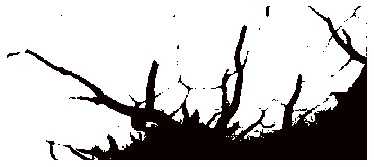

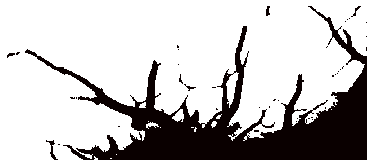

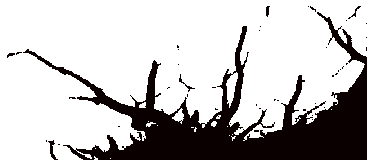

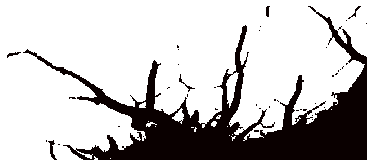

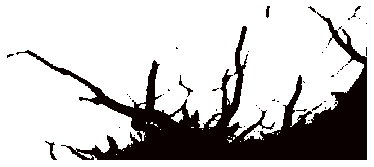

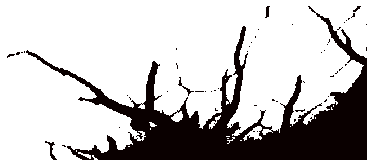

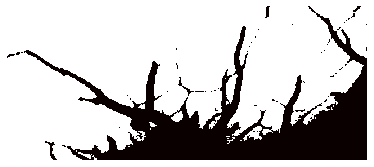

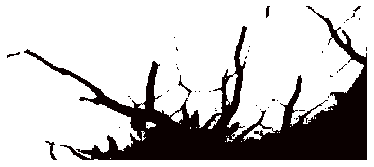

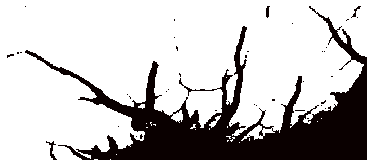

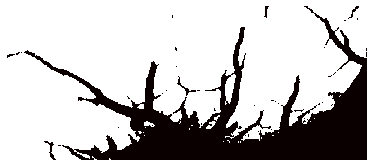

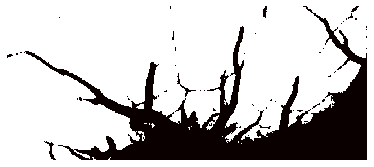

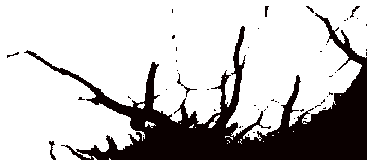

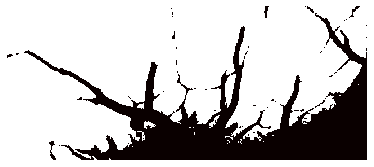

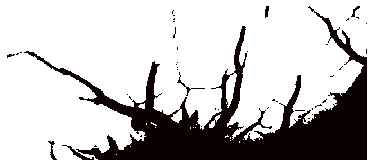

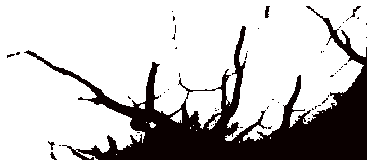

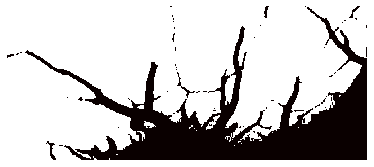

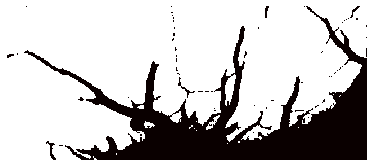

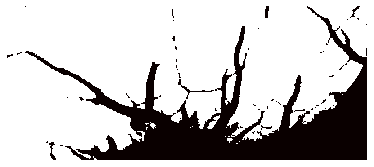

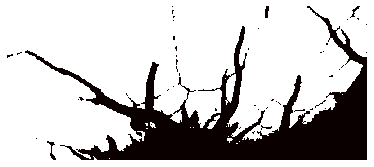

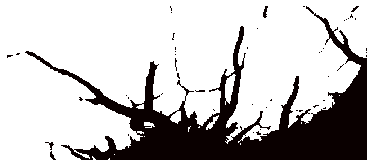

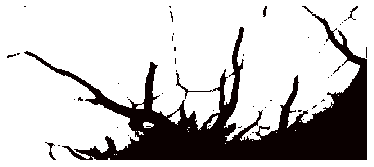

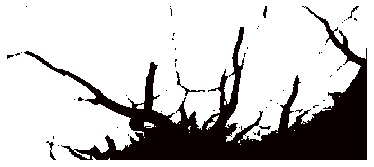

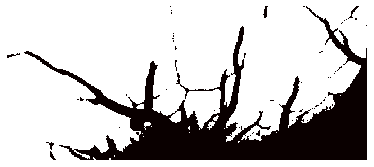

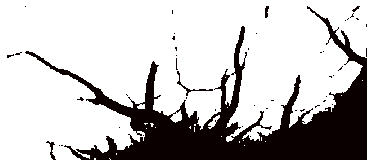

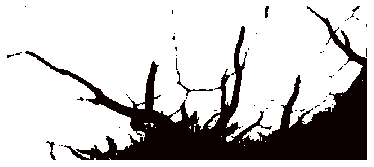

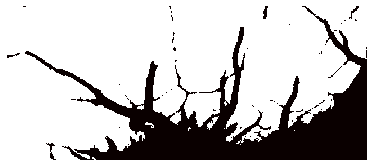

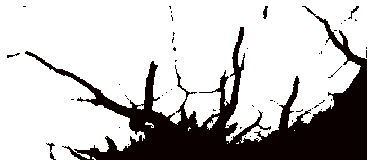

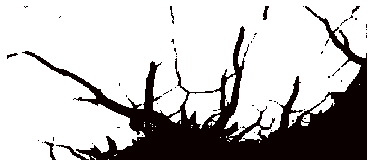

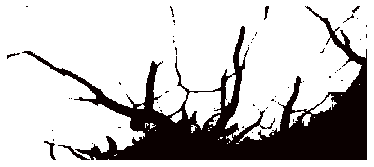

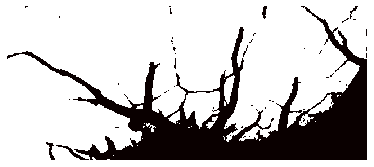

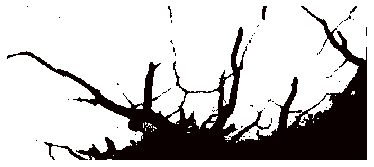

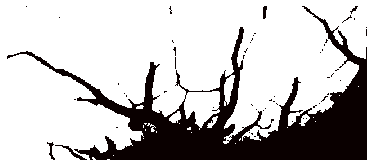

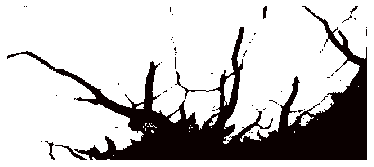

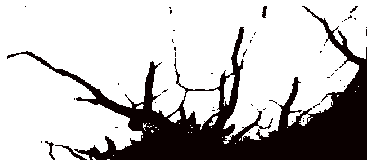

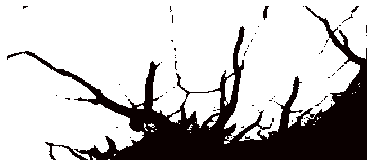

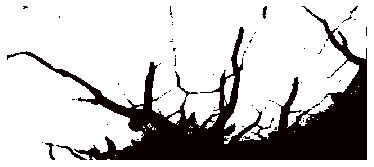

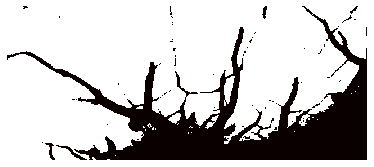

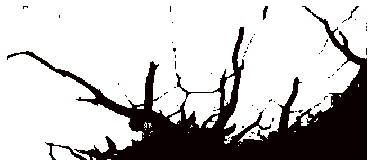

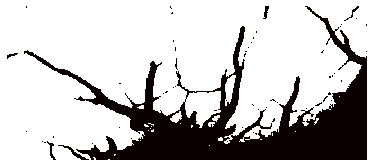

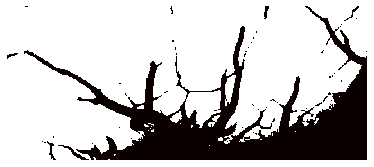

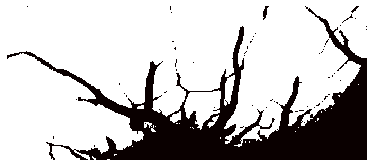

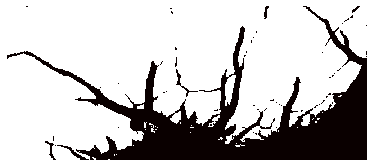

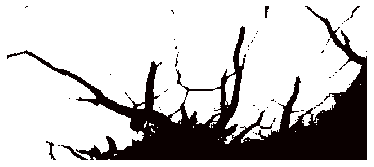

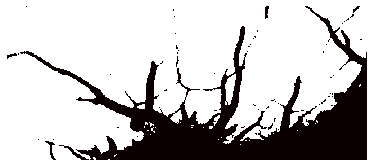

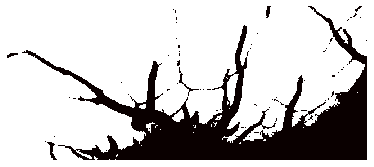

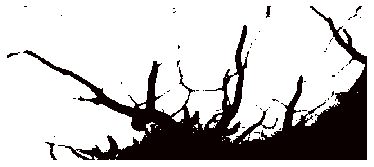

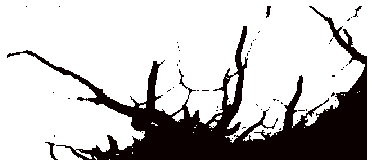

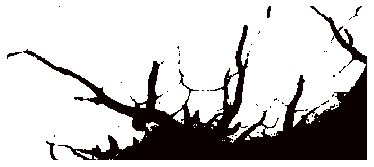

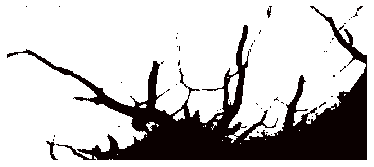

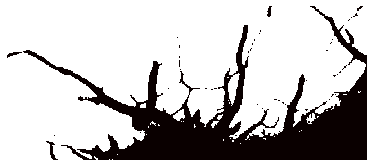

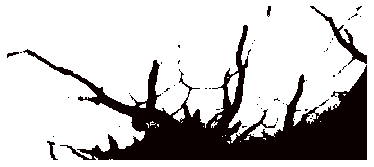

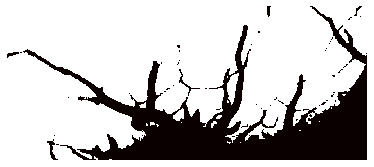

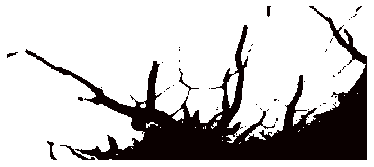

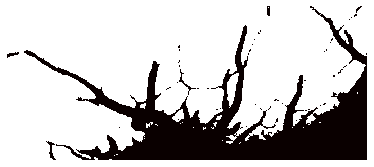

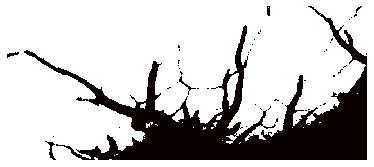

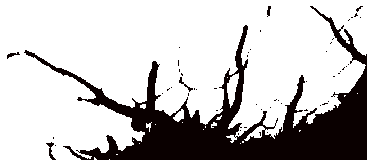

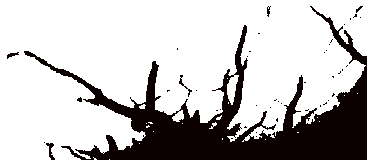

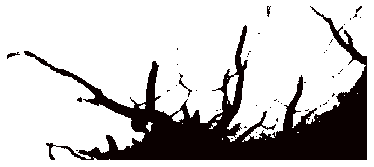

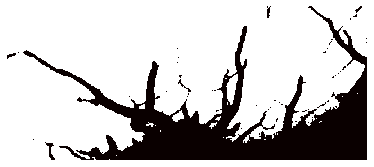

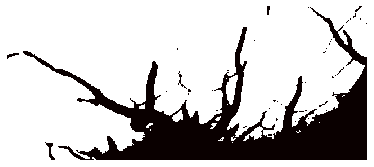

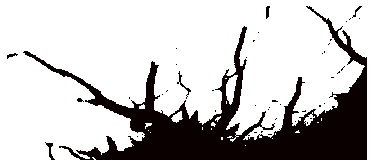

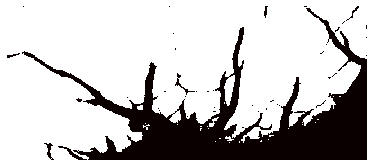

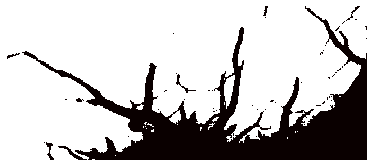

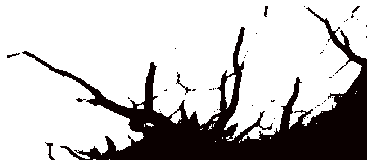

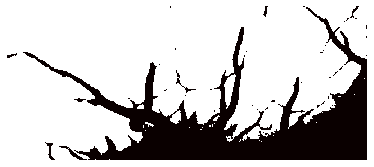

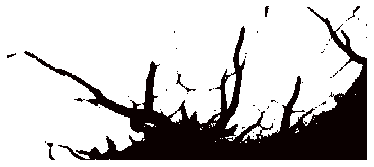

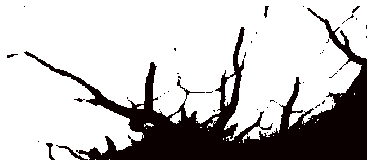

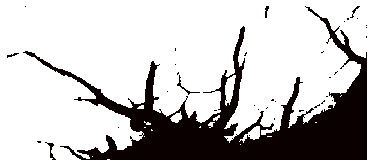

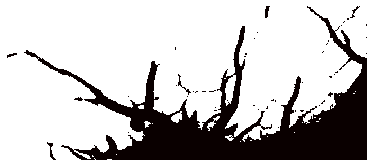

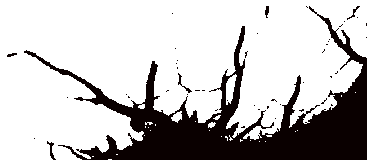

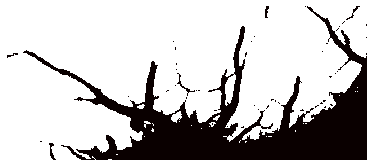

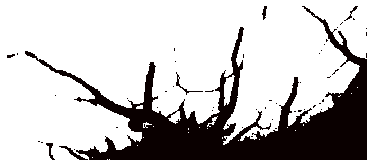

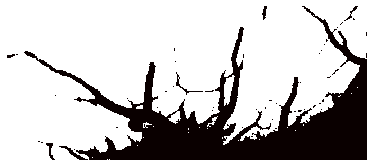

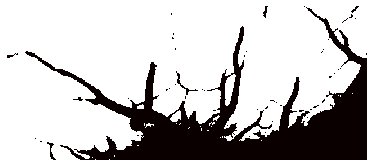

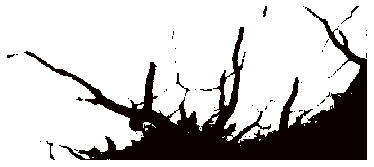

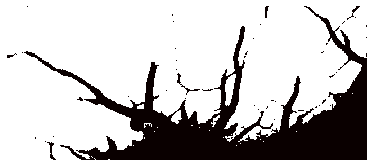

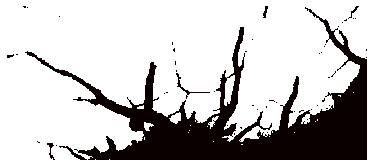

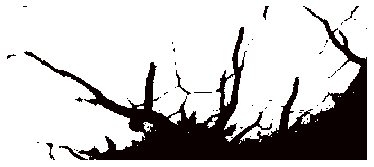

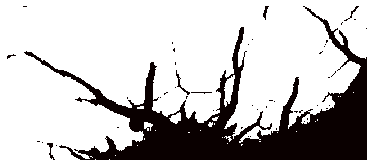

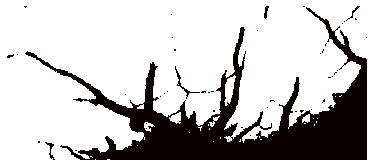

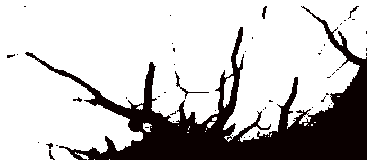

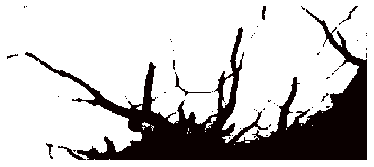

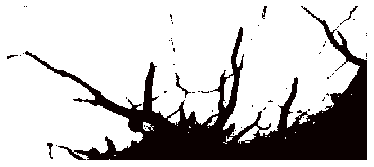

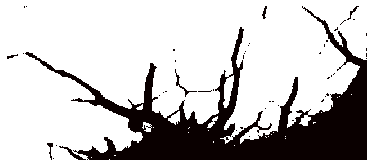

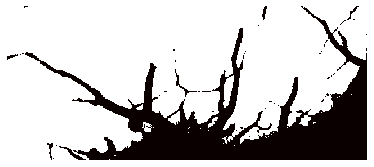

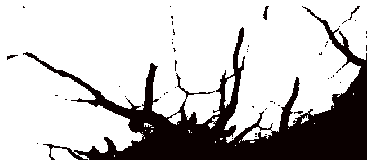

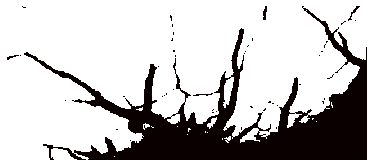

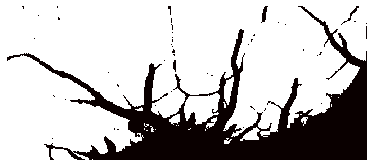

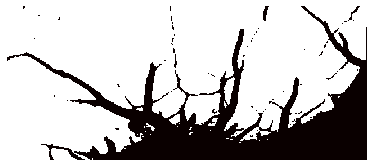

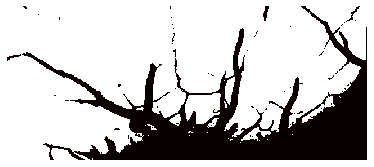

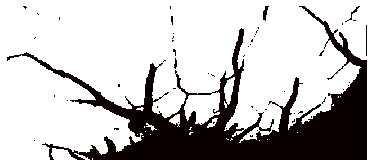

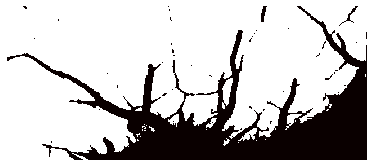

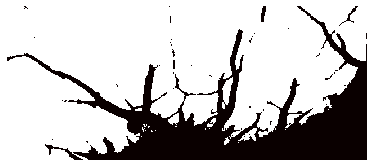

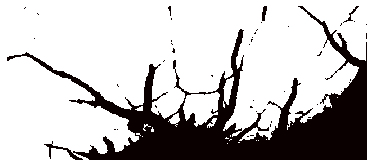

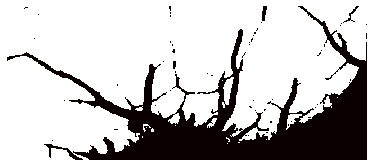

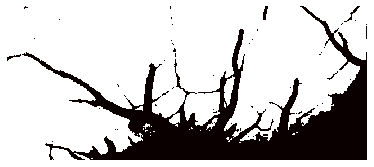

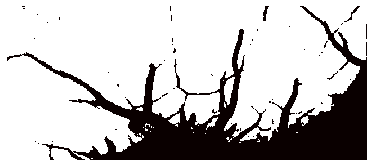

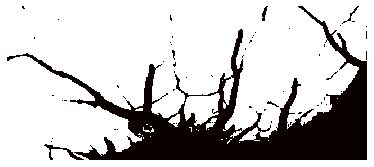

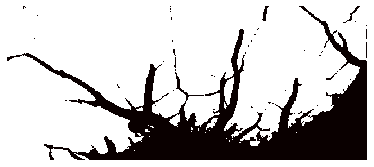

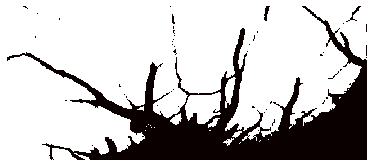

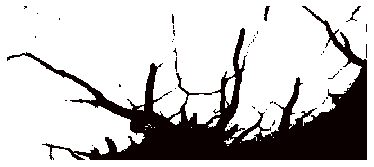

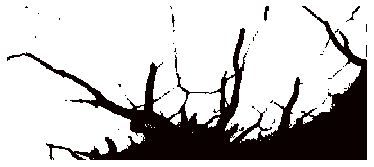

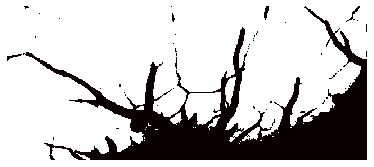

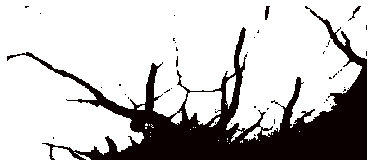

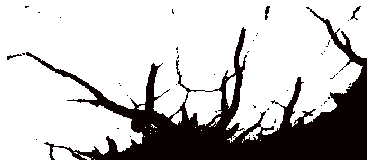

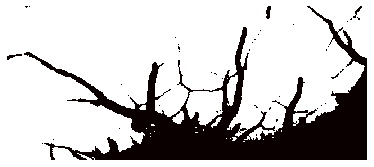

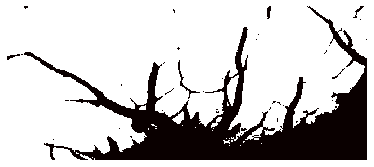

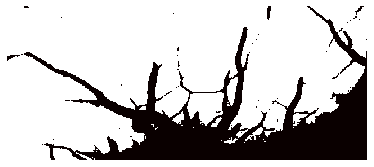

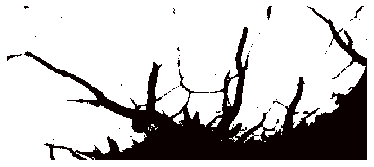

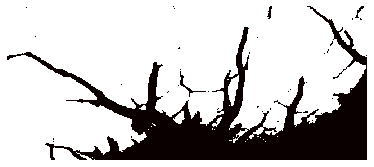

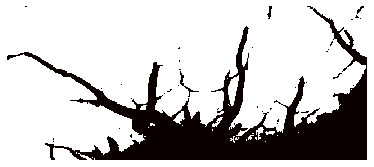

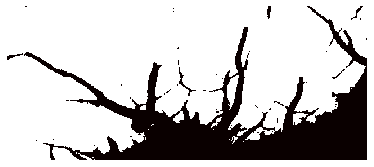

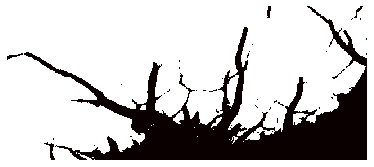

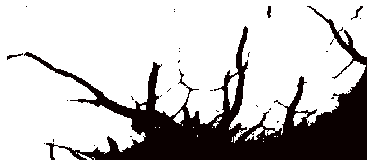

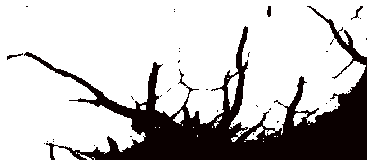

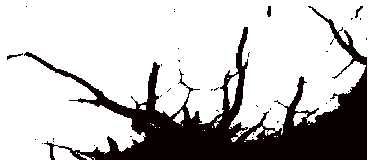

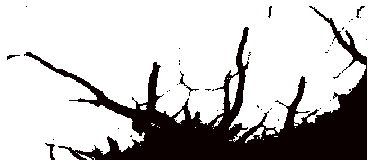

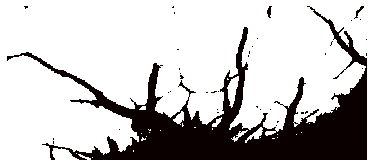

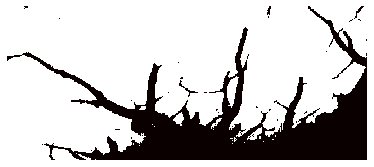

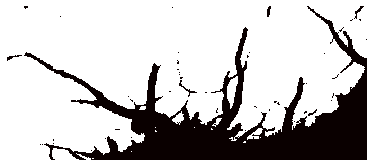

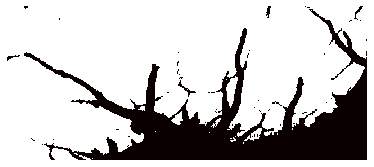

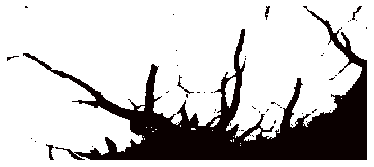

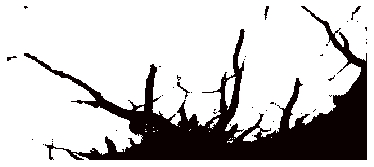

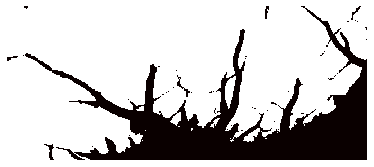

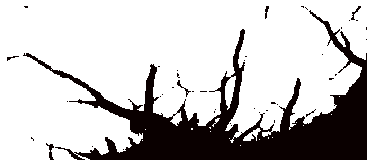

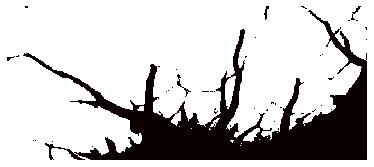

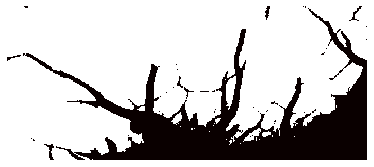

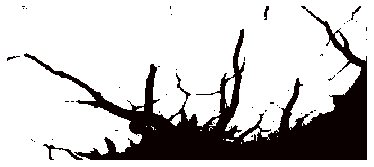

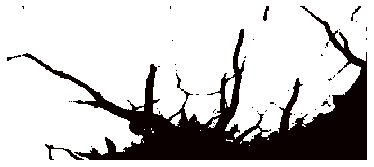

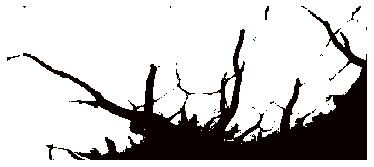

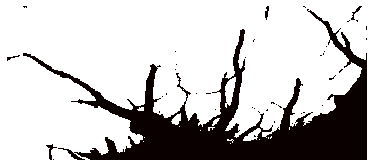

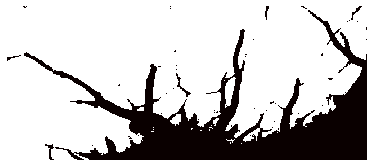

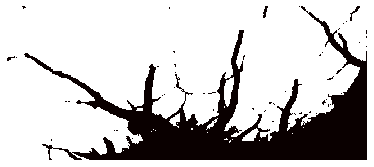

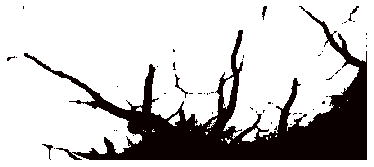

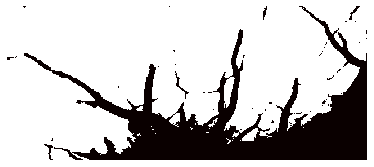

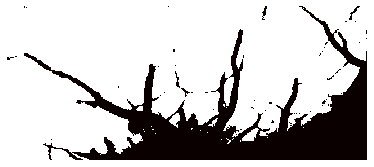

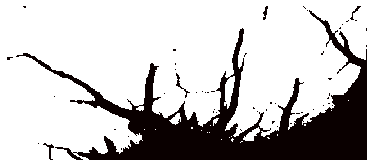

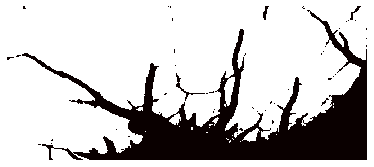

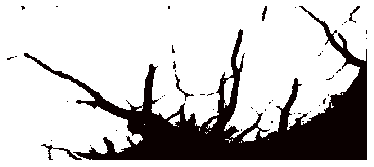

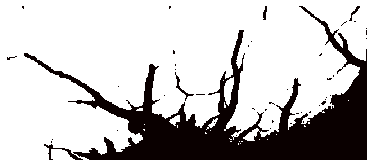

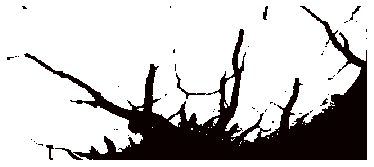

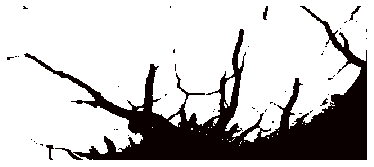

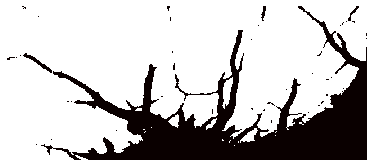

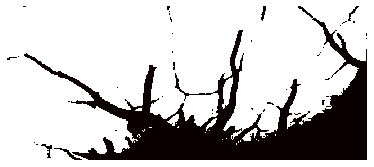

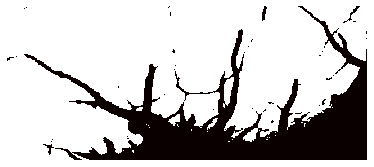

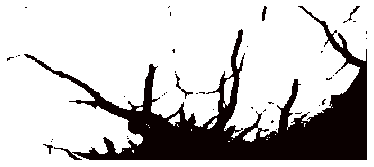

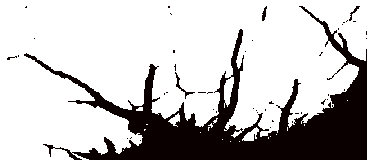

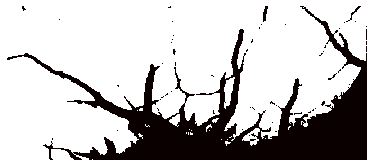

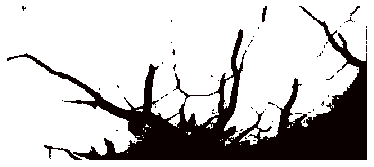

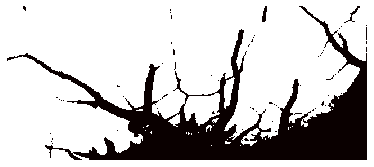

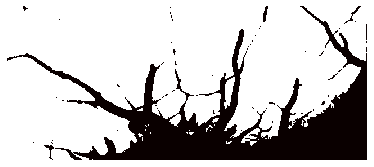

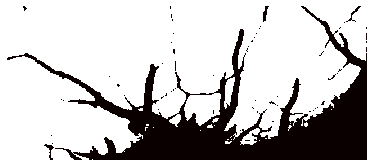

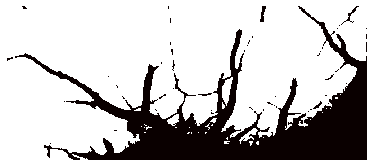

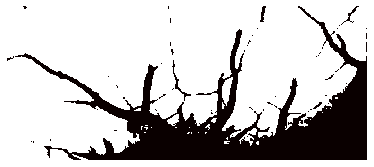

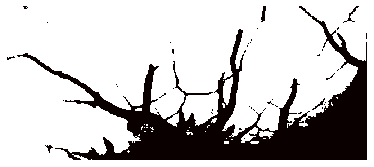

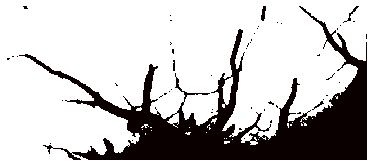

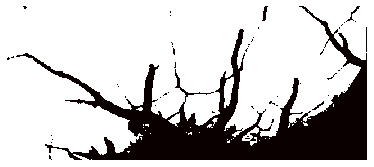

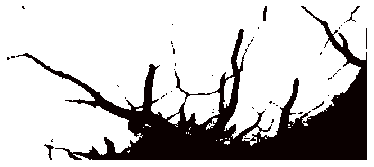

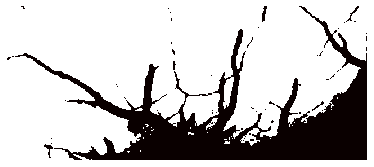

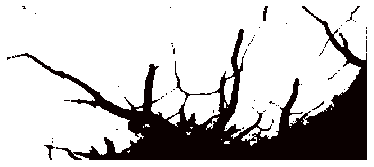

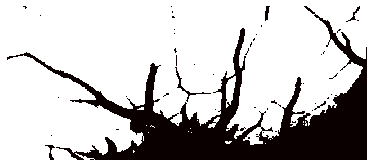

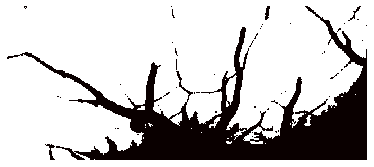

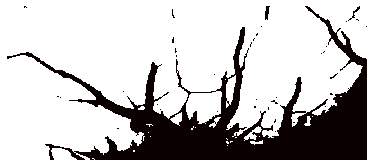

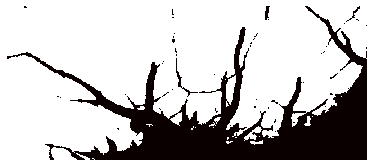

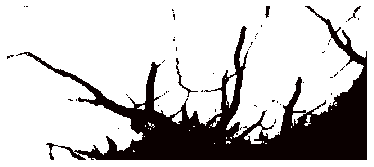

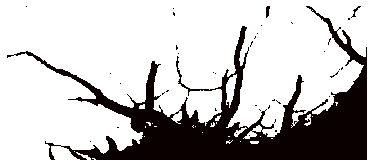

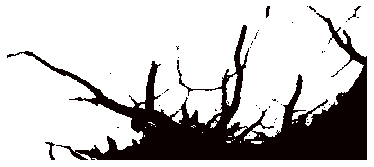

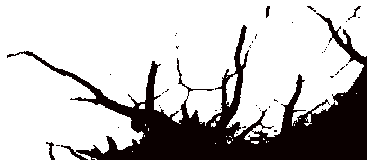

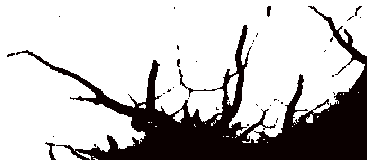

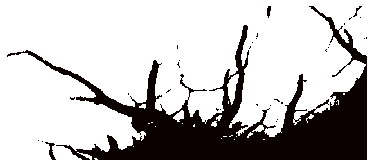

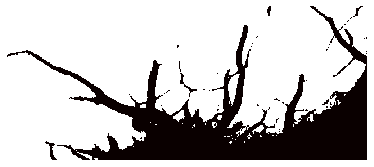

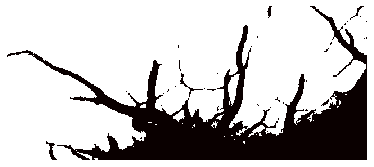

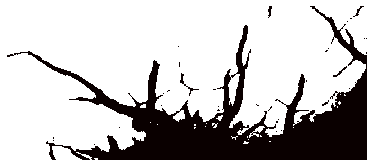

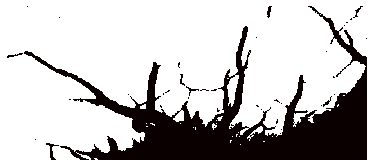

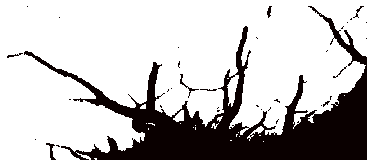

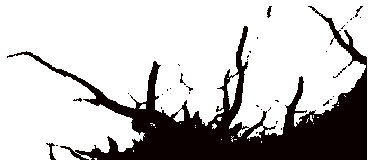

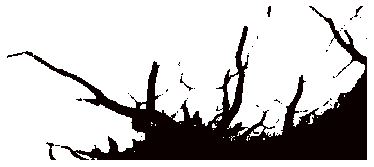

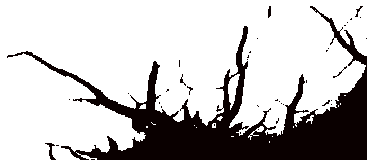

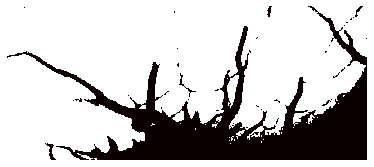

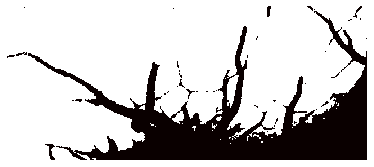

In [41]:
threshold_vessels(left_crops, 
                 "/home/andrew/Github/neuralink-bot/Image_Segmentation/segmented_images/left_crop/", 
                 "left_crop")

/home/andrew/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


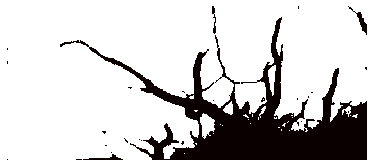

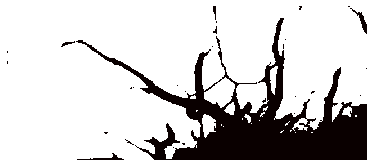

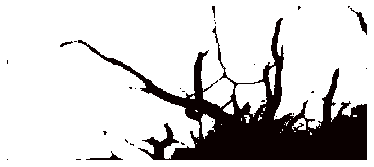

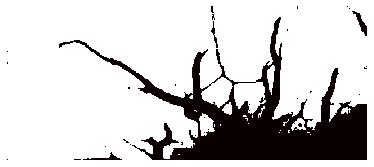

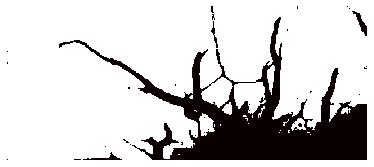

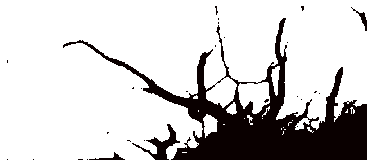

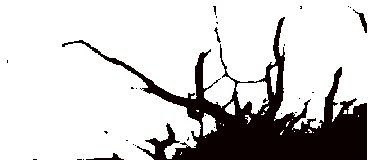

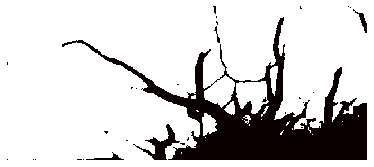

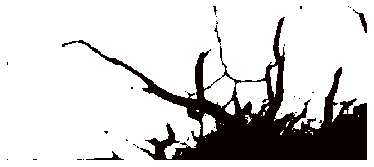

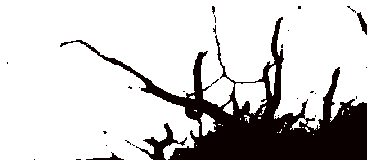

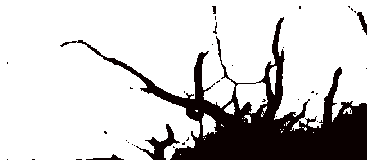

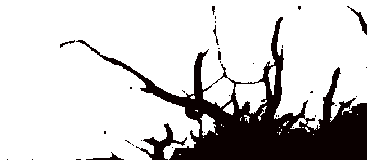

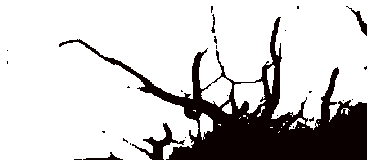

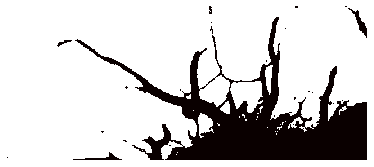

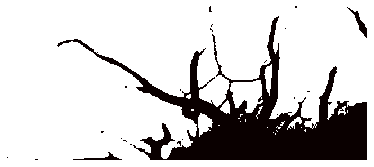

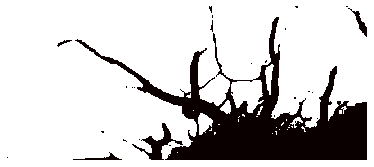

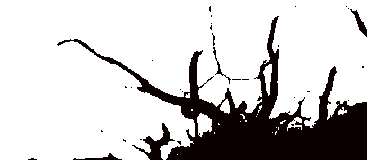

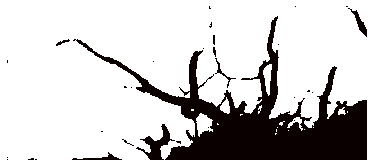

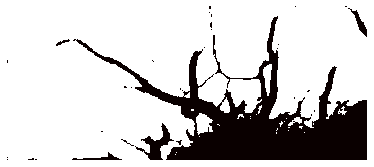

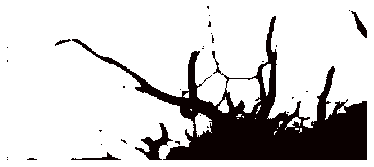

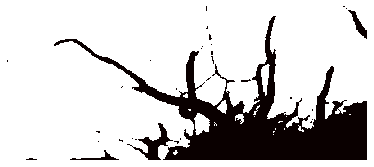

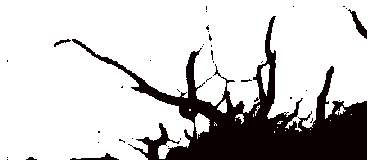

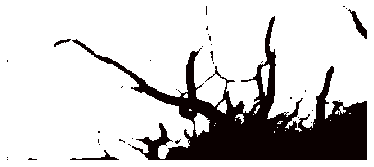

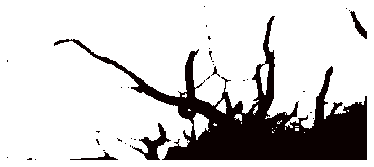

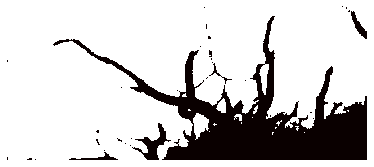

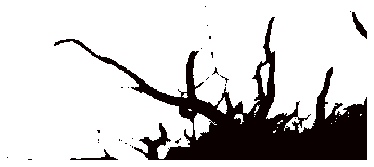

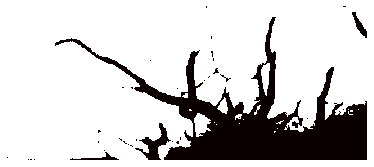

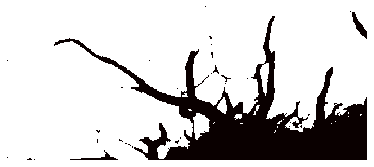

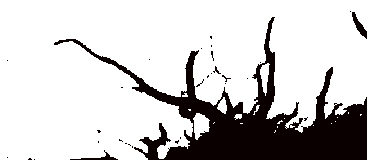

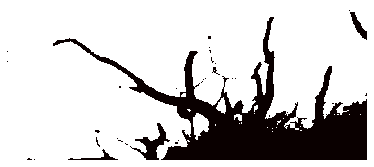

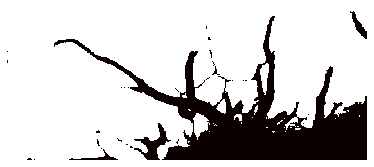

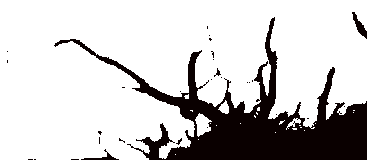

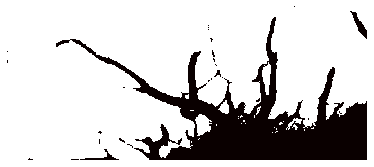

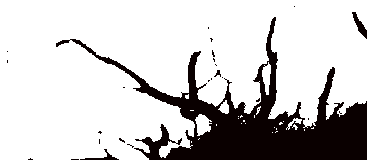

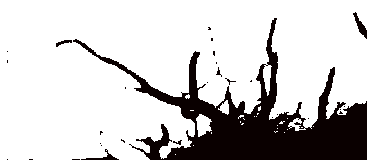

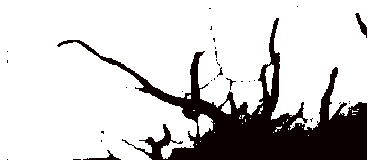

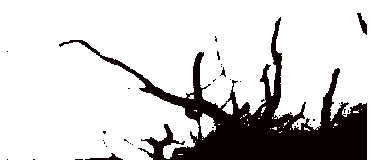

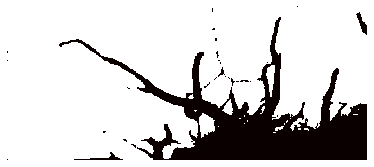

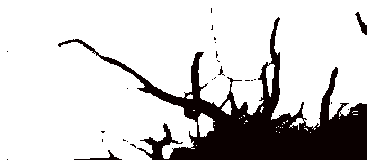

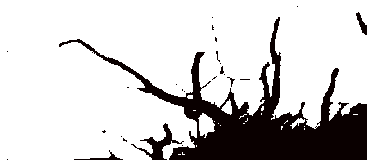

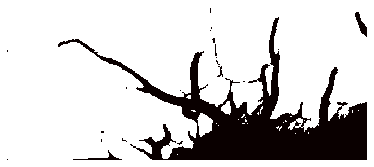

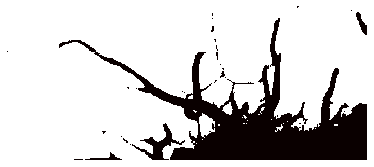

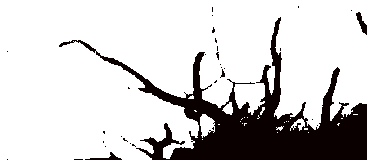

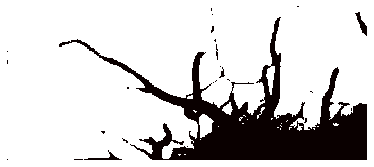

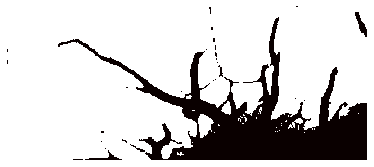

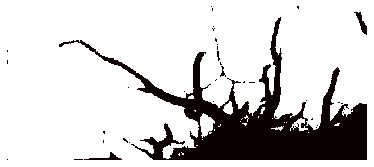

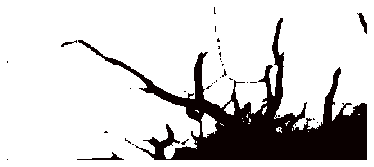

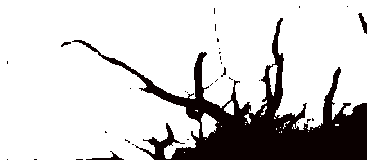

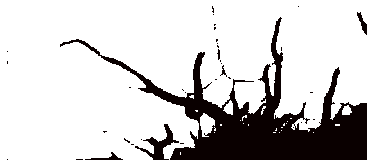

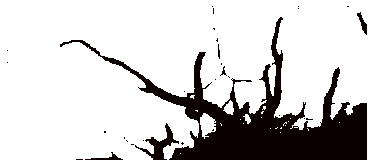

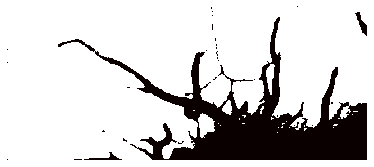

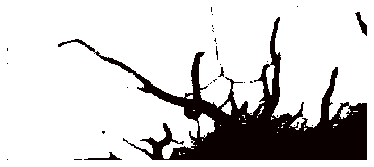

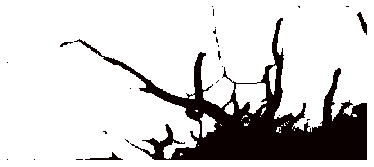

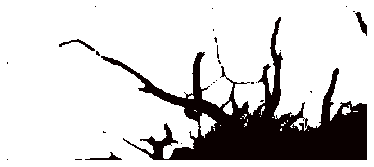

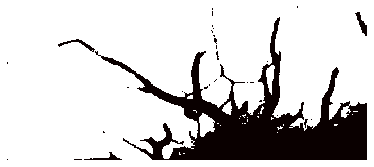

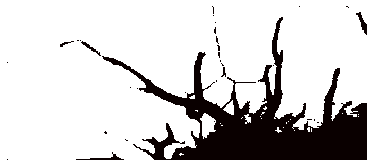

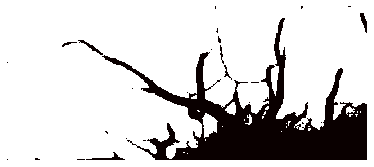

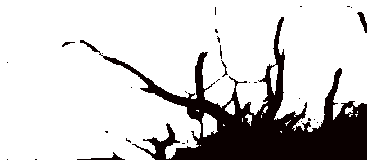

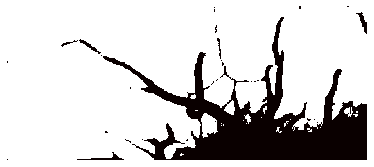

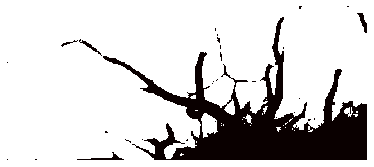

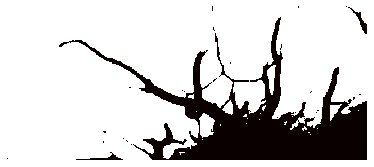

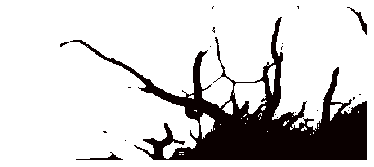

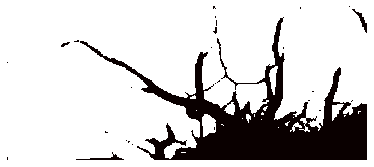

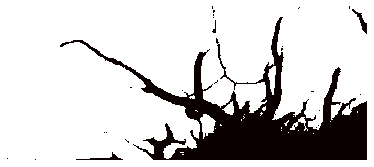

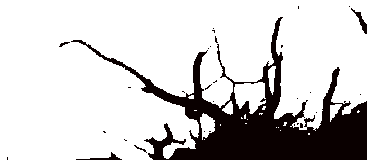

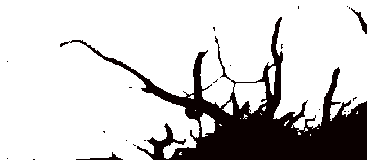

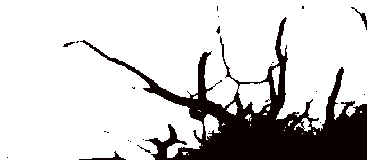

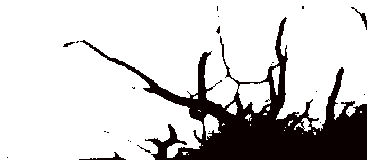

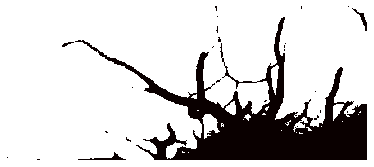

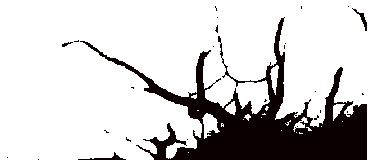

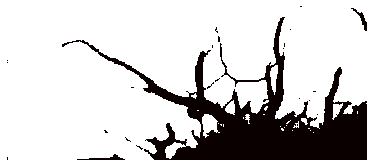

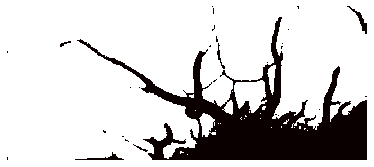

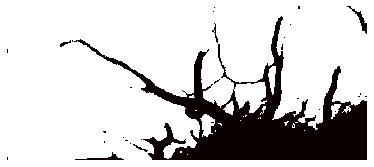

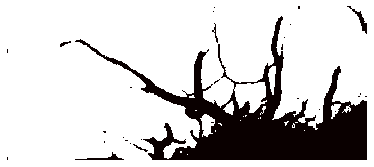

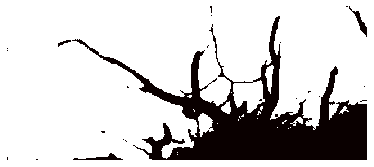

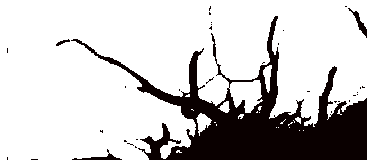

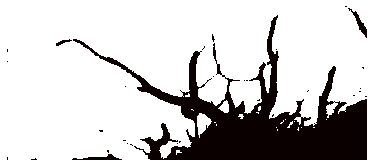

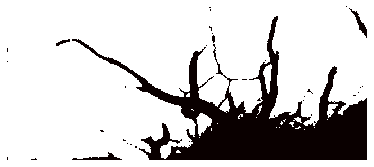

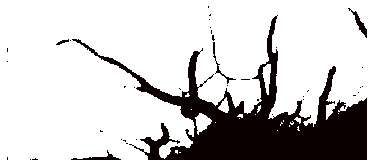

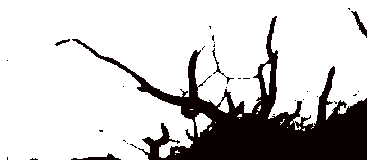

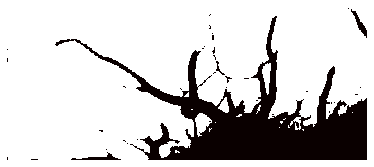

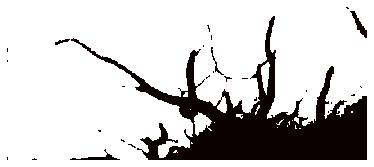

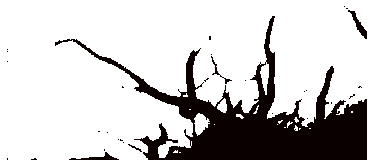

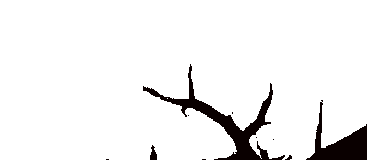

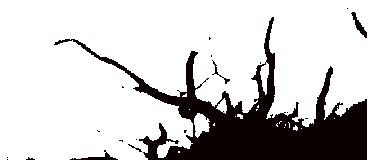

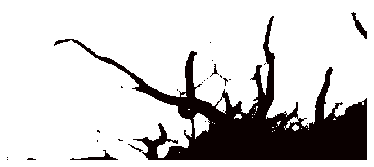

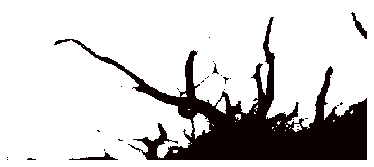

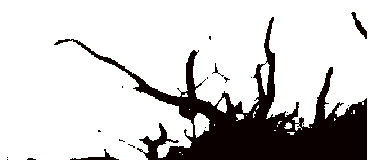

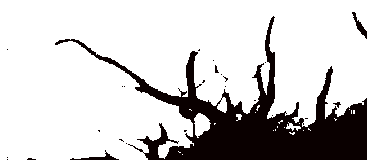

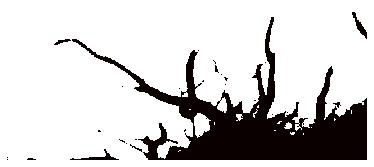

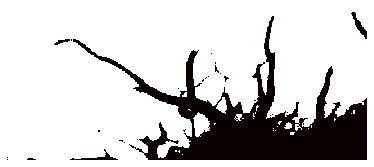

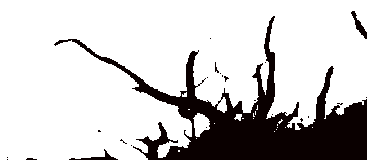

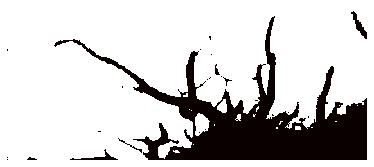

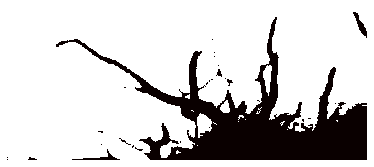

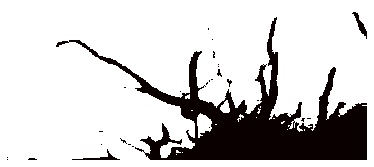

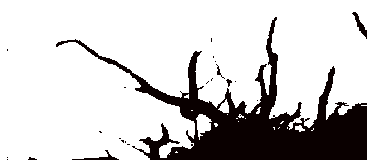

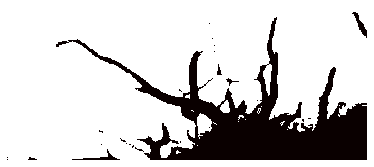

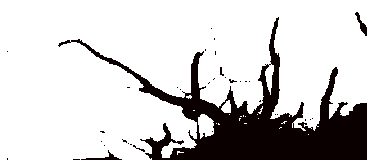

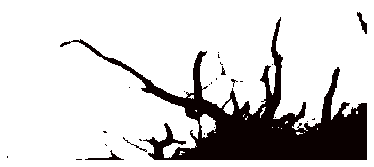

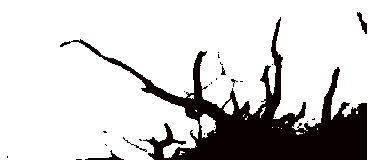

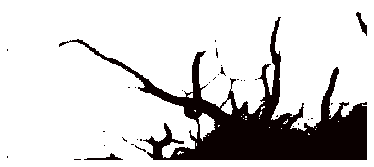

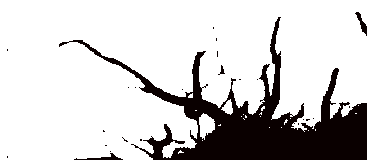

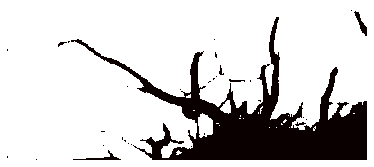

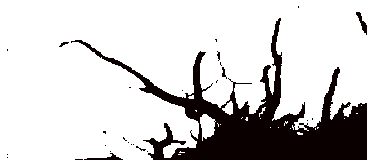

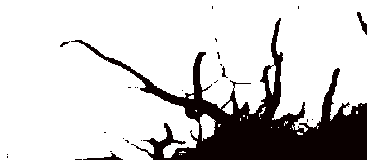

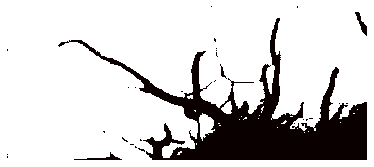

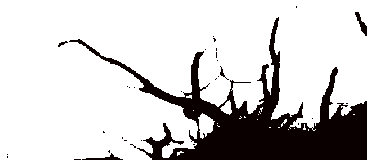

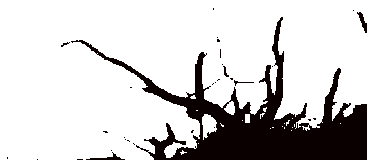

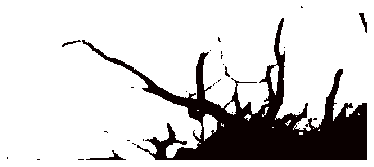

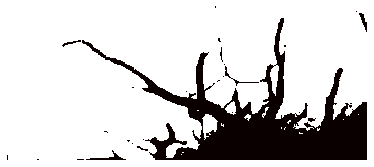

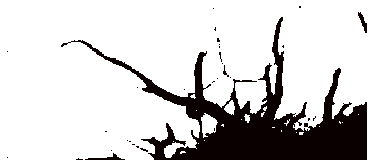

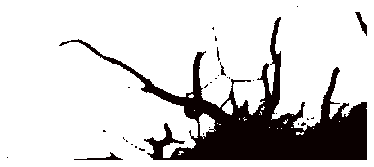

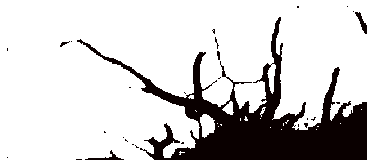

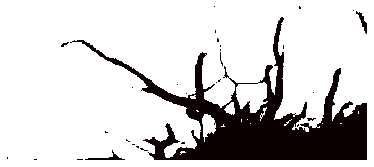

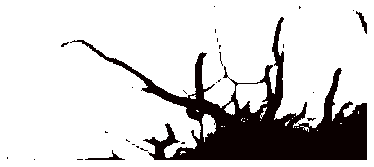

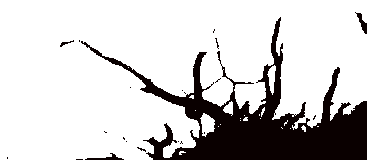

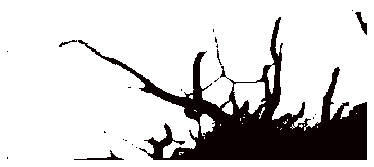

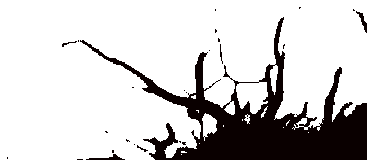

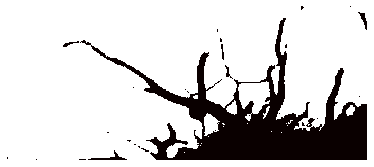

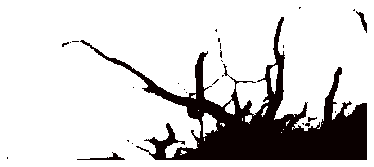

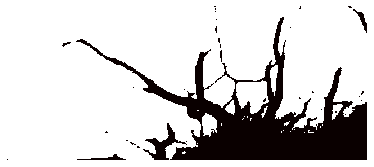

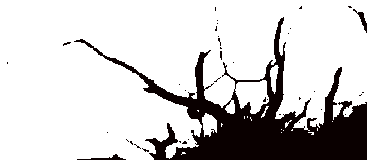

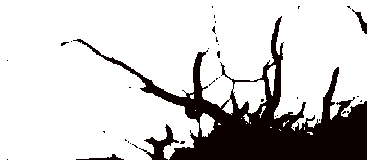

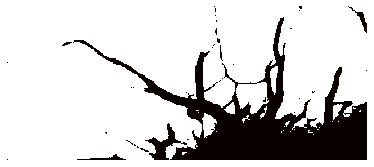

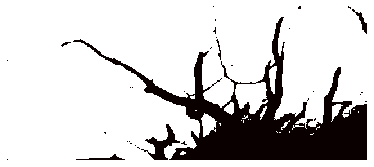

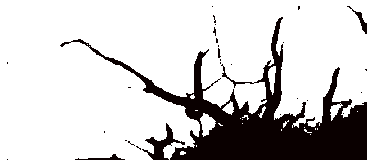

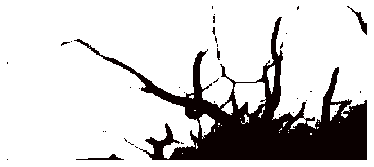

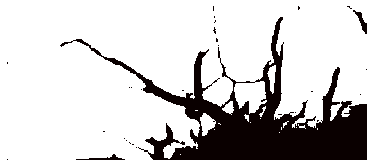

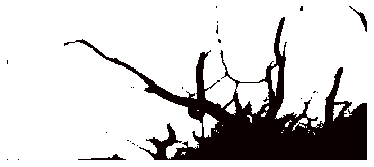

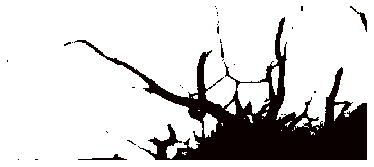

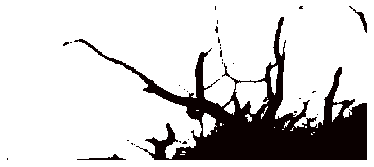

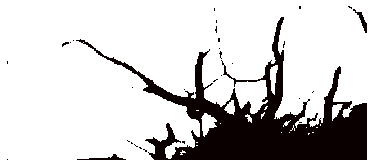

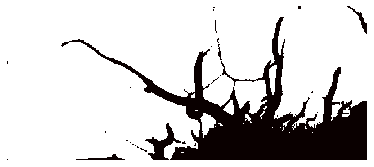

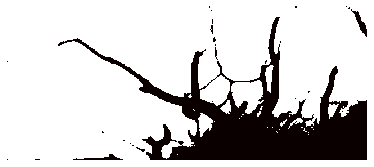

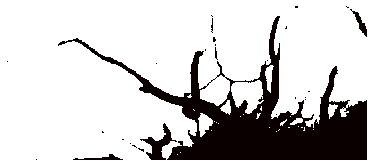

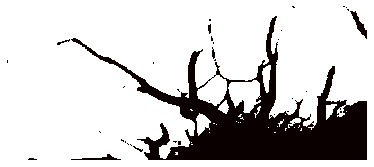

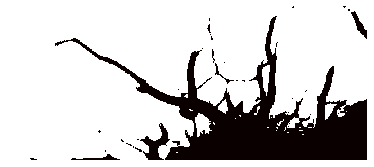

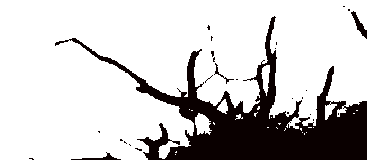

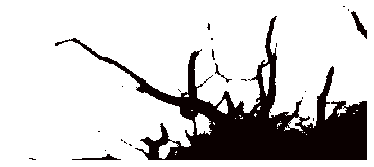

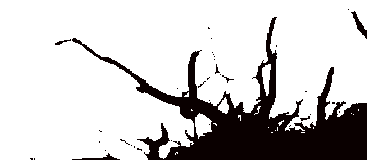

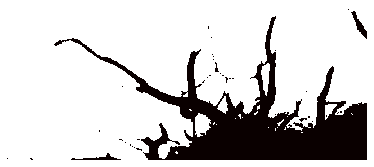

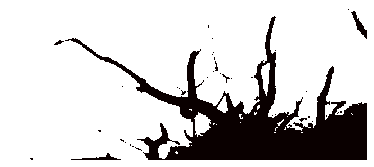

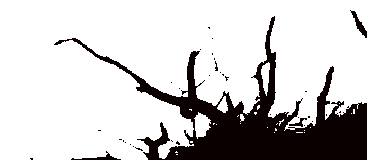

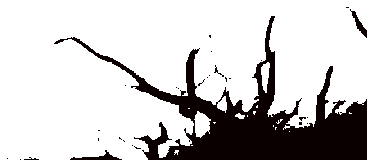

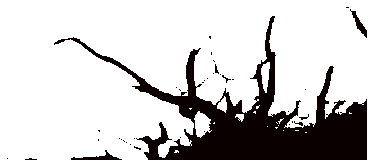

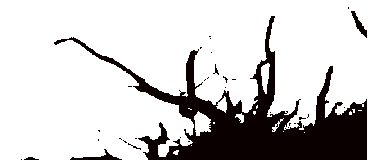

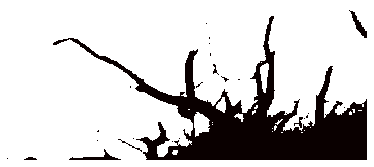

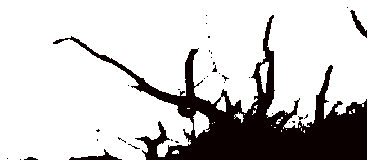

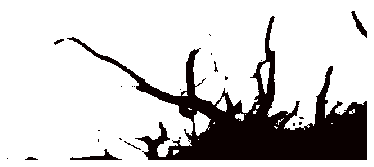

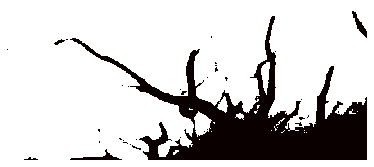

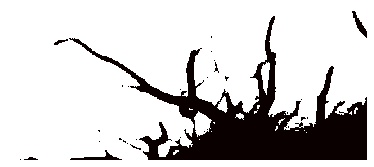

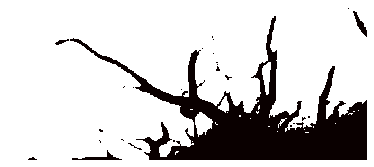

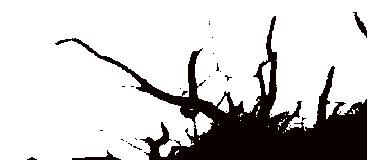

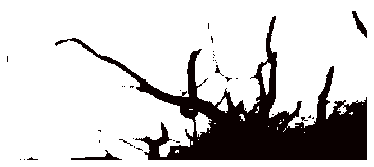

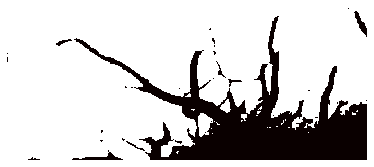

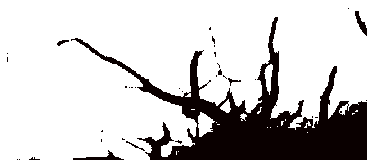

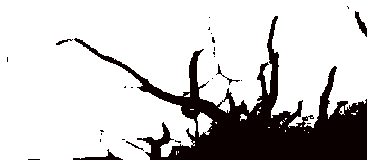

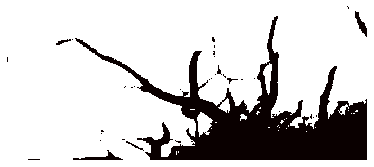

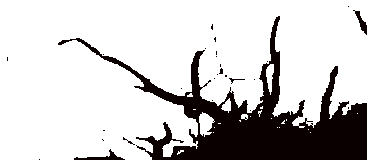

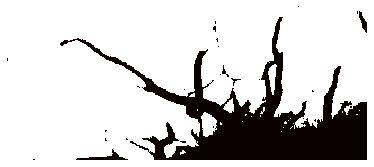

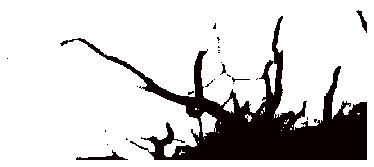

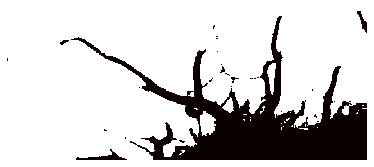

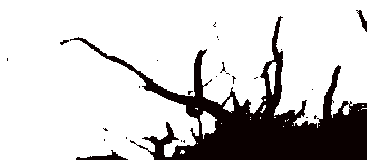

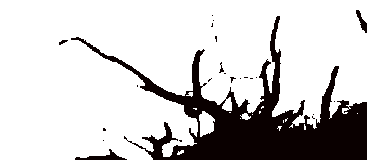

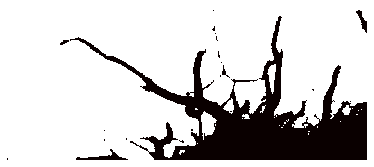

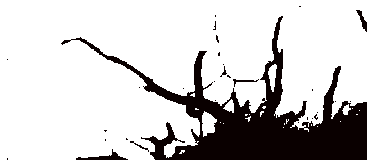

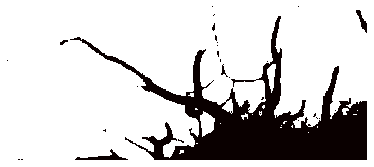

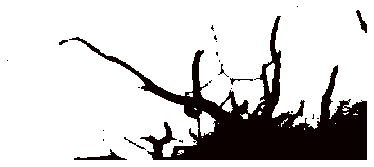

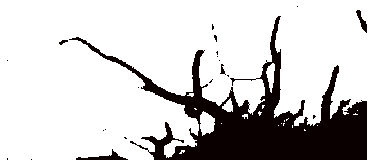

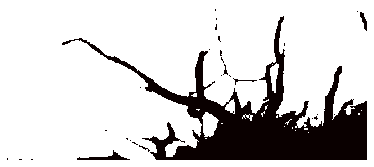

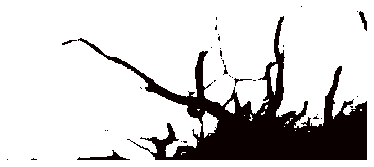

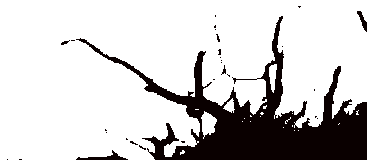

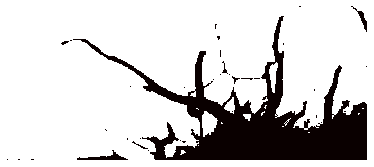

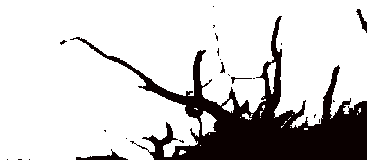

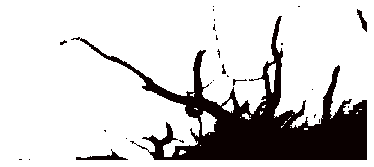

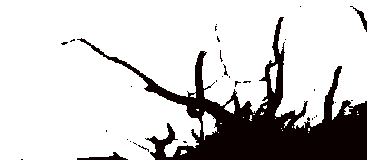

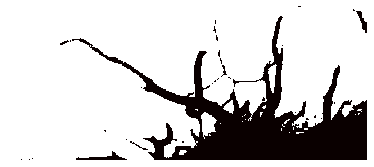

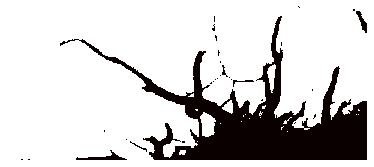

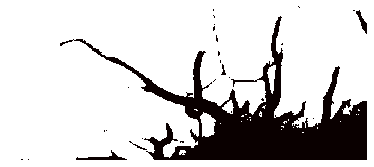

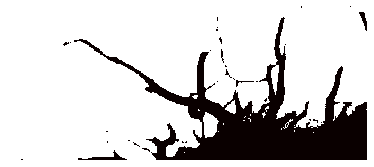

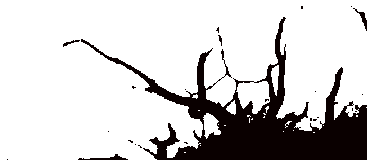

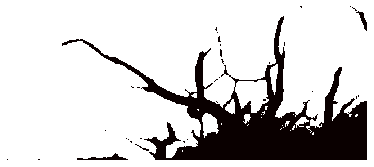

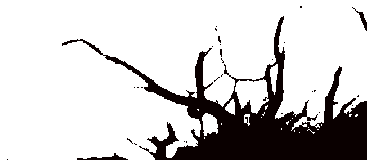

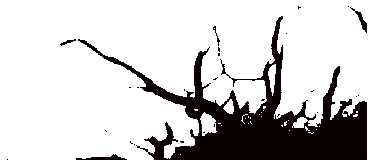

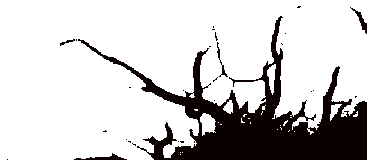

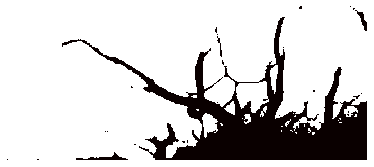

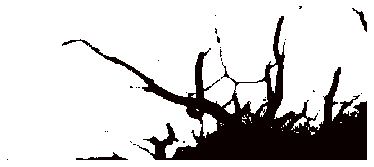

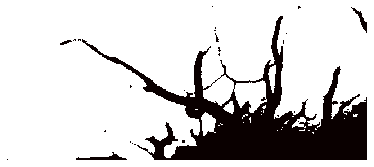

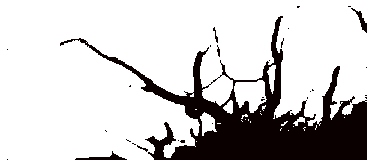

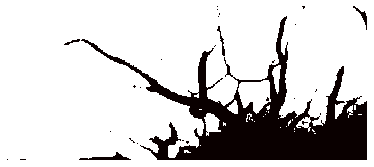

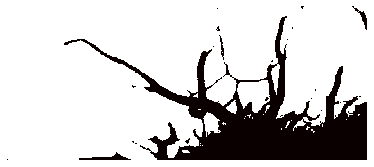

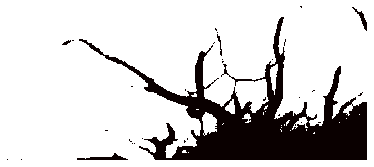

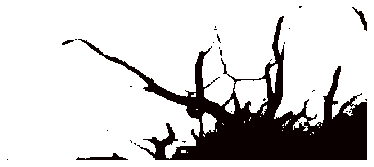

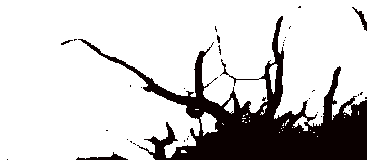

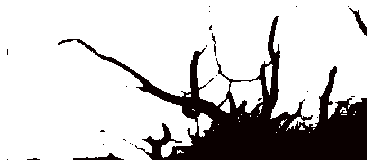

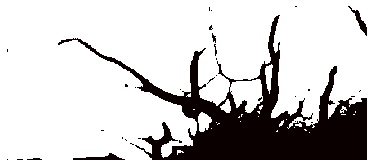

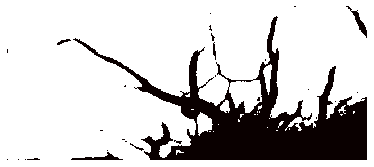

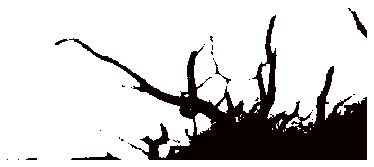

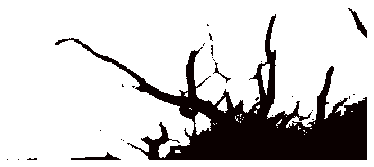

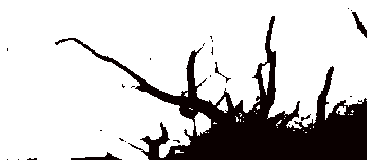

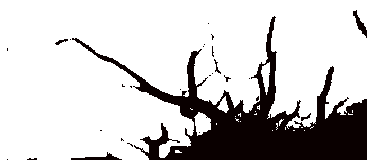

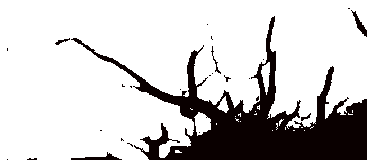

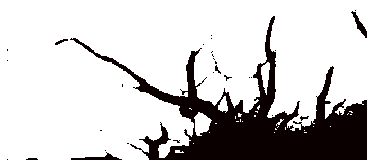

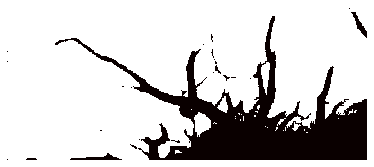

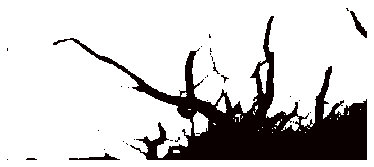

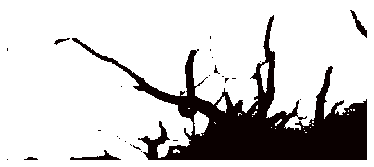

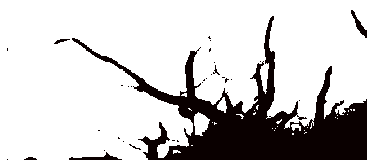

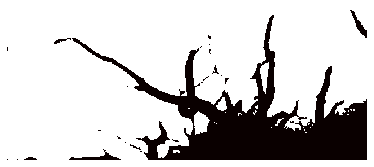

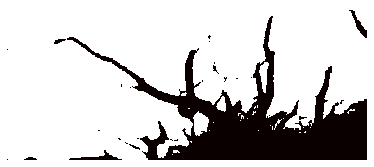

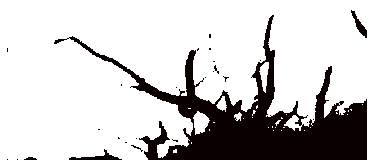

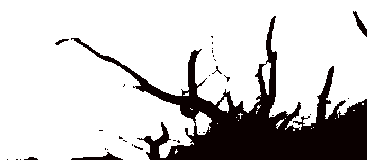

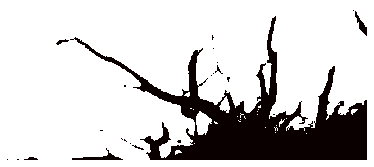

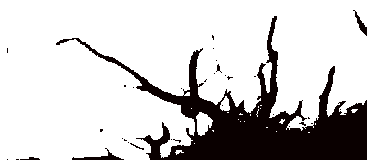

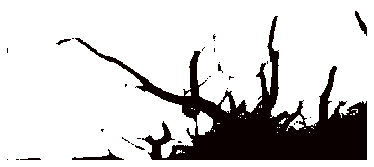

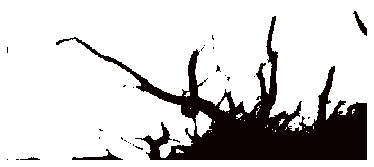

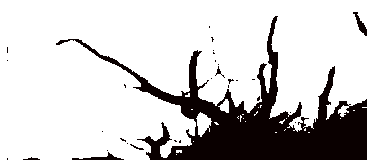

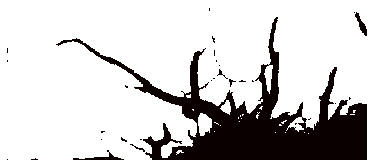

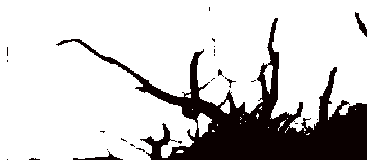

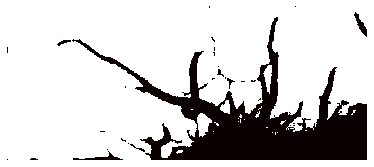

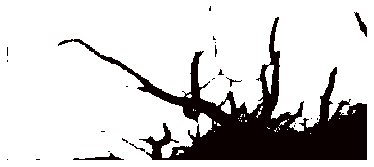

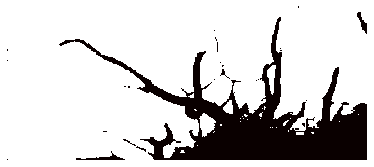

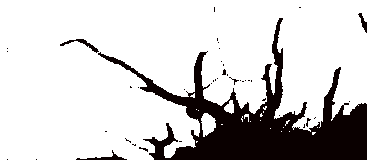

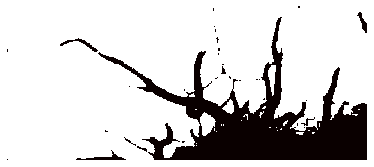

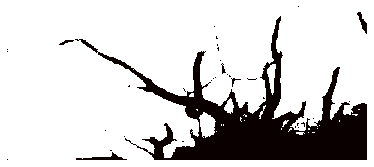

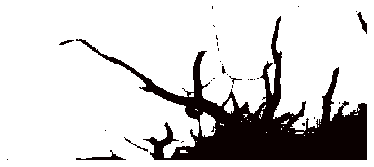

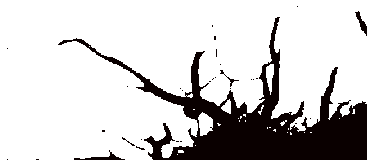

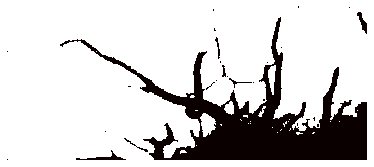

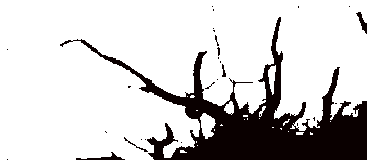

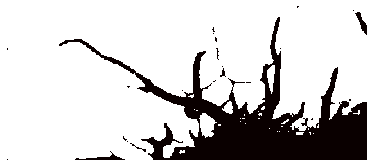

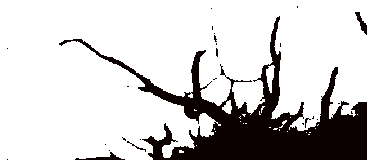

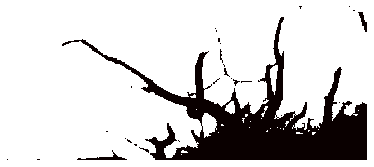

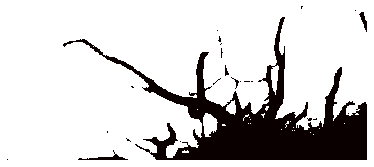

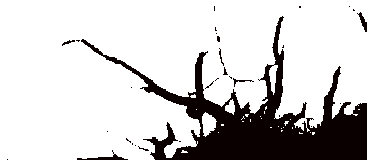

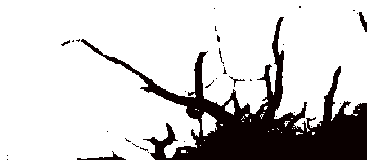

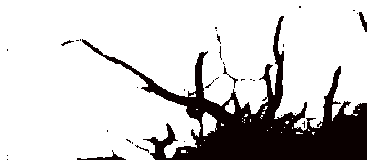

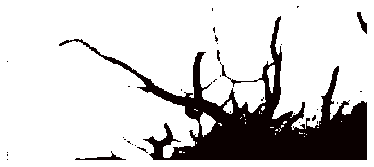

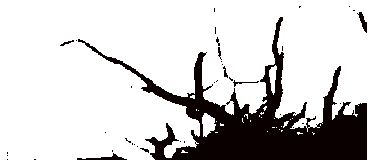

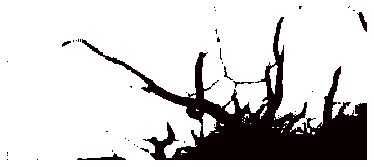

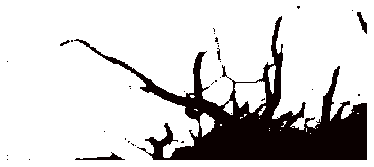

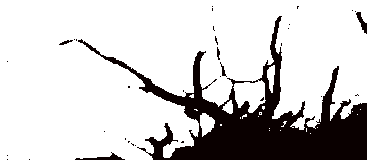

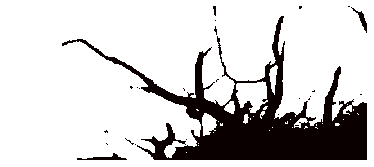

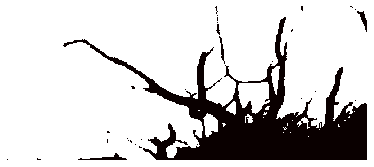

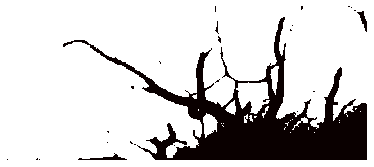

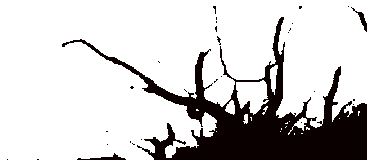

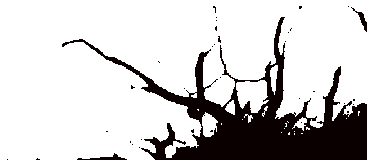

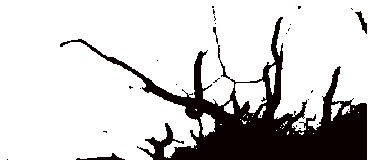

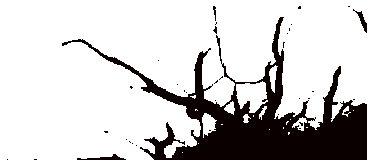

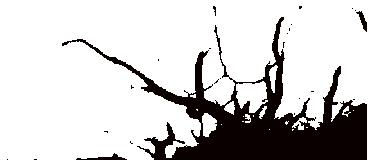

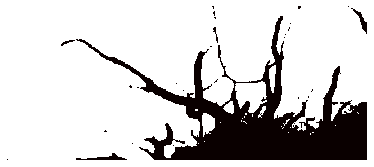

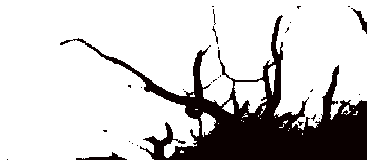

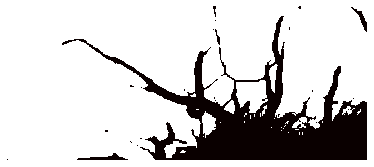

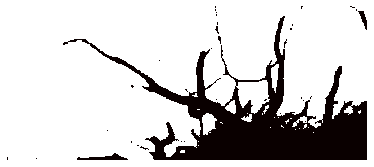

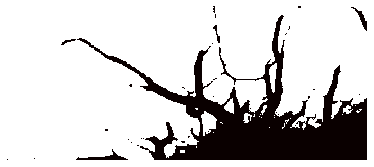

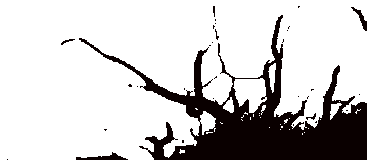

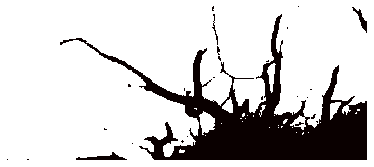

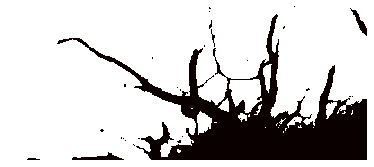

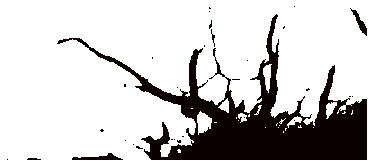

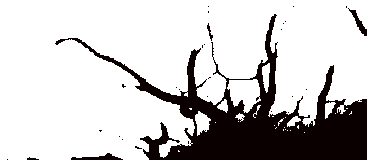

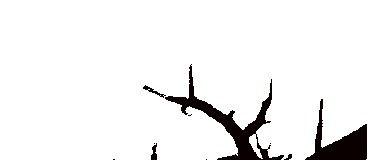

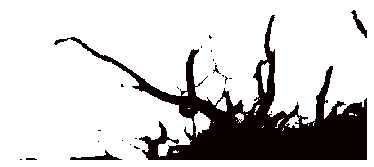

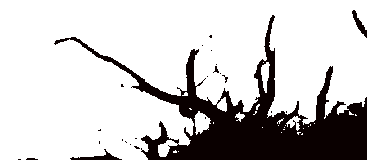

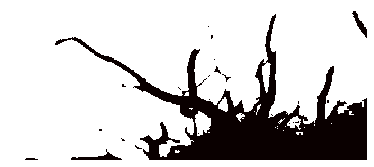

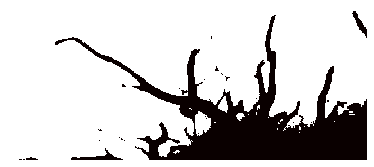

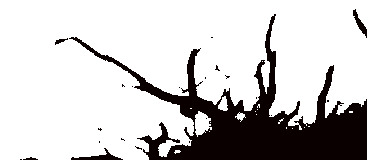

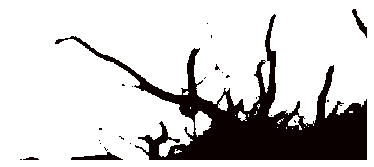

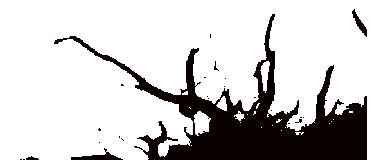

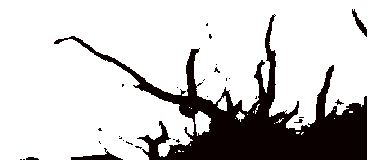

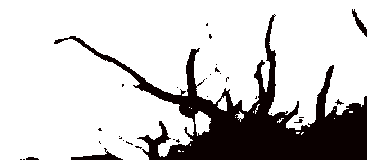

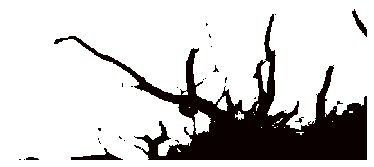

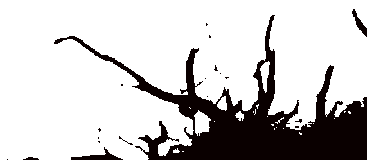

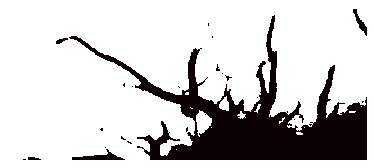

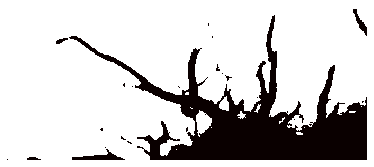

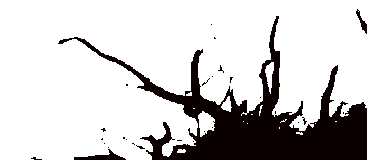

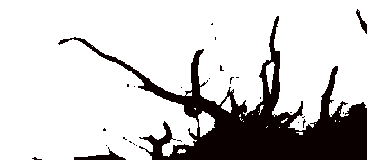

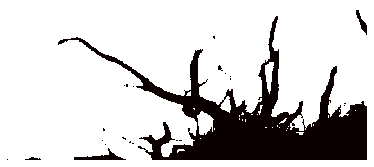

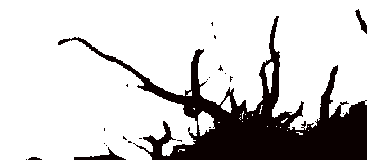

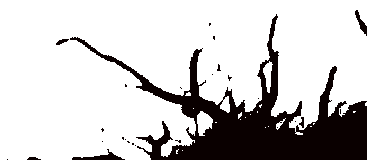

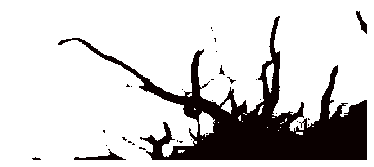

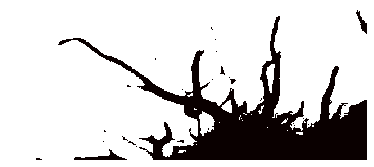

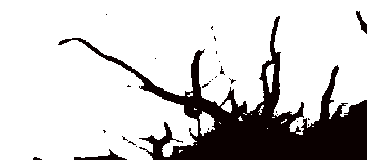

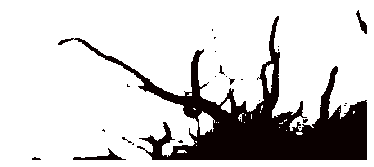

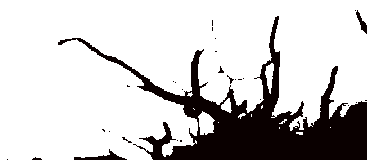

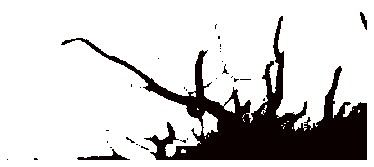

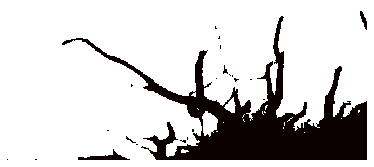

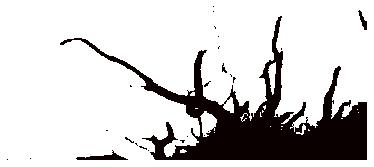

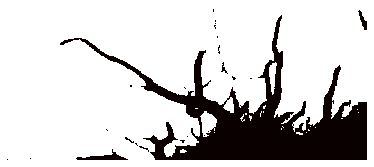

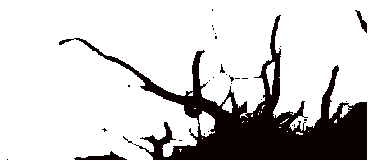

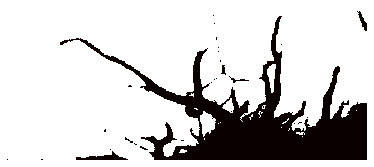

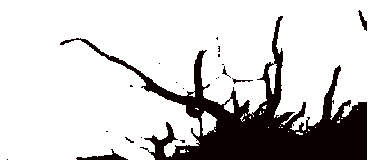

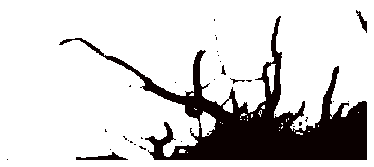

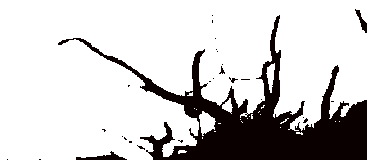

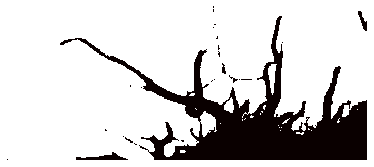

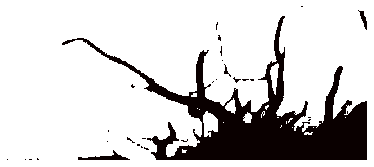

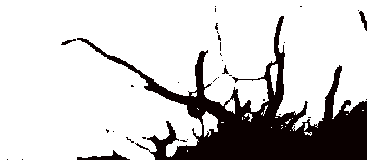

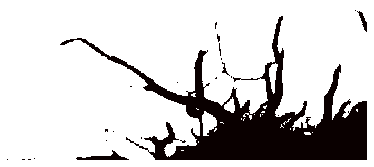

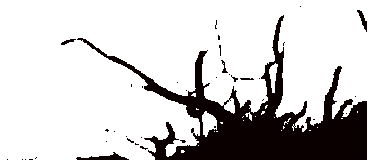

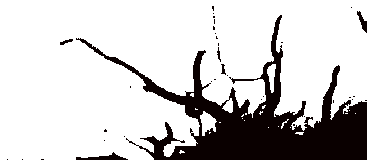

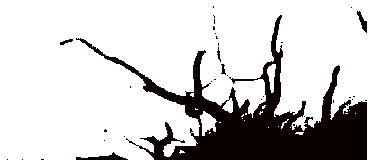

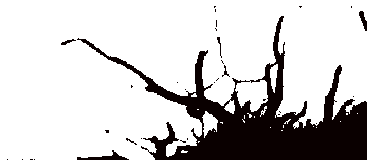

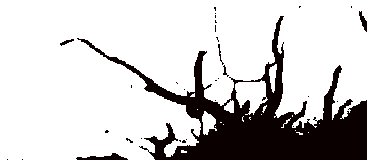

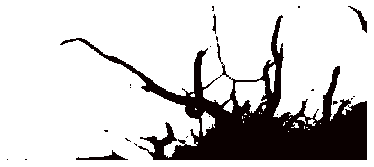

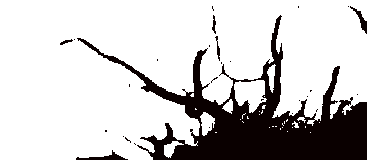

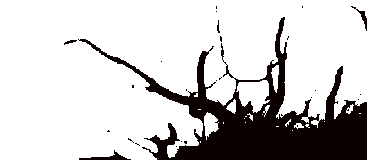

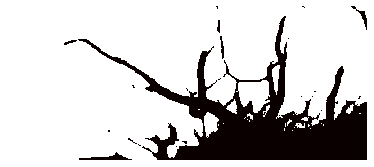

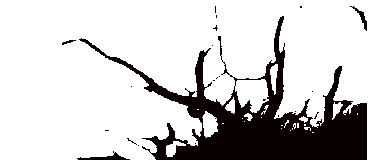

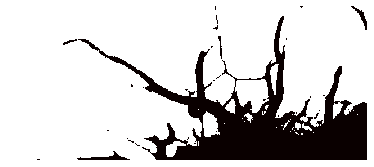

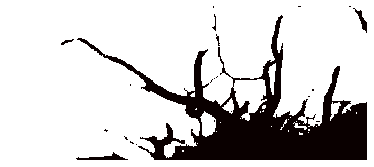

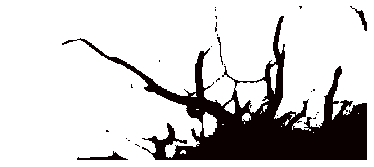

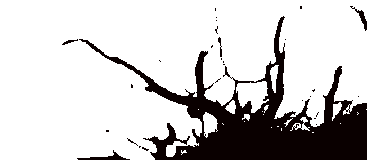

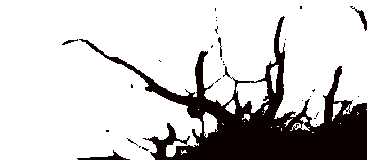

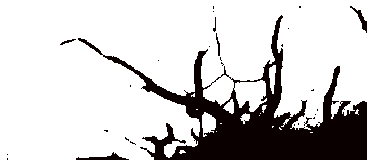

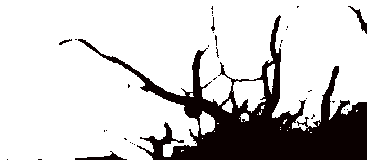

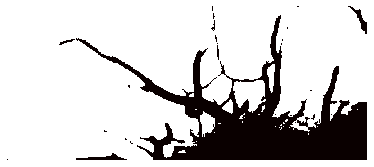

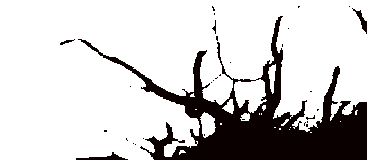

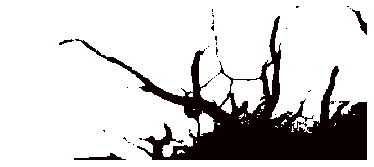

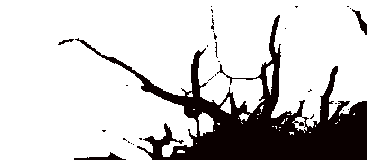

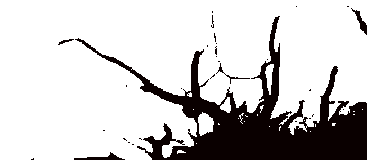

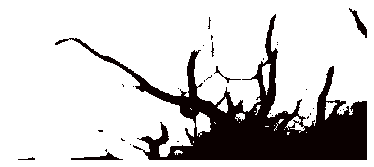

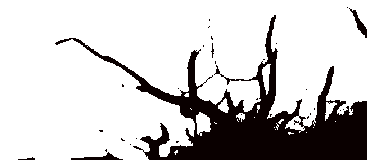

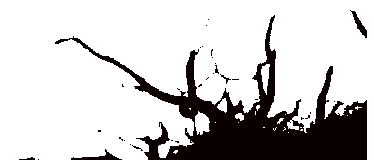

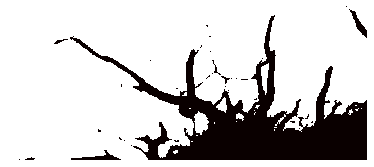

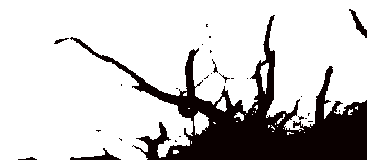

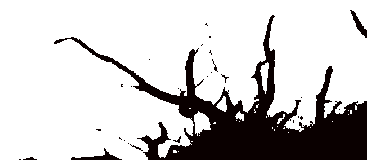

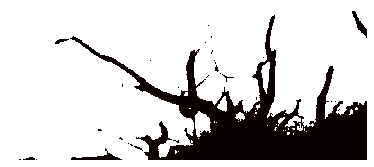

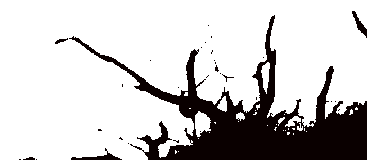

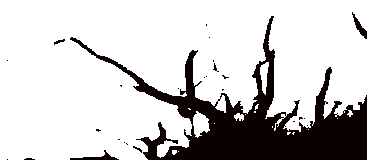

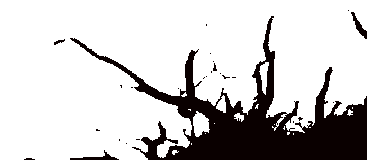

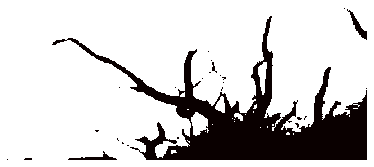

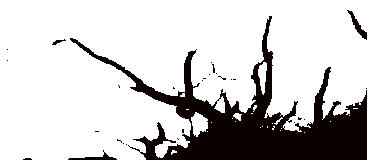

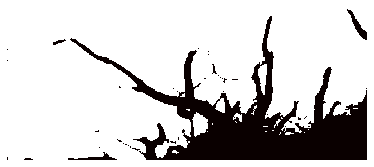

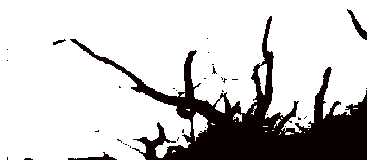

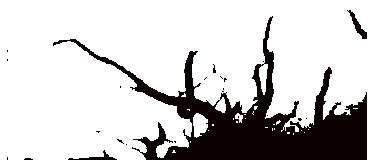

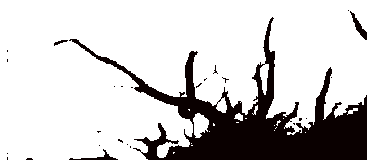

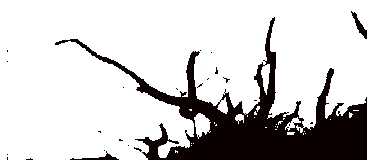

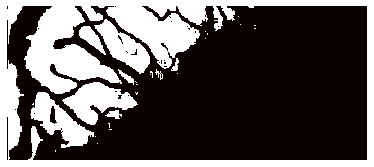

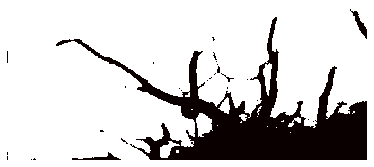

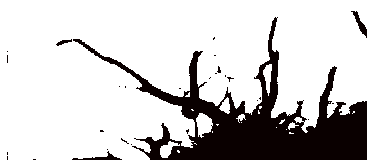

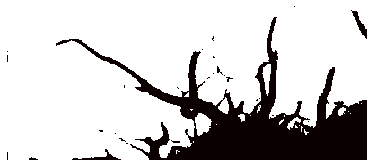

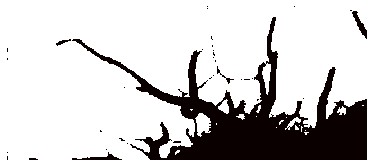

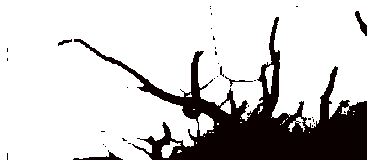

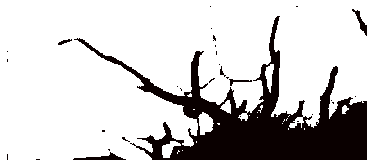

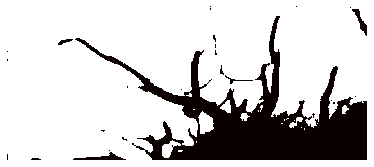

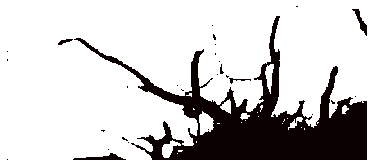

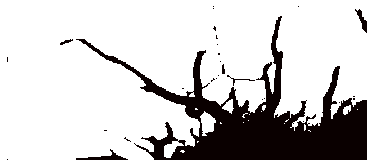

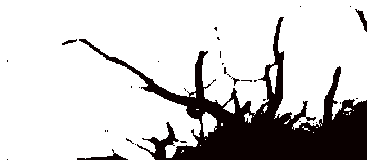

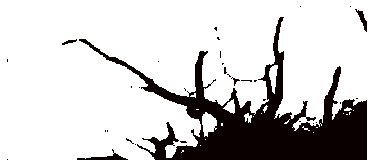

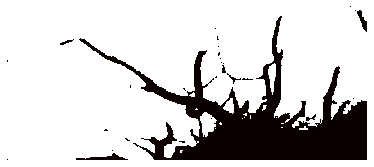

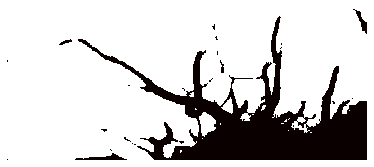

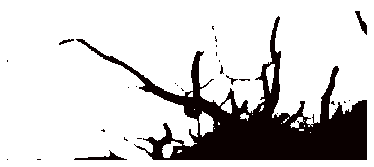

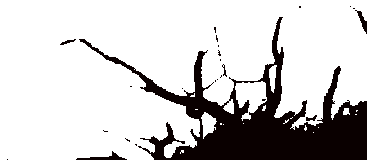

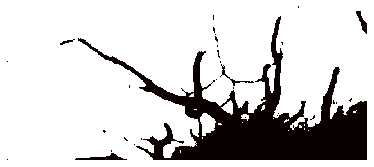

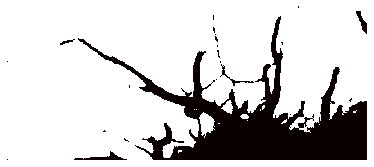

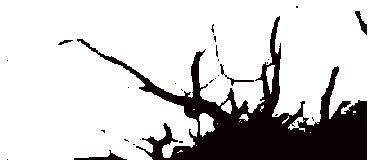

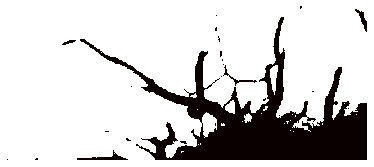

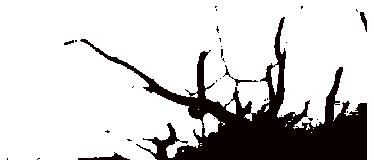

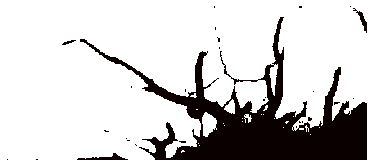

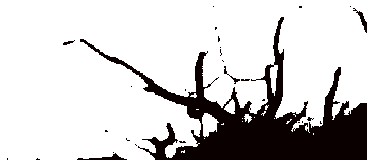

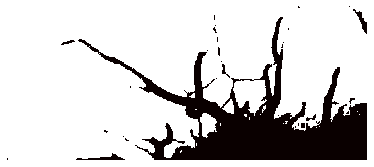

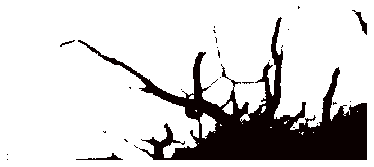

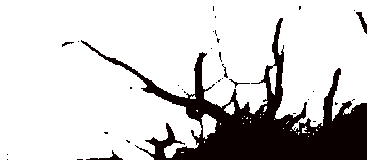

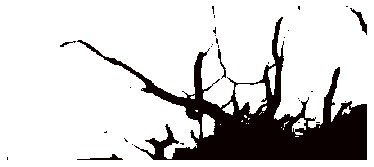

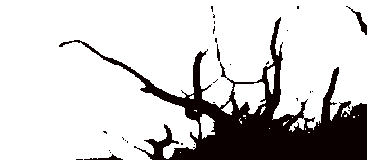

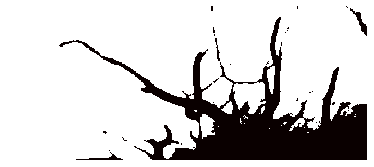

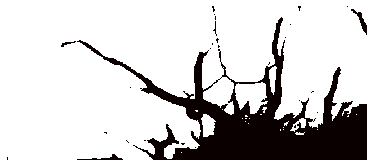

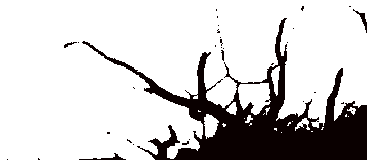

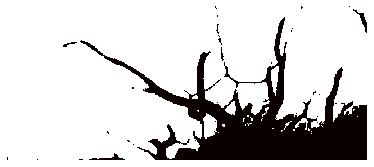

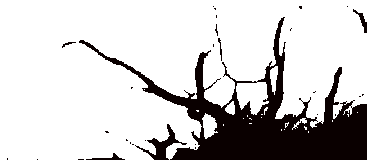

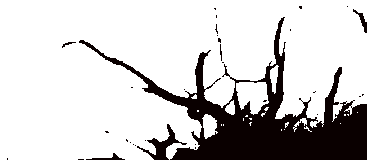

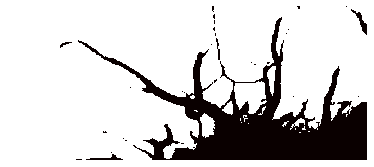

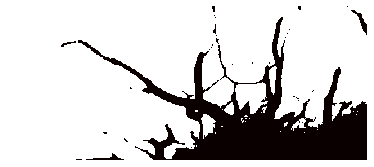

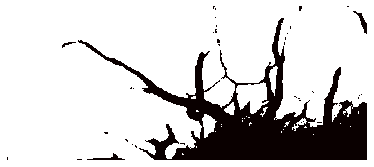

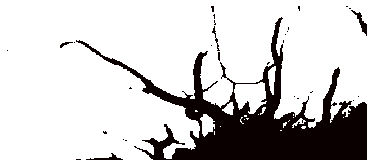

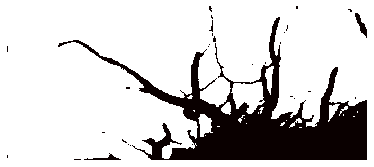

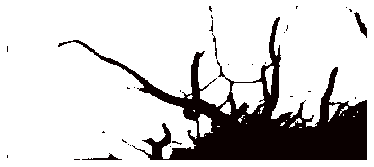

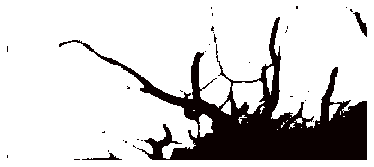

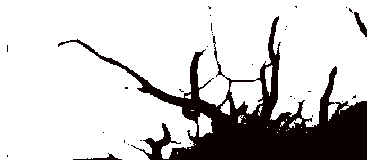

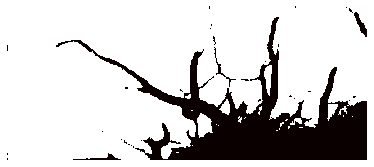

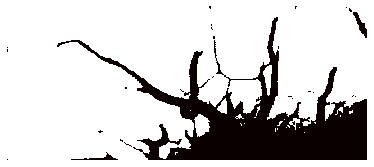

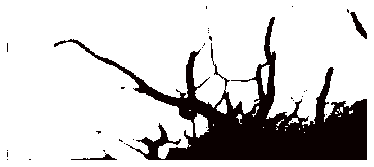

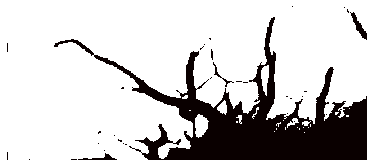

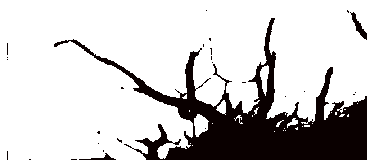

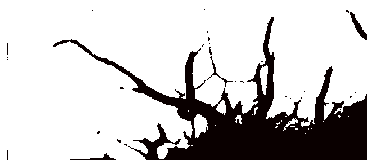

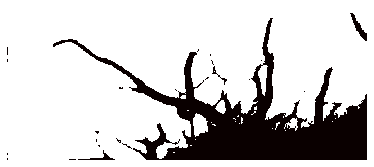

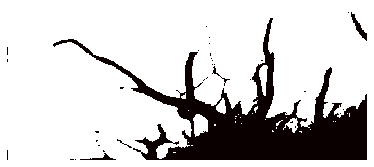

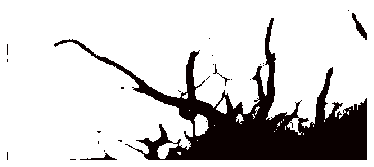

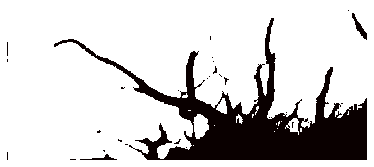

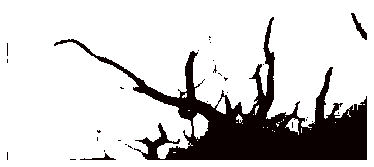

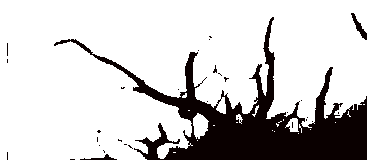

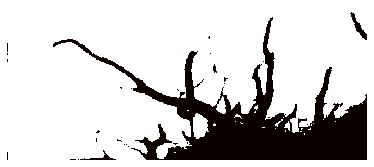

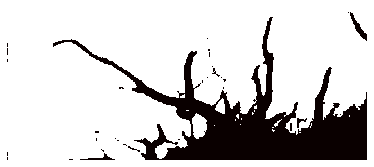

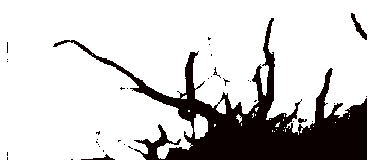

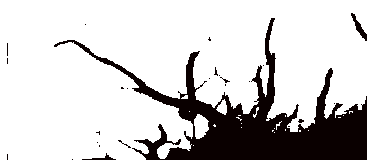

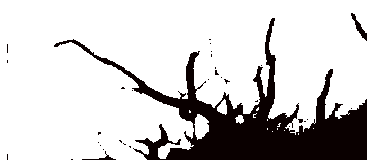

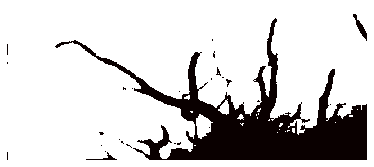

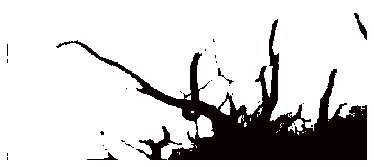

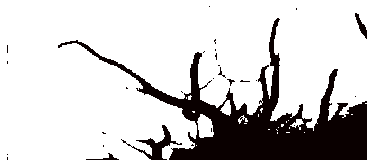

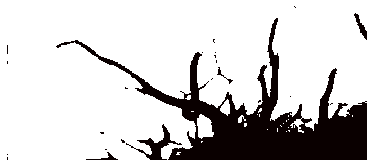

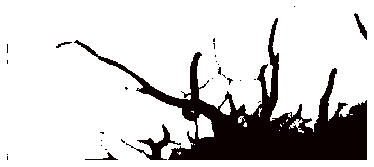

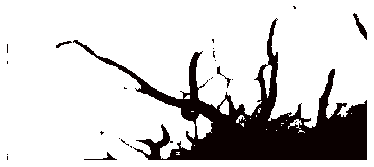

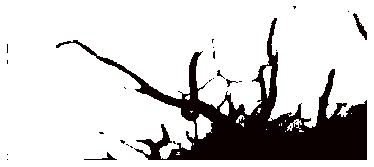

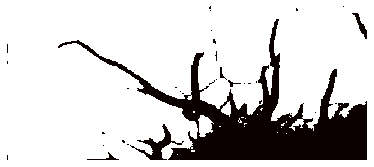

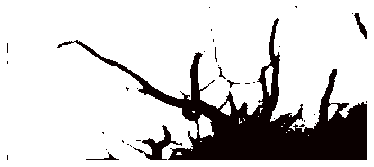

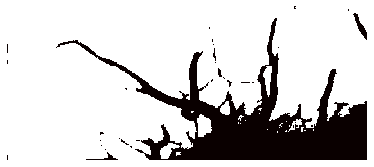

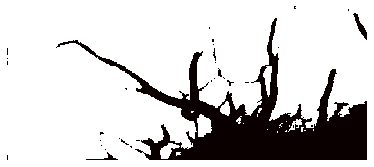

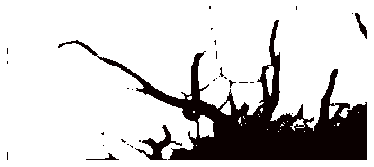

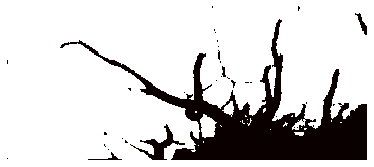

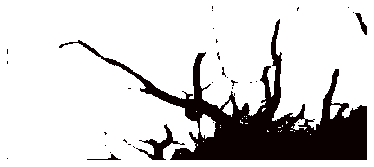

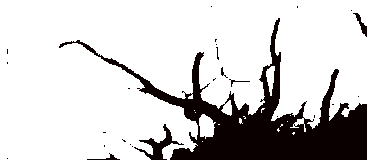

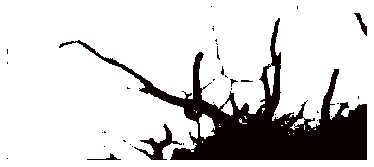

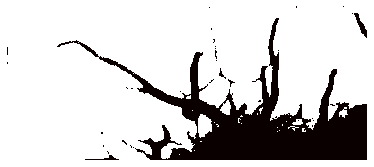

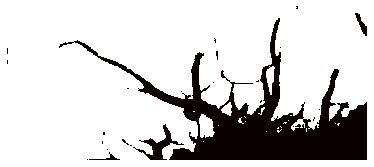

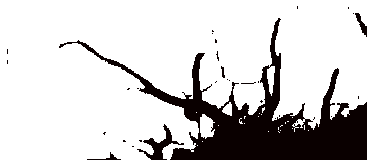

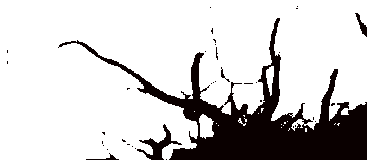

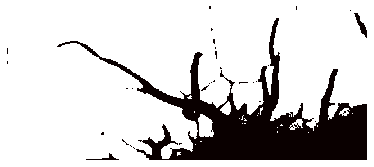

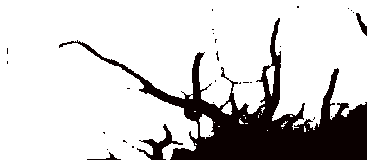

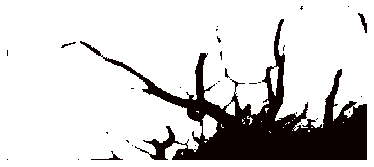

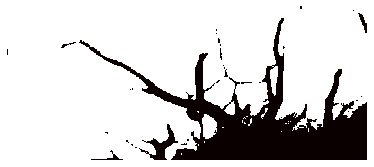

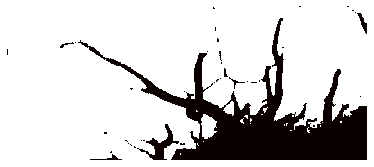

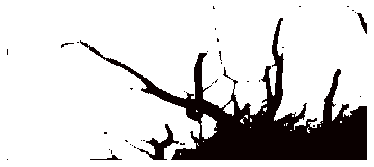

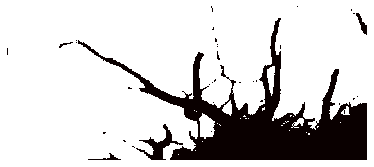

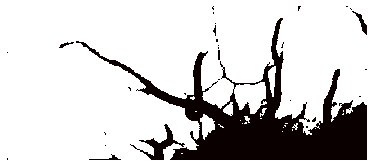

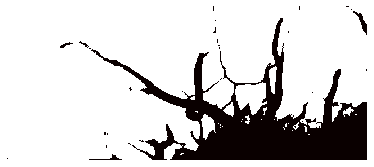

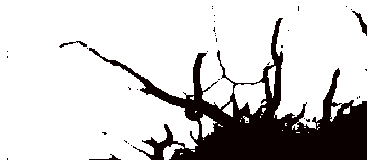

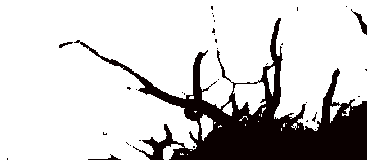

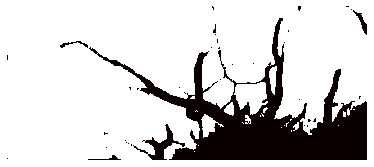

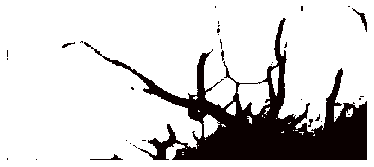

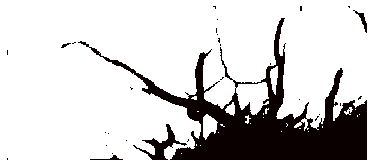

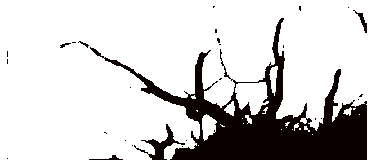

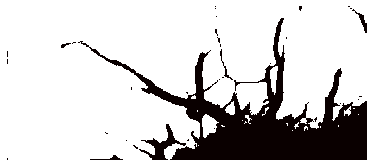

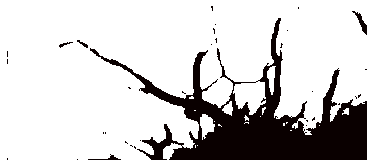

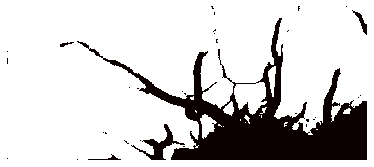

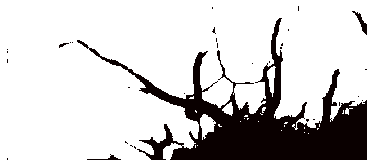

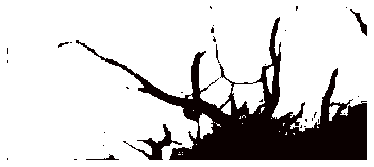

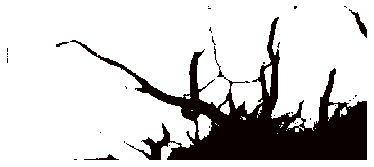

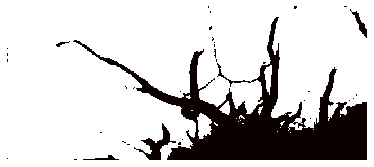

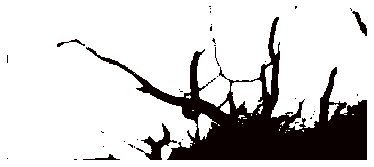

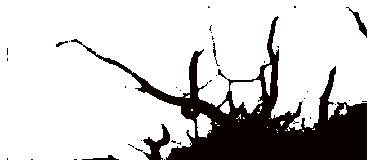

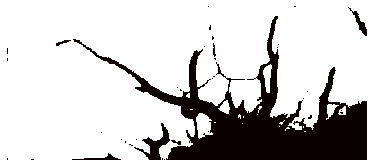

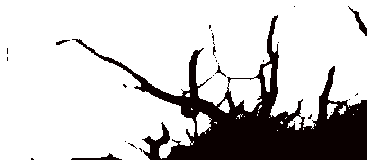

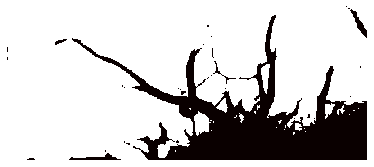

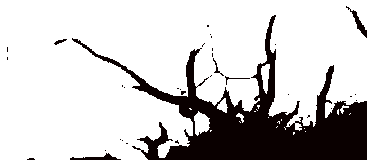

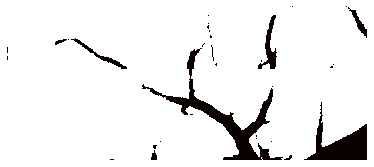

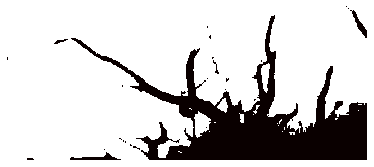

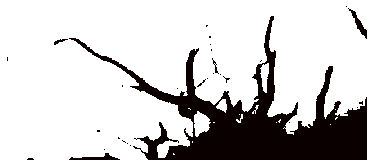

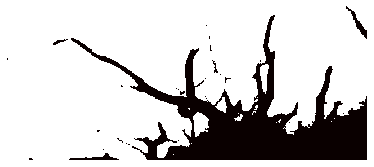

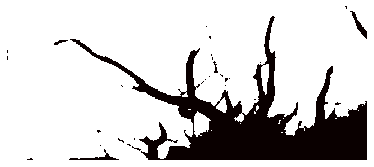

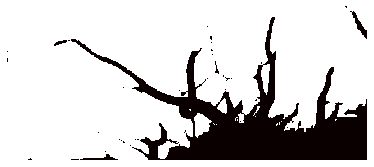

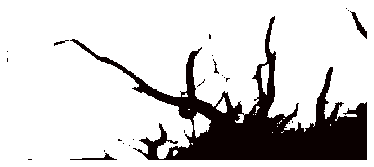

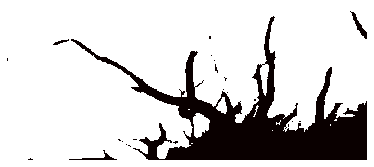

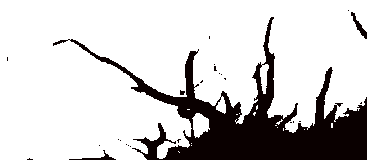

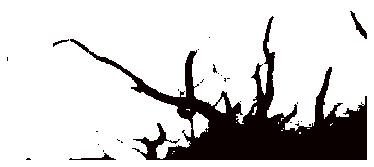

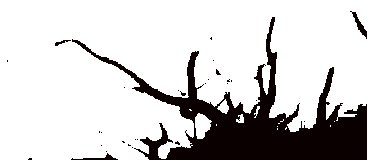

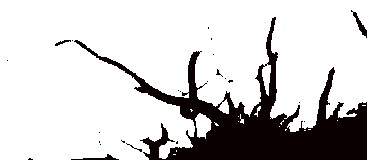

In [42]:
threshold_vessels(right_crops, 
                 "/home/andrew/Github/neuralink-bot/Image_Segmentation/segmented_images/right_crop/", 
                 "right_crop")

# 4.) Re-Animate cropped, & segmented images into GIFS

### Top

In [43]:
top_segs = order_files_by_date(
    "/home/andrew/Github/neuralink-bot/Image_Segmentation/segmented_images/top_crop/", 
    ".jpg")

In [44]:
with imageio.get_writer(
    "/home/andrew/Github/neuralink-bot/Image_Segmentation/segmented_images/recombined_gifs/top_segs.gif", 
    mode='I') as writer:
    for filename in top_segs:
        image = imageio.imread(filename)
        writer.append_data(image)

### Left

In [45]:
left_segs = order_files_by_date(
    "/home/andrew/Github/neuralink-bot/Image_Segmentation/segmented_images/left_crop/", 
    ".jpg")

In [46]:
with imageio.get_writer(
    "/home/andrew/Github/neuralink-bot/Image_Segmentation/segmented_images/recombined_gifs/top_segs.gif", 
    mode='I') as writer:
    for filename in left_segs:
        image = imageio.imread(filename)
        writer.append_data(image)

### Right

In [47]:
right_segs = order_files_by_date(
    "/home/andrew/Github/neuralink-bot/Image_Segmentation/segmented_images/right_crop/", 
    ".jpg")

In [48]:
with imageio.get_writer(
    "/home/andrew/Github/neuralink-bot/Image_Segmentation/segmented_images/recombined_gifs/right_segs.gif", 
    mode='I') as writer:
    for filename in right_segs:
        image = imageio.imread(filename)
        writer.append_data(image)